#Machine Learning Project: Predicting Future Stock Index Prices
In this project I'll be predicting future prices of 4 popular stock indexes: S&P500, The Dow Jones, NASDAQ, and Nikkei 225.

## Context
For context, let's define a few key terms. An index with regards to a stock market is a way in which stocks are measured. So when we are looking at stock indexes, we are looking at how a collection of multiple stocks are being measured. Stock indexes can elude to how a stock market is performing in general, as well as how specific sectors of stocks are performing - this is based on which stocks the stock index contains.

Predicting future prices of stocks and stocks indexes is an exciting concept. If we are able to model future behaviours, we will gain great insight into how to best invest. This is notoriously difficult so I'm intrigued as to how our three different models will perform.

We'll be looking at 4 of the most popular stock indexes, some of which I personally invest in, making this project all the more interesting.

The S&P 500: This stock index features 500 of the top U.S., publicly traded companies.

The Dow Jones: This stock index features 30 of the top U.S., publicly traded companies.

NASDAQ: This stock index features 100 of the largest non-financial companies listed on the Nasdaq stock exchange.

Nikkei 225: This stock index features 225 of the top Japanese companies listed in the First Section of the Tokyo Stock Exchange. This index is in Japanese Yens.

## Project outline
An outline of the project is as follows:

* Sourcing and downloading the data
* Feature engineering
* Exploratory data analysis
* Preparing the data for all models
* Creating and fitting machine learning models:
  * Linear Regression
  * XGBoost
  * LSTM
* Conclusions
* Future work
* Sources

## Installing and importing libraries

Let's start by installing and importing the libraries that we'll use for this project.

In [2]:
# ! pip install numpy==1.21 matplotlib==3.5.0 scikit-learn seaborn pandas scikit-learn plotly yfinance xgboost pandas_ta stldecompose tensorflow --quiet --upgrade

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import yfinance as yf
import math
import tensorflow as tf

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [4]:
# must run this cell twice sometimes
import pandas_ta as ta

In [5]:
# import holidays
import datetime as dt
# today 
# detect coupures
# search when market goes off = break 
############## weekends and off days to tag

## Downloading the data

Now let's download the data. We'll be using yfinance in order to directly pull the data from Yahoo! Finance. We'll also be creating 4 different data frames in order to best predict our future stock index prices later on.

In [6]:
# pip install pandas_market_calendars

In [7]:
# import yfinance as yf
# from datetime import datetime, timedelta
# import pandas as pd
# from pandas_market_calendars import get_calendar

# # Function to get trading days between start and end dates
# def get_trading_days(start_date, end_date):
#     nyse = get_calendar('NYSE')
#     schedule = nyse.schedule(start_date=start_date, end_date=end_date)
#     trading_days = nyse.valid_days(start_date=start_date, end_date=end_date)
#     return trading_days

# # Get today's date
# today_date = datetime.today().date()

# # Start and end dates for fetching market data
# start_date = "2021-11-26"
# end_date = today_date

# # Get trading days between start and end dates
# trading_days = get_trading_days(start_date, end_date)

# # Filter out weekends and holidays
# trading_dates = [date.date() for date in trading_days]
# filtered_dates = [date.strftime('%Y-%m-%d') for date in trading_dates]

# # Download data using filtered trading dates
# sp500_df = yf.download('^GSPC', start=start_date, end=end_date, interval='1d', auto_adjust=True, progress=False)

# # Filter the DataFrame to contain only data for trading dates
# sp500_df = sp500_df[sp500_df.index.strftime('%Y-%m-%d').isin(filtered_dates)]

# # Rename columns
# sp500_df = sp500_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)

# # Display or use sp500_df as needed
# sp500_df

In [8]:
import yfinance as yf
from datetime import datetime

# Get today's date
today_date = datetime.today().strftime('%Y-%m-%d')

start_date = datetime(2021, 1, 1).date()


In [9]:
## ADD A CHECK FOR INTERNET CONN

In [10]:
#   SP 500
sp500_df = yf.download('^GSPC', start=start_date, end=today_date)
sp500_df = sp500_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)
sp500_df

[*********************100%%**********************]  1 of 1 completed


open         high          low        close     adjclose  \
Date                                                                          
2021-01-04  3764.610107  3769.989990  3662.709961  3700.649902  3700.649902   
2021-01-05  3698.020020  3737.830078  3695.070068  3726.860107  3726.860107   
2021-01-06  3712.199951  3783.040039  3705.340088  3748.139893  3748.139893   
2021-01-07  3764.709961  3811.550049  3764.709961  3803.790039  3803.790039   
2021-01-08  3815.050049  3826.689941  3783.600098  3824.679932  3824.679932   
...                 ...          ...          ...          ...          ...   
2023-11-22  4553.040039  4568.430176  4545.049805  4556.620117  4556.620117   
2023-11-24  4555.839844  4560.310059  4552.799805  4559.339844  4559.339844   
2023-11-27  4554.859863  4560.520020  4546.319824  4550.430176  4550.430176   
2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137  4554.890137   
2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078  4550.580078   

                volume  
Date                    
2021-01-04  5015000000  
2021-01-05  4591020000  
2021-01-06  6064110000  
2021-01-07  5099160000  
2021-01-08  4773040000  
...                ...  
2023-11-22  3042810000  
2023-11-24  1639500000  
2023-11-27  3403990000  
2023-11-28  3586240000  
2023-11-29  4418760000  

[732 rows x 6 columns]

In [11]:

#   DOW JONES
dowjones_df = yf.download('^DJI', start=start_date, end=today_date)
dowjones_df = dowjones_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)
dowjones_df

[*********************100%%**********************]  1 of 1 completed


open          high           low         close  \
Date                                                                 
2021-01-04  30627.470703  30674.279297  29881.820312  30223.890625   
2021-01-05  30204.250000  30504.890625  30141.779297  30391.599609   
2021-01-06  30362.779297  31022.650391  30313.070312  30829.400391   
2021-01-07  30901.179688  31193.400391  30897.859375  31041.130859   
2021-01-08  31069.580078  31140.669922  30793.269531  31097.970703   
...                  ...           ...           ...           ...   
2023-11-22  35189.328125  35315.199219  35155.800781  35273.031250   
2023-11-24  35299.898438  35399.441406  35299.898438  35390.148438   
2023-11-27  35376.441406  35410.371094  35280.570312  35333.468750   
2023-11-28  35332.128906  35518.671875  35307.730469  35416.980469   
2023-11-29  35436.800781  35579.128906  35405.890625  35430.421875   

                adjclose     volume  
Date                                 
2021-01-04  30223.890625  475080000  
2021-01-05  30391.599609  350910000  
2021-01-06  30829.400391  500430000  
2021-01-07  31041.130859  427810000  
2021-01-08  31097.970703  381150000  
...                  ...        ...  
2023-11-22  35273.031250  237290000  
2023-11-24  35390.148438  117040000  
2023-11-27  35333.468750  258340000  
2023-11-28  35416.980469  256210000  
2023-11-29  35430.421875  299330000  

[732 rows x 6 columns]

In [12]:
nasdaq_df = yf.download('^IXIC', start=start_date, end=today_date)
nasdaq_df = nasdaq_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)
# nasdaq_df.sample(10)
nasdaq_df

[*********************100%%**********************]  1 of 1 completed


open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  
Date                                  
2021-01-04  12698.450195  6636170000  
2021-01-05  12818.959961  6971860000  
2021-01-06  12740.790039  7689880000  
2021-01-07  13067.480469  6841480000  
2021-01-08  13201.980469  7289390000  
...                  ...         ...  
2023-11-22  14265.860352  3855240000  
2023-11-24  14250.849609  2541840000  
2023-11-27  14241.019531  4205880000  
2023-11-28  14281.759766  4474400000  
2023-11-29  14258.490234  4890220000  

[732 rows x 6 columns]

In [13]:
# pip install pyarrow

In [14]:
import yfinance as yf
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

def stockage(df, file_name):
    if df.empty:
        print("No data found for the specified date range.")
    else:
        # Save DataFrame to Parquet file
        file_path = fr'C:\Users\Salma\Stock_Predictions\RAW\{file_name}_data.parquet'
        
        table = pa.Table.from_pandas(df)
        pq.write_table(table, file_path)
        print(f"Data saved to '{file_path}' in Parquet format.")

# stockage(nasdaq_df, "NASDAQ")
# stockage(sp500_df, "SP_500")
# stockage(dowjones_df, "Dow_Jones")


In [15]:
stockage(nasdaq_df, "NASDAQ")
stockage(sp500_df, "SP_500")
stockage(dowjones_df, "Dow_Jones")

Data saved to 'C:\Users\Salma\Stock_Predictions\RAW\NASDAQ_data.parquet' in Parquet format.
Data saved to 'C:\Users\Salma\Stock_Predictions\RAW\SP_500_data.parquet' in Parquet format.
Data saved to 'C:\Users\Salma\Stock_Predictions\RAW\Dow_Jones_data.parquet' in Parquet format.


## Feature engineering

### Split dates

Now we'll create a function in order to split the date column into other date related features.

In [16]:
def split_date(df):
    df['dayofweek'] = df.index.dayofweek   
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

In [17]:
split_date(sp500_df)
split_date(dowjones_df)
split_date(nasdaq_df)
# split_date(nikkei_df)

### Close - open daily change

Now we'll calculate the difference between close and opening price of each day. This should capture the daily volatility of the stock index prices.

We'll create a function to apply to each data set.

In [18]:
def open_close(df):
  df['openclose'] = df['close'].values - df['open'].values

  return df

In [19]:
open_close(sp500_df)
open_close(dowjones_df)
open_close(nasdaq_df)
# open_close(nikkei_df)

open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  \
Date                                                                    
2021-01-04  12698.450195  6636170000          0      1  2021        1   
2021-01-05  12818.959961  6971860000          1      1  2021        1   
2021-01-06  12740.790039  7689880000          2      1  2021        1   
2021-01-07  13067.480469  6841480000          3      1  2021        1   
2021-01-08  13201.980469  7289390000          4      1  2021        1   
...                  ...         ...        ...    ...   ...      ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4   
2023-11-24  14250.849609  2541840000          4     11  2023        4   
2023-11-27  14241.019531  4205880000          0     11  2023        4   
2023-11-28  14281.759766  4474400000          1     11  2023        4   
2023-11-29  14258.490234  4890220000          2     11  2023        4   

            dayofyear  dayofmonth  weekofyear   openclose  
Date                                                       
2021-01-04          4           4           1 -260.069336  
2021-01-05          5           5           1  153.309570  
2021-01-06          6           6           1   74.639648  
2021-01-07          7           7           1  200.140625  
2021-01-08          8           8           1   41.760742  
...               ...         ...         ...         ...  
2023-11-22        326          22          47  -17.959961  
2023-11-24        328          24          47   12.809570  
2023-11-27        331          27          48    1.709961  
2023-11-28        332          28          48   57.129883  
2023-11-29        333          29          48 -108.620117  

[732 rows x 14 columns]

### Stock features

Now we're going to engineer a few investing specific features that we'll use as features when modeling.

#### SMA

The first few features we'll create are simple moving averages, SMA, for 50, 100, 200 days.

Simple moving average is an analysis tool commonly used when analysing investments that essentially removes outliers and smoothes out data by taking the last n-many (n=50, 100, and 200 in our case) closing prices and calculating the average price of all the days within the specified time period.

We'll create a function in order to calculate the SMA for each of our data sets.

In [20]:
def SMA(df):
    df['sma50'] = df['close'].rolling(50).mean().shift()
    df['sma100'] = df['close'].rolling(100).mean().shift()
    df['sma200'] = df['close'].rolling(200).mean().shift()

    return df

In [21]:
SMA(sp500_df)
SMA(dowjones_df)
SMA(nasdaq_df)
# SMA(nikkei_df)

open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  \
Date                                                                    
2021-01-04  12698.450195  6636170000          0      1  2021        1   
2021-01-05  12818.959961  6971860000          1      1  2021        1   
2021-01-06  12740.790039  7689880000          2      1  2021        1   
2021-01-07  13067.480469  6841480000          3      1  2021        1   
2021-01-08  13201.980469  7289390000          4      1  2021        1   
...                  ...         ...        ...    ...   ...      ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4   
2023-11-24  14250.849609  2541840000          4     11  2023        4   
2023-11-27  14241.019531  4205880000          0     11  2023        4   
2023-11-28  14281.759766  4474400000          1     11  2023        4   
2023-11-29  14258.490234  4890220000          2     11  2023        4   

            dayofyear  dayofmonth  weekofyear   openclose         sma50  \
Date                                                                      
2021-01-04          4           4           1 -260.069336           NaN   
2021-01-05          5           5           1  153.309570           NaN   
2021-01-06          6           6           1   74.639648           NaN   
2021-01-07          7           7           1  200.140625           NaN   
2021-01-08          8           8           1   41.760742           NaN   
...               ...         ...         ...         ...           ...   
2023-11-22        326          22          47  -17.959961  13432.585664   
2023-11-24        328          24          47   12.809570  13441.631074   
2023-11-27        331          27          48    1.709961  13448.127070   
2023-11-28        332          28          48   57.129883  13458.780859   
2023-11-29        333          29          48 -108.620117  13470.211250   

                  sma100        sma200  
Date                                    
2021-01-04           NaN           NaN  
2021-01-05           NaN           NaN  
2021-01-06           NaN           NaN  
2021-01-07           NaN           NaN  
2021-01-08           NaN           NaN  
...                  ...           ...  
2023-11-22  13655.120918  12975.644629  
2023-11-24  13659.611826  12986.404980  
2023-11-27  13664.203818  12998.106631  
2023-11-28  13669.823613  13010.363828  
2023-11-29  13676.034014  13023.182026  

[732 rows x 17 columns]

#### EMA

Now we'll engineer the exponential moving average, EMA, of our data sets.

EMA is very similar to SMA, the only difference is that a higher weight is assigned to more recent times when calculating the average. For example, over a period of time, the most recent days will be given a heavier weight when calculating the average.

We'll calculate an EMA for 50, 100, and 200 days by creating a function to apply to each of our data sets.

In [22]:
def EMA(df):
    df['ema50'] = df['close'].ewm(span=50).mean().shift()
    df['ema100'] = df['close'].ewm(span=100).mean().shift()
    df['ema200'] = df['close'].ewm(span=200).mean().shift()

    return df

In [23]:
EMA(sp500_df)
EMA(dowjones_df)
EMA(nasdaq_df)
# EMA(nikkei_df)

open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  \
Date                                                                    
2021-01-04  12698.450195  6636170000          0      1  2021        1   
2021-01-05  12818.959961  6971860000          1      1  2021        1   
2021-01-06  12740.790039  7689880000          2      1  2021        1   
2021-01-07  13067.480469  6841480000          3      1  2021        1   
2021-01-08  13201.980469  7289390000          4      1  2021        1   
...                  ...         ...        ...    ...   ...      ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4   
2023-11-24  14250.849609  2541840000          4     11  2023        4   
2023-11-27  14241.019531  4205880000          0     11  2023        4   
2023-11-28  14281.759766  4474400000          1     11  2023        4   
2023-11-29  14258.490234  4890220000          2     11  2023        4   

            dayofyear  dayofmonth  weekofyear   openclose         sma50  \
Date                                                                      
2021-01-04          4           4           1 -260.069336           NaN   
2021-01-05          5           5           1  153.309570           NaN   
2021-01-06          6           6           1   74.639648           NaN   
2021-01-07          7           7           1  200.140625           NaN   
2021-01-08          8           8           1   41.760742           NaN   
...               ...         ...         ...         ...           ...   
2023-11-22        326          22          47  -17.959961  13432.585664   
2023-11-24        328          24          47   12.809570  13441.631074   
2023-11-27        331          27          48    1.709961  13448.127070   
2023-11-28        332          28          48   57.129883  13458.780859   
2023-11-29        333          29          48 -108.620117  13470.211250   

                  sma100        sma200         ema50        ema100  \
Date                                                                 
2021-01-04           NaN           NaN           NaN           NaN   
2021-01-05           NaN           NaN  12698.450195  12698.450195   
2021-01-06           NaN           NaN  12759.910176  12759.307627   
2021-01-07           NaN           NaN  12753.280196  12753.011240   
2021-01-08           NaN           NaN  12836.604827  12834.002631   
...                  ...           ...           ...           ...   
2023-11-22  13655.120918  12975.644629  13555.497418  13426.590293   
2023-11-24  13659.611826  12986.404980  13583.354788  13443.209510   
2023-11-27  13664.203818  12998.106631  13609.531055  13459.202391   
2023-11-28  13669.823613  13010.363828  13634.295309  13474.683925   
2023-11-29  13676.034014  13023.182026  13659.686072  13490.665632   

                  ema200  
Date                      
2021-01-04           NaN  
2021-01-05  12698.450195  
2021-01-06  12759.006353  
2021-01-07  12752.873426  
2021-01-08  12832.708876  
...                  ...  
2023-11-22  13084.670010  
2023-11-24  13096.431253  
20

#### MACD

Now we're going to engineer the moving average convergence/ divergence, MACD, of our data sets.

The MACD is described by 3 interconnected values: The MACD, the signal line, and the histogram, labeled MACD_12_26_9, MACDh_12_26_9, MACDs_12_26_9 respectively. The moving average convergence/divergence line is calculated by subtracting the 26 day EMA from the 12 day EMA. The signal line is a nine day EMA of the MACD line.

The MACD can indicate good times to buy and sell a stock. To learn more about MACD, you can find an article linked in the sources section.

Again, we'll create a function to calculate the MACD of each data set.

In [24]:
def MACD(df):
    df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
    return df

In [25]:
MACD(sp500_df)
MACD(dowjones_df)
MACD(nasdaq_df)
# MACD(nikkei_df)

open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  ...  \
Date                                                                   ...   
2021-01-04  12698.450195  6636170000          0      1  2021        1  ...   
2021-01-05  12818.959961  6971860000          1      1  2021        1  ...   
2021-01-06  12740.790039  7689880000          2      1  2021        1  ...   
2021-01-07  13067.480469  6841480000          3      1  2021        1  ...   
2021-01-08  13201.980469  7289390000          4      1  2021        1  ...   
...                  ...         ...        ...    ...   ...      ...  ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4  ...   
2023-11-24  14250.849609  2541840000          4     11  2023        4  ...   
2023-11-27  14241.019531  4205880000          0     11  2023        4  ...   
2023-11-28  14281.759766  4474400000          1     11  2023        4  ...   
2023-11-29  14258.490234  4890220000          2     11  2023        4  ...   

             openclose         sma50        sma100        sma200  \
Date                                                               
2021-01-04 -260.069336           NaN           NaN           NaN   
2021-01-05  153.309570           NaN           NaN           NaN   
2021-01-06   74.639648           NaN           NaN           NaN   
2021-01-07  200.140625           NaN           NaN           NaN   
2021-01-08   41.760742           NaN           NaN           NaN   
...                ...           ...           ...           ...   
2023-11-22  -17.959961  13432.585664  13655.120918  12975.644629   
2023-11-24   12.809570  13441.631074  13659.611826  12986.404980   
2023-11-27    1.709961  13448.127070  13664.203818  12998.106631   
2023-11-28   57.129883  13458.780859  13669.823613  13010.363828   
2023-11-29 -108.620117  13470.211250  13676.034014  13023.182026   

                   ema50        ema100        ema200  MACD_12_26_9  \
Date                                                                 
2021-01-04           NaN           NaN           NaN           NaN   
2021-01-05  12698.450195  12698.450195  12698.450195           NaN   
2021-01-06  12759.910176  12759.307627  12759.006353           NaN   
2021-01-07  12753.280196  12753.011240  12752.873426           NaN   
2021-01-08  12836.604827  12834.002631  12832.708876           NaN   
...                  ...           ...           ...           ...   
2023-11-22  13555.497418  13426.590293  13084.670010    260.140125   
2023-11-24  13583.354788  13443.209510  13096.431253    263.720888   
2023-11-27  13609.531055  13459.202391  13107.925846    262.736797   
2023-11-28  13634.295309  13474.683925  13119.208031    262.221567   
2023-11-29  13659.686072  13490.665632  13130.783451    256.973358   

            MACDh_12_26_9  MACDs_12_26_9  
Date                                      
2021-01-04            NaN            NaN  
2021-01-05            NaN            NaN  
2021-01-06            NaN            NaN  
2021-01-07            NaN            NaN  
2021-01-08            NaN            NaN

#### RSI

Now we're going to engineer the relative strength index, RSI.

The RSI indicates when an investment price has been "overbought" and is in need of a pricing correction when the indicator in the histogram is above 60, and indicates the opposite when the indicator is below 40.

When the RSI is calculated, we can also include signal indicators RSI_14_A_60 and RSI_14_B_40. These indicators represent True/ False regarding the RSI going above or below the threshold (A_60 = above 60 and B_40 = below 40). To learn more about RSIs check out the souces listed at the end of the project.

We're going to create a function in order to calculate the RSI of each data set.

In [26]:
def RSI(df):
    df.ta.rsi(close='close', append=True, signal_indicators=True, xa=60, xb=40)

    return df

In [27]:
RSI(sp500_df)
RSI(dowjones_df)
RSI(nasdaq_df)
# RSI(nikkei_df)

open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  ...  \
Date                                                                   ...   
2021-01-04  12698.450195  6636170000          0      1  2021        1  ...   
2021-01-05  12818.959961  6971860000          1      1  2021        1  ...   
2021-01-06  12740.790039  7689880000          2      1  2021        1  ...   
2021-01-07  13067.480469  6841480000          3      1  2021        1  ...   
2021-01-08  13201.980469  7289390000          4      1  2021        1  ...   
...                  ...         ...        ...    ...   ...      ...  ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4  ...   
2023-11-24  14250.849609  2541840000          4     11  2023        4  ...   
2023-11-27  14241.019531  4205880000          0     11  2023        4  ...   
2023-11-28  14281.759766  4474400000          1     11  2023        4  ...   
2023-11-29  14258.490234  4890220000          2     11  2023        4  ...   

                  sma200         ema50        ema100        ema200  \
Date                                                                 
2021-01-04           NaN           NaN           NaN           NaN   
2021-01-05           NaN  12698.450195  12698.450195  12698.450195   
2021-01-06           NaN  12759.910176  12759.307627  12759.006353   
2021-01-07           NaN  12753.280196  12753.011240  12752.873426   
2021-01-08           NaN  12836.604827  12834.002631  12832.708876   
...                  ...           ...           ...           ...   
2023-11-22  12975.644629  13555.497418  13426.590293  13084.670010   
2023-11-24  12986.404980  13583.354788  13443.209510  13096.431253   
2023-11-27  12998.106631  13609.531055  13459.202391  13107.925846   
2023-11-28  13010.363828  13634.295309  13474.683925  13119.208031   
2023-11-29  13023.182026  13659.686072  13490.665632  13130.783451   

            MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9     RSI_14  \
Date                                                                
2021-01-04           NaN            NaN            NaN        NaN   
2021-01-05           NaN            NaN            NaN        NaN   
2021-01-06           NaN            NaN            NaN        NaN   
2021-01-07           NaN            NaN            NaN        NaN   
2021-01-08           NaN            NaN            NaN        NaN   
...                  ...            ...            ...        ...   
2023-11-22    260.140125      80.110894     180.029231  69.295050   
2023-11-24    263.720888      66.953325     196.767563  68.599978   
2023-11-27    262.736797      52.775387     209.961409  68.118107   
2023-11-28    262.221567      41.808126     220.413441  69.087266   
2023-11-29    256.973358      29.247933     227.725424  67.819170   

            RSI_14_A_60  RSI_14_B_40  
Date                                  
2021-01-04            0            0  
2021-01-05            0            0  
2021-01-06            0            0  
2021-01-07            0            0  
2021-01-08            0            0  
...         

#### OBV

Now we'll engineer our final investment feature the OBV, or on balance volume.

The OBV measures the ups and downs of volume over time.

When OBV is on the rise, it indicates that buyers are willing to buy the stock and therefore push the price higher. When OBV is falling it indicates that the volume is greater than the volume being bought, meaning lower prices.

One other interesting thing to note is that if the price of a stock is rising but OBV is falling, this could indicate that the upward price is not backed by "strong buyers" and the price could fall shortly.

We'll create a function to calculate the obv of each of our data sets.

In [28]:
def OBV(df):
    df["obv"] = (np.sign(df["close"].diff()) * df["volume"]).cumsum()

    return df

In [29]:
OBV(sp500_df)
OBV(dowjones_df)
OBV(nasdaq_df)
# OBV(nikkei_df)

open          high           low         close  \
Date                                                                 
2021-01-04  12958.519531  12958.719727  12543.240234  12698.450195   
2021-01-05  12665.650391  12828.269531  12665.650391  12818.959961   
2021-01-06  12666.150391  12909.629883  12649.990234  12740.790039   
2021-01-07  12867.339844  13090.910156  12867.339844  13067.480469   
2021-01-08  13160.219727  13208.089844  13036.549805  13201.980469   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  ...  \
Date                                                                   ...   
2021-01-04  12698.450195  6636170000          0      1  2021        1  ...   
2021-01-05  12818.959961  6971860000          1      1  2021        1  ...   
2021-01-06  12740.790039  7689880000          2      1  2021        1  ...   
2021-01-07  13067.480469  6841480000          3      1  2021        1  ...   
2021-01-08  13201.980469  7289390000          4      1  2021        1  ...   
...                  ...         ...        ...    ...   ...      ...  ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4  ...   
2023-11-24  14250.849609  2541840000          4     11  2023        4  ...   
2023-11-27  14241.019531  4205880000          0     11  2023        4  ...   
2023-11-28  14281.759766  4474400000          1     11  2023        4  ...   
2023-11-29  14258.490234  4890220000          2     11  2023        4  ...   

                   ema50        ema100        ema200  MACD_12_26_9  \
Date                                                                 
2021-01-04           NaN           NaN           NaN           NaN   
2021-01-05  12698.450195  12698.450195  12698.450195           NaN   
2021-01-06  12759.910176  12759.307627  12759.006353           NaN   
2021-01-07  12753.280196  12753.011240  12752.873426           NaN   
2021-01-08  12836.604827  12834.002631  12832.708876           NaN   
...                  ...           ...           ...           ...   
2023-11-22  13555.497418  13426.590293  13084.670010    260.140125   
2023-11-24  13583.354788  13443.209510  13096.431253    263.720888   
2023-11-27  13609.531055  13459.202391  13107.925846    262.736797   
2023-11-28  13634.295309  13474.683925  13119.208031    262.221567   
2023-11-29  13659.686072  13490.665632  13130.783451    256.973358   

            MACDh_12_26_9  MACDs_12_26_9     RSI_14  RSI_14_A_60  RSI_14_B_40  \
Date                                                                            
2021-01-04            NaN            NaN        NaN            0            0   
2021-01-05            NaN            NaN        NaN            0            0   
2021-01-06            NaN            NaN        NaN            0            0   
2021-01-07            NaN            NaN        NaN            0            0   
2021-01-08            NaN            NaN        NaN            0            0   
...                   ...            ...        ...          ...          ...   
2023-11-22      80.110894     180.029231  69.295050            1            0   
2023-11-24      66.953325     196.767563  68.599978            1            0   
2023-11-27      52.775387     209.961409  68.118107            1            0   
2023-11-28      41.808126     220.413441  69.087266            1            0   
2023-11-29      29.247933     227.725424  67.819170            1            0   

                     obv  
Date                      
2021-01-04           NaN  
2021-01-05  6.971860e+09  
2021-01-06 -7.180200e

### Drop nans

That's it for our feature engineering so now we'll drop all of the rows that contain nan values.

In [30]:
def drop_nans(df):
    df = df.dropna()

    return df

In [31]:
# def fix_data(df):
#     """Fixes data in the dataframe."""
#     ## add date column to df columns
#     df['date'] = df['Date']
#     return df

In [32]:
sp500_df = drop_nans(sp500_df)
dowjones_df = drop_nans(dowjones_df)
nasdaq_df = drop_nans(nasdaq_df)
# nikkei_df = drop_nans(nikkei_df)

In [33]:
nasdaq_df

open          high           low         close  \
Date                                                                 
2021-10-19  15073.129883  15137.849609  15049.730469  15129.089844   
2021-10-20  15160.000000  15178.389648  15071.150391  15121.679688   
2021-10-21  15104.799805  15222.250000  15094.139648  15215.700195   
2021-10-22  15158.070312  15193.009766  15021.019531  15090.200195   
2021-10-25  15142.919922  15259.629883  15070.750000  15226.709961   
...                  ...           ...           ...           ...   
2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

                adjclose      volume  dayofweek  month  year  quarter  ...  \
Date                                                                   ...   
2021-10-19  15129.089844  4483400000          1     10  2021        4  ...   
2021-10-20  15121.679688  4117050000          2     10  2021        4  ...   
2021-10-21  15215.700195  4961860000          3     10  2021        4  ...   
2021-10-22  15090.200195  5775770000          4     10  2021        4  ...   
2021-10-25  15226.709961  5750200000          0     10  2021        4  ...   
...                  ...         ...        ...    ...   ...      ...  ...   
2023-11-22  14265.860352  3855240000          2     11  2023        4  ...   
2023-11-24  14250.849609  2541840000          4     11  2023        4  ...   
2023-11-27  14241.019531  4205880000          0     11  2023        4  ...   
2023-11-28  14281.759766  4474400000          1     11  2023        4  ...   
2023-11-29  14258.490234  4890220000          2     11  2023        4  ...   

                   ema50        ema100        ema200  MACD_12_26_9  \
Date                                                                 
2021-10-19  14754.979404  14600.525958  14380.859168      2.829981   
2021-10-20  14769.655127  14611.183886  14389.456125     29.888164   
2021-10-21  14783.464283  14621.473765  14397.856233     58.247201   
2021-10-22  14800.419750  14633.447126  14407.224327     69.790638   
2021-10-25  14811.786935  14642.647271  14415.035806     88.928974   
...                  ...           ...           ...           ...   
2023-11-22  13555.497418  13426.590293  13084.670010    260.140125   
2023-11-24  13583.354788  13443.209510  13096.431253    263.720888   
2023-11-27  13609.531055  13459.202391  13107.925846    262.736797   
2023-11-28  13634.295309  13474.683925  13119.208031    262.221567   
2023-11-29  13659.686072  13490.665632  13130.783451    256.973358   

            MACDh_12_26_9  MACDs_12_26_9     RSI_14  RSI_14_A_60  RSI_14_B_40  \
Date                                                                            
2021-10-19      73.342621     -70.512639  61.530963            1            0   
2021-10-20      80.320643     -50.432479  61.232438            1            0   
2021-10-21      86.943744     -28.696543  63.642675            1            0   
2021-10-22      78.789744      -8.999107  58.421482            0            0   
2021-10-25      78.342464      10.586509  62.066877            1            0   
...                   ...            ...        ...          ...          ...   
2023-11-22      80.110894     180.029231  69.295050            1            0   
2023-11-24      66.953325     196.767563  68.599978            1            0   
2023-11-27      52.775387     209.961409  68.118107            1            0   
2023-11-28      41.808126     220.413441  69.087266            1            0   
2023-11-29      29.247933     227.725424  67.819170            1            0   

                     obv  
Date                      
2021-10-19  1.049281e+11  
2021-10-20  1.008110e+11  
2021-10-21  1.057729e

In [34]:
import yfinance as yf
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

def stockage_indexed(df, file_name):
    if df.empty:
        print("No data found for the specified date range.")
    else:
        # Save DataFrame to Parquet file
        file_path = fr'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\INDEXED\{file_name}_data.parquet'
        
        table = pa.Table.from_pandas(df)
        pq.write_table(table, file_path)
        print(f"Data saved to '{file_path}' in Parquet format.")

stockage_indexed(nasdaq_df, "MT_NASDAQ")
stockage_indexed(sp500_df, "MT_SP_500")
stockage_indexed(dowjones_df, "MT_Dow_Jones")


Data saved to 'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\INDEXED\MT_NASDAQ_data.parquet' in Parquet format.
Data saved to 'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\INDEXED\MT_SP_500_data.parquet' in Parquet format.
Data saved to 'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\INDEXED\MT_Dow_Jones_data.parquet' in Parquet format.


In [35]:
import yfinance as yf
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

def stockage_EDA(df, file_name):
    if df.empty:
        print("No data found for the specified date range.")
    else:
        # Save DataFrame to Parquet file
        file_path = fr'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\RESET_INDEX4_EDA\{file_name}.parquet'
        
        table = pa.Table.from_pandas(df.reset_index())
        pq.write_table(table, file_path)
        print(f"Data saved to '{file_path}' in Parquet format.")

stockage_EDA(nasdaq_df, "MT_NASDAQ")
stockage_EDA(sp500_df, "MT_SP_500")
stockage_EDA(dowjones_df, "MT_Dow_Jones")


Data saved to 'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\RESET_INDEX4_EDA\MT_NASDAQ.parquet' in Parquet format.
Data saved to 'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\RESET_INDEX4_EDA\MT_SP_500.parquet' in Parquet format.
Data saved to 'C:\Users\Salma\Stock_Predictions\MACRO_TABLES\RESET_INDEX4_EDA\MT_Dow_Jones.parquet' in Parquet format.


In [36]:
nasdaq_df.reset_index()

Date          open          high           low         close  \
0   2021-10-19  15073.129883  15137.849609  15049.730469  15129.089844   
1   2021-10-20  15160.000000  15178.389648  15071.150391  15121.679688   
2   2021-10-21  15104.799805  15222.250000  15094.139648  15215.700195   
3   2021-10-22  15158.070312  15193.009766  15021.019531  15090.200195   
4   2021-10-25  15142.919922  15259.629883  15070.750000  15226.709961   
..         ...           ...           ...           ...           ...   
527 2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
528 2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
529 2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
530 2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
531 2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

         adjclose      volume  dayofweek  month  year  ...         ema50  \
0    15129.089844  4483400000          1     10  2021  ...  14754.979404   
1    15121.679688  4117050000          2     10  2021  ...  14769.655127   
2    15215.700195  4961860000          3     10  2021  ...  14783.464283   
3    15090.200195  5775770000          4     10  2021  ...  14800.419750   
4    15226.709961  5750200000          0     10  2021  ...  14811.786935   
..            ...         ...        ...    ...   ...  ...           ...   
527  14265.860352  3855240000          2     11  2023  ...  13555.497418   
528  14250.849609  2541840000          4     11  2023  ...  13583.354788   
529  14241.019531  4205880000          0     11  2023  ...  13609.531055   
530  14281.759766  4474400000          1     11  2023  ...  13634.295309   
531  14258.490234  4890220000          2     11  2023  ...  13659.686072   

           ema100        ema200  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  \
0    14600.525958  14380.859168      2.829981      73.342621     -70.512639   
1    14611.183886  14389.456125     29.888164      80.320643     -50.432479   
2    14621.473765  14397.856233     58.247201      86.943744     -28.696543   
3    14633.447126  14407.224327     69.790638      78.789744      -8.999107   
4    14642.647271  14415.035806     88.928974      78.342464      10.586509   
..            ...           ...           ...            ...            ...   
527  13426.590293  13084.670010    260.140125      80.110894     180.029231   
528  13443.209510  13096.431253    263.720888      66.953325     196.767563   
529  13459.202391  13107.925846    262.736797      52.775387     209.961409   
530  13474.683925  13119.208031    262.221567      41.808126     220.413441   
531  13490.665632  13130.783451    256.973358      29.247933     227.725424   

        RSI_14  RSI_14_A_60  RSI_14_B_40           obv  
0    61.530963            1            0  1.049281e+11  
1    61.232438            1            0  1.008110e+11  
2    63.642675            1            0  1.057729e+11  
3    58.421482            0            0  9.999710e+10  
4    62.066877            1            0  1.057473e+11  
..         ...          ...          ...           ...  
527  69.295050            1            0  1.176499e+11  
528  68.599978            1            0  1.151080e+11  
529  68.118107            1            0  1.109022e+11  
530  69.087266            1            0  1.153766e+11  
531  67.819170            1            0  1.104863e+11  

[532 rows x 28 columns]

## Exploratory data analysis

Let's start off the EDA by looking at some of the stock indexes individually.

### S&P 500

We'll start off by looking at some numbers like mean, min and max, and count in order to better understand the data.

In [37]:
sp500_df.describe()
# sp500_df

open         high          low        close     adjclose  \
count   532.000000   532.000000   532.000000   532.000000   532.000000   
mean   4216.461630  4244.781278  4186.381140  4216.721996  4216.721996   
std     290.184581   285.697639   293.776499   289.832130   289.832130   
min    3520.370117  3608.340088  3491.580078  3577.030029  3577.030029   
25%    3977.869995  4010.145020  3944.817566  3979.585083  3979.585083   
50%    4189.780029  4222.005127  4159.795166  4189.375000  4189.375000   
75%    4463.909912  4489.744873  4442.779907  4463.352539  4463.352539   
max    4804.509766  4818.620117  4780.040039  4796.560059  4796.560059   

             volume   dayofweek       month         year     quarter  ...  \
count  5.320000e+02  532.000000  532.000000   532.000000  532.000000  ...   
mean   4.301432e+09    2.031955    6.789474  2022.332707    2.595865  ...   
std    8.922242e+08    1.394404    3.475072     0.646752    1.140019  ...   
min    0.000000e+00    0.000000    1.000000  2021.000000    1.000000  ...   
25%    3.810002e+09    1.000000    4.000000  2022.000000    2.000000  ...   
50%    4.144525e+09    2.000000    7.000000  2022.000000    3.000000  ...   
75%    4.635998e+09    3.000000   10.000000  2023.000000    4.000000  ...   
max    9.354280e+09    4.000000   12.000000  2023.000000    4.000000  ...   

             ema50       ema100       ema200  MACD_12_26_9  MACDh_12_26_9  \
count   532.000000   532.000000   532.000000    532.000000     532.000000   
mean   4216.751300  4215.700206  4216.241021     -0.209422       0.546994   
std     250.217018   218.125059   164.583387     48.189625      16.879008   
min    3812.949746  3900.358101  3993.569916   -116.359500     -40.846839   
25%    3991.838421  4002.677702  4038.432104    -34.219600     -11.685514   
50%    4199.854695  4207.855855  4211.342185      7.217152       1.553188   
75%    4430.999722  4392.977080  4361.724114     40.109814      12.755814   
max    4663.290125  4585.280263  4480.080597     92.583711      38.787050   

       MACDs_12_26_9      RSI_14  RSI_14_A_60  RSI_14_B_40           obv  
count     532.000000  532.000000   532.000000   532.000000  5.320000e+02  
mean       -0.756416   51.618512     0.265038     0.176692  2.136475e+10  
std        44.065664   11.441567     0.441769     0.381767  5.121631e+10  
min      -104.478889   24.320675     0.000000     0.000000 -5.143239e+10  
25%       -34.150441   43.357178     0.000000     0.000000 -2.372683e+10  
50%         4.687327   51.530201     0.000000     0.000000 -2.013995e+09  
75%        34.186560   60.488871     1.000000     0.000000  5.897608e+10  
max        81.884110   76.714347     1.000000     1.000000  1.283738e+11  

[8 rows x 27 columns]

Here are the top 3 closing prices. Interestingly none of the top prices are in 2023.

In [38]:
sp500_df.sort_values('adjclose' , ascending=False)[['adjclose']][:3]

adjclose
Date                   
2022-01-03  4796.560059
2022-01-04  4793.540039
2021-12-29  4793.060059

In [39]:
sp500_df

open         high          low        close     adjclose  \
Date                                                                          
2021-10-19  4497.339844  4520.399902  4496.410156  4519.629883  4519.629883   
2021-10-20  4524.419922  4540.870117  4524.399902  4536.189941  4536.189941   
2021-10-21  4532.240234  4551.439941  4526.890137  4549.779785  4549.779785   
2021-10-22  4546.120117  4559.669922  4524.000000  4544.899902  4544.899902   
2021-10-25  4553.689941  4572.620117  4537.359863  4566.479980  4566.479980   
...                 ...          ...          ...          ...          ...   
2023-11-22  4553.040039  4568.430176  4545.049805  4556.620117  4556.620117   
2023-11-24  4555.839844  4560.310059  4552.799805  4559.339844  4559.339844   
2023-11-27  4554.859863  4560.520020  4546.319824  4550.430176  4550.430176   
2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137  4554.890137   
2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078  4550.580078   

                volume  dayofweek  month  year  quarter  ...        ema50  \
Date                                                     ...                
2021-10-19  3459130000          1     10  2021        4  ...  4405.904615   
2021-10-20  3670760000          2     10  2021        4  ...  4410.365866   
2021-10-21  3822330000          3     10  2021        4  ...  4415.301670   
2021-10-22  3758220000          4     10  2021        4  ...  4420.576889   
2021-10-25  3899400000          0     10  2021        4  ...  4425.453694   
...                ...        ...    ...   ...      ...  ...          ...   
2023-11-22  3042810000          2     11  2023        4  ...  4372.352751   
2023-11-24  1639500000          4     11  2023        4  ...  4379.578922   
2023-11-27  3403990000          0     11  2023        4  ...  4386.628370   
2023-11-28  3586240000          1     11  2023        4  ...  4393.051970   
2023-11-29  4418760000          2     11  2023        4  ...  4399.398565   

                 ema100       ema200  MACD_12_26_9  MACDh_12_26_9  \
Date                                                                
2021-10-19  4360.201672  4289.583558      9.452598      19.562854   
2021-10-20  4363.416372  4292.226724     17.532844      22.114480   
2021-10-21  4366.898906  4295.025484     24.747806      23.463554   
2021-10-22  4370.583863  4297.943598     29.729250      22.755998   
2021-10-25  4374.095023  4300.768140     35.014783      22.433225   
...                 ...          ...           ...            ...   
2023-11-22  4353.603791  4288.412188     65.826325      22.285083   
2023-11-24  4357.623919  4291.082764     68.011891      19.576519   
2023-11-27  4361.618295  4293.753812     68.238422      15.842440   
2023-11-28  4365.357146  4296.309532     67.994038      12.478445   
2023-11-29  4369.110276  4298.884195     66.683886       8.934634   

            MACDs_12_26_9     RSI_14  RSI_14_A_60  RSI_14_B_40           obv  
Date                                                                          
2021-10-19     -10.110256  62.988319            1            0  8.603813e+10  
2021-10-20      -4.581636  64.473028            1            0  8.970889e+10  
2021-10-21       1.284253  65.689404            1            0  9.353122e+10  
2021-10-22       6.973252  64.831038            1            0  8.977300e+10  
2021-10-25      12.581558  66.891413            1            0  9.367240e+10  
...                   ...        ...          ...          ...           ...  
2023-11-22      43.541242  71.337409            1            0  7.859300e+09  
2023-11-24      48.435372  71.551763            1            0  9.498800e+09  
2023-11-27      52.395982  69.712486            1            0  6.094810e+09  
2023-11-28      55.515593  70.126455            1            0  9.681050e+09  
2023-11-29      57.749251  69.142922            1            0  5.262290e+09  

[532 rows x 27 columns]

Now we'll look at the S&P500 performance over time.

In [40]:
sp500_df = sp500_df.reset_index()
sp500_df

Date         open         high          low        close  \
0   2021-10-19  4497.339844  4520.399902  4496.410156  4519.629883   
1   2021-10-20  4524.419922  4540.870117  4524.399902  4536.189941   
2   2021-10-21  4532.240234  4551.439941  4526.890137  4549.779785   
3   2021-10-22  4546.120117  4559.669922  4524.000000  4544.899902   
4   2021-10-25  4553.689941  4572.620117  4537.359863  4566.479980   
..         ...          ...          ...          ...          ...   
527 2023-11-22  4553.040039  4568.430176  4545.049805  4556.620117   
528 2023-11-24  4555.839844  4560.310059  4552.799805  4559.339844   
529 2023-11-27  4554.859863  4560.520020  4546.319824  4550.430176   
530 2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137   
531 2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078   

        adjclose      volume  dayofweek  month  year  ...        ema50  \
0    4519.629883  3459130000          1     10  2021  ...  4405.904615   
1    4536.189941  3670760000          2     10  2021  ...  4410.365866   
2    4549.779785  3822330000          3     10  2021  ...  4415.301670   
3    4544.899902  3758220000          4     10  2021  ...  4420.576889   
4    4566.479980  3899400000          0     10  2021  ...  4425.453694   
..           ...         ...        ...    ...   ...  ...          ...   
527  4556.620117  3042810000          2     11  2023  ...  4372.352751   
528  4559.339844  1639500000          4     11  2023  ...  4379.578922   
529  4550.430176  3403990000          0     11  2023  ...  4386.628370   
530  4554.890137  3586240000          1     11  2023  ...  4393.051970   
531  4550.580078  4418760000          2     11  2023  ...  4399.398565   

          ema100       ema200  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  \
0    4360.201672  4289.583558      9.452598      19.562854     -10.110256   
1    4363.416372  4292.226724     17.532844      22.114480      -4.581636   
2    4366.898906  4295.025484     24.747806      23.463554       1.284253   
3    4370.583863  4297.943598     29.729250      22.755998       6.973252   
4    4374.095023  4300.768140     35.014783      22.433225      12.581558   
..           ...          ...           ...            ...            ...   
527  4353.603791  4288.412188     65.826325      22.285083      43.541242   
528  4357.623919  4291.082764     68.011891      19.576519      48.435372   
529  4361.618295  4293.753812     68.238422      15.842440      52.395982   
530  4365.357146  4296.309532     67.994038      12.478445      55.515593   
531  4369.110276  4298.884195     66.683886       8.934634      57.749251   

        RSI_14  RSI_14_A_60  RSI_14_B_40           obv  
0    62.988319            1            0  8.603813e+10  
1    64.473028            1            0  8.970889e+10  
2    65.689404            1            0  9.353122e+10  
3    64.831038            1            0  8.977300e+10  
4    66.891413            1            0  9.367240e+10  
..         ...          ...          ...           ...  
527  71.337409            1            0  7.859300e+09  
528  71.551763            1            0  9.498800e+09  
529  69.712486            1            0  6.094810e+09  
530  70.126455            1            0  9.681050e+09  
531  69.142922            1            0  5.262290e+09  

[532 rows x 28 columns]

We can look at the average adjusted close price for each month over the years from 2021 onwards to see when the stock index was at it's highest price. As expected the price has become higher as time passes.

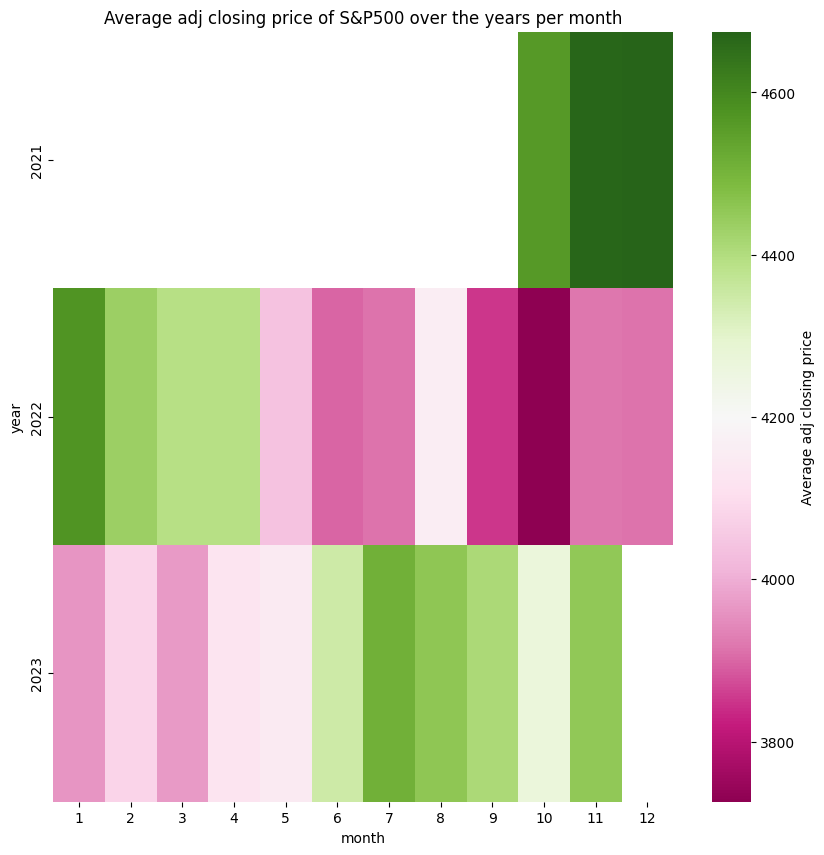

In [41]:
year_month_adj_close_df = sp500_df.pivot_table(index='year', columns='month', values='adjclose', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(year_month_adj_close_df.loc[year_month_adj_close_df.index > 1990], cmap="PiYG", cbar_kws={'label': 'Average adj closing price'})
plt.title("Average adj closing price of S&P500 over the years per month")
plt.show()

Here are all the various stock index attributes. There are no major differences between the various prices recorded.

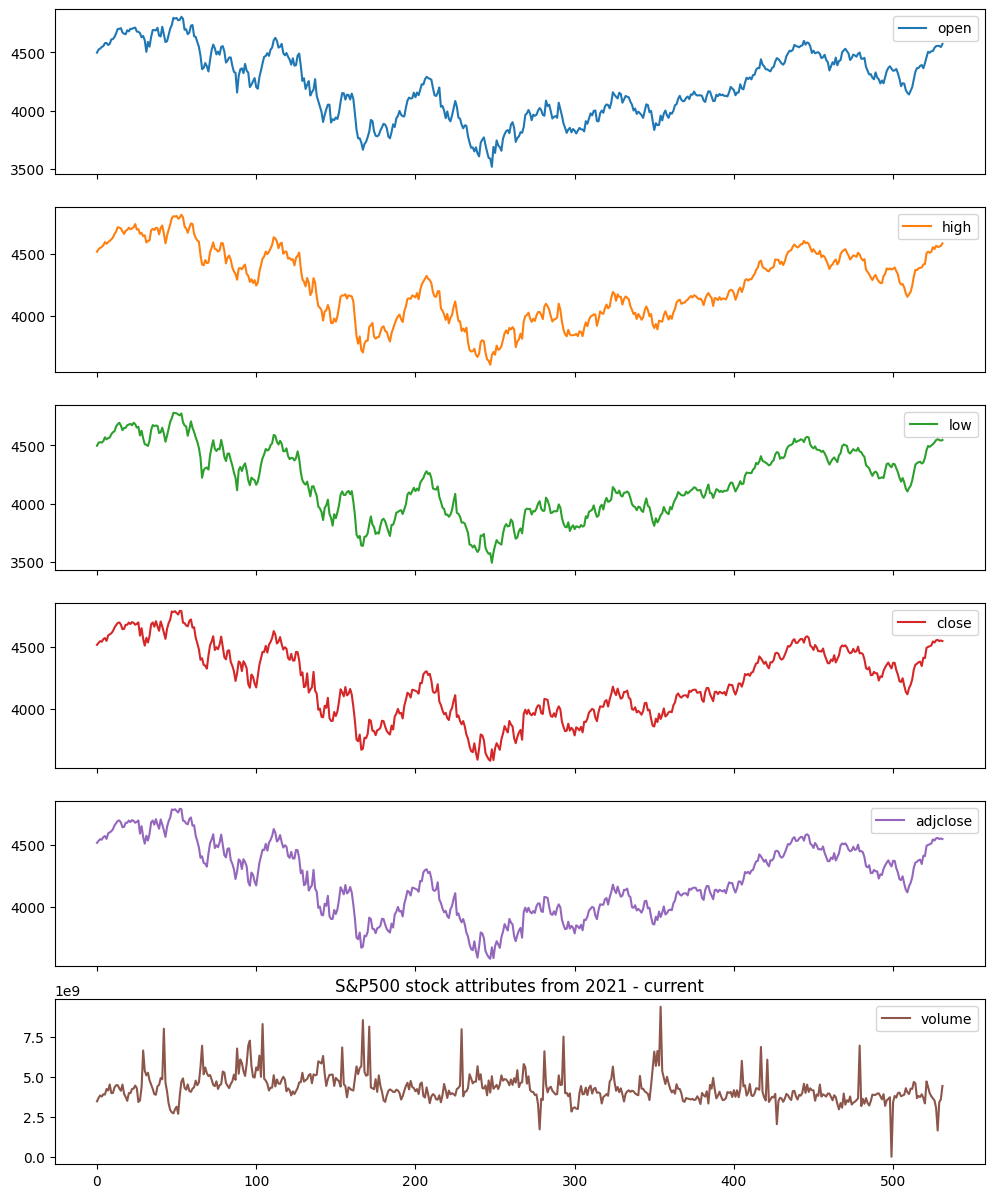

In [42]:
sp500_df[["open", "high", "low", "close", "adjclose", "volume"]].plot(subplots=True, figsize=(12,15))
plt.title('S&P500 stock attributes from 2021 - current')
plt.show()

Here's a plot which shows the differences between the opening and closing prices each day. This plot shows that there are bigger differences between the two prices than we can see from looking at separate plots.

Interestingly, from about 1960 to 1980 there were only positive values meaning that the stock closing values were always larger than or equal to the opening values. This indicates that the stock only increased in value for those 20 years!

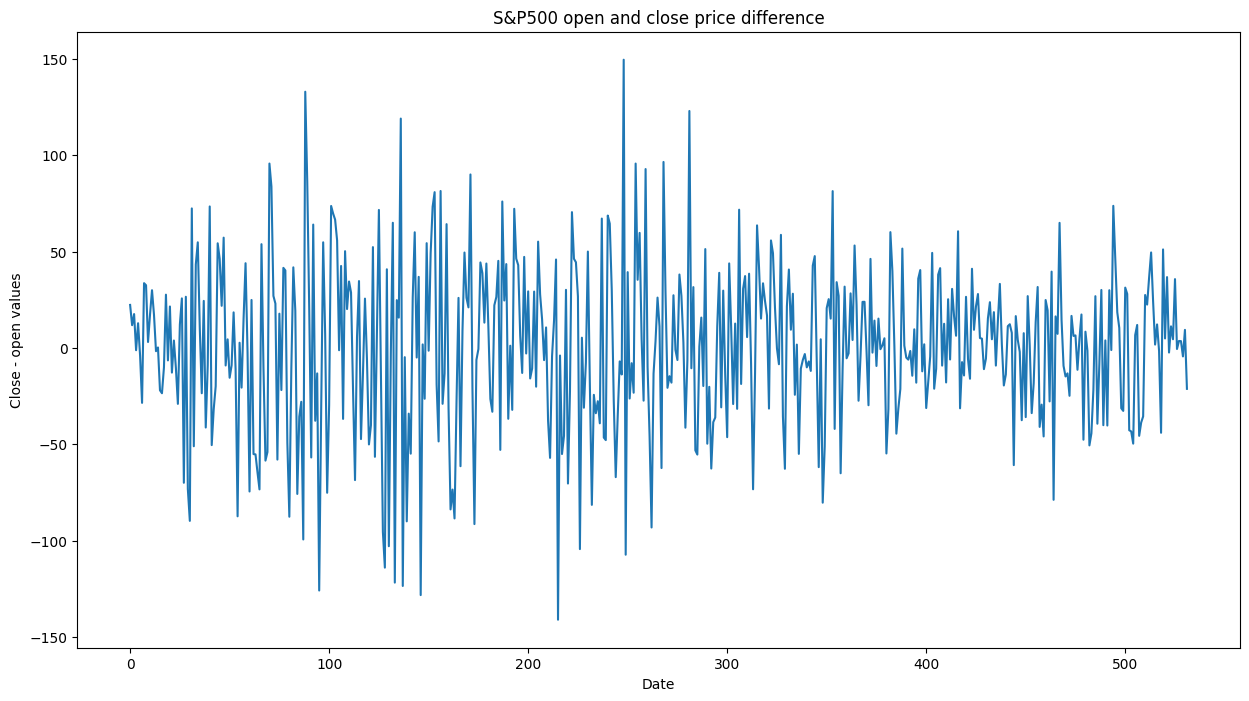

In [43]:
plt.figure(figsize=(15,8))
plt.plot(sp500_df['openclose'])
plt.title('S&P500 open and close price difference')
plt.xlabel("Date")
plt.ylabel("Close - open values")
plt.show()

We can also look at a few of the investment features. For the sake of keeping this project length to a minimum, we won't plot MCAD or RSI as this would take ample exaplanation in order to understand the plots.

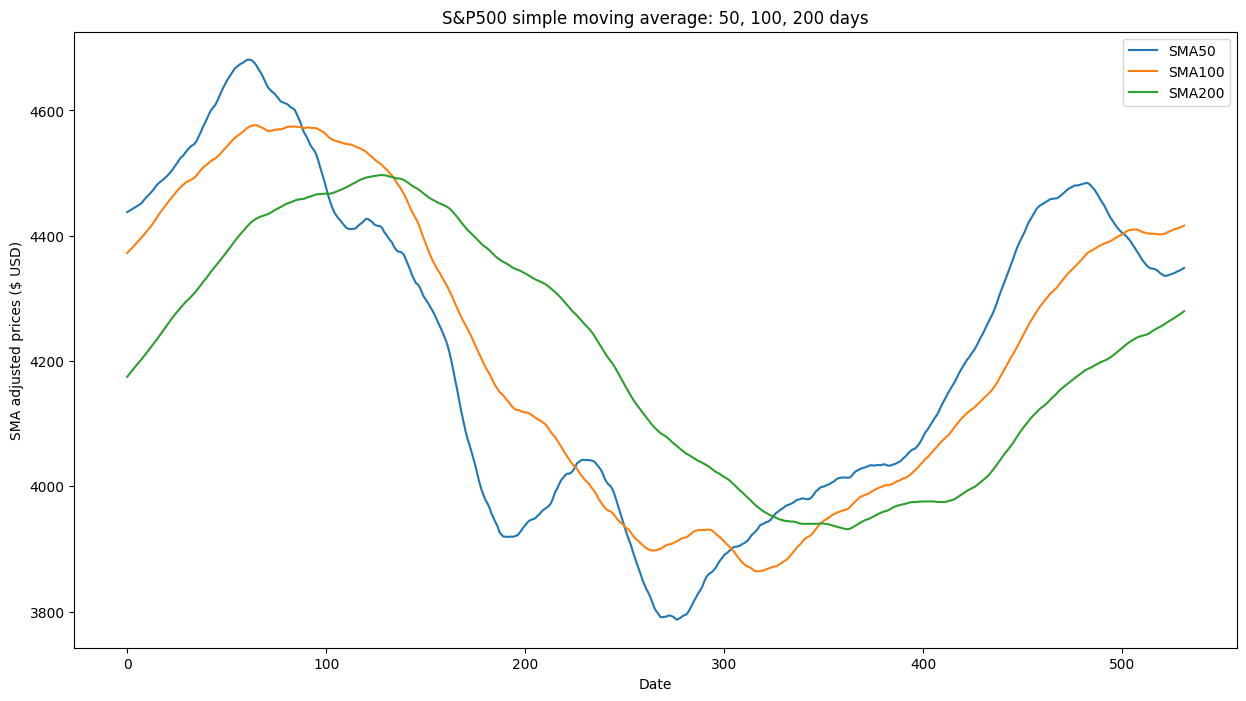

In [44]:
plt.figure(figsize=(15,8))
plt.plot(sp500_df[['sma50', 'sma100', 'sma200', ]])
plt.title('S&P500 simple moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("SMA adjusted prices ($ USD)")
plt.legend(["SMA50", "SMA100", "SMA200"])
plt.show()

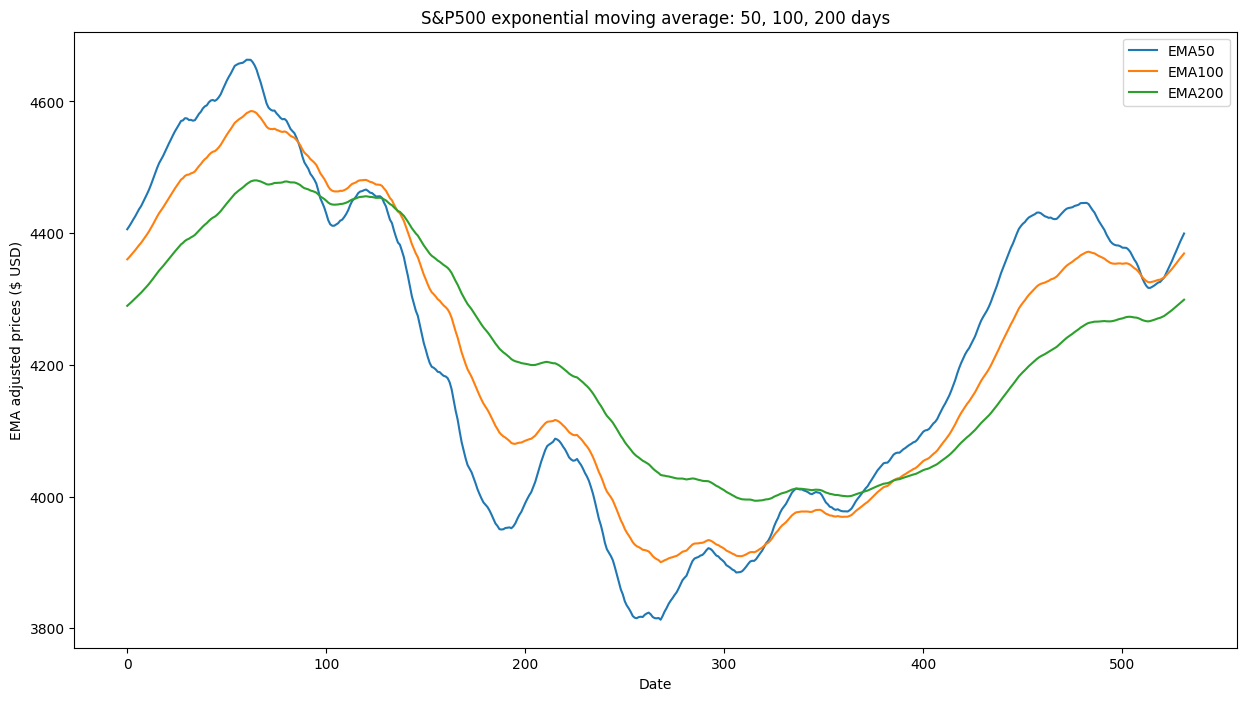

In [45]:
plt.figure(figsize=(15,8))
plt.plot(sp500_df[['ema50', 'ema100', 'ema200', ]])
plt.title('S&P500 exponential moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("EMA adjusted prices ($ USD)")
plt.legend(["EMA50", "EMA100", "EMA200"])
plt.show()

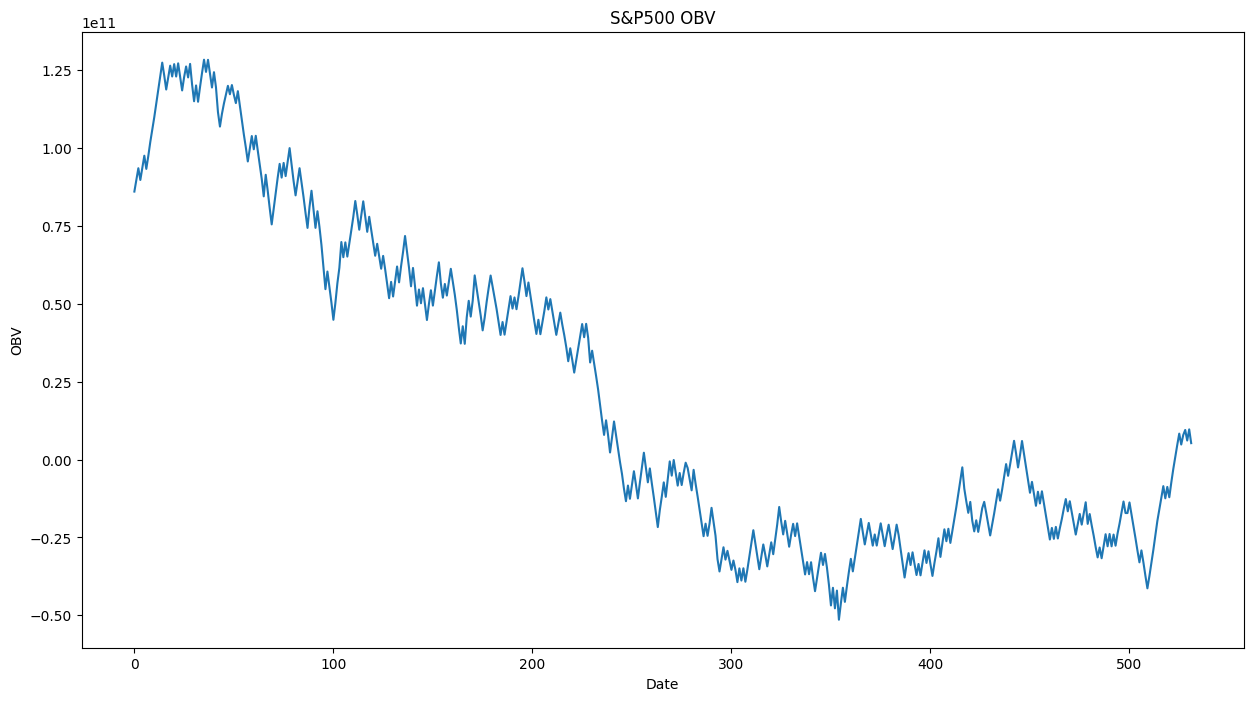

In [46]:
plt.figure(figsize=(15,8))
plt.plot(sp500_df["obv"])
plt.title('S&P500 OBV')
plt.xlabel("Date")
plt.ylabel("OBV")
plt.show()

### The Dow Jones

We'll start off by looking at some numbers like mean, min and max, and count in order to better understand the data.

In [47]:
dowjones_df.describe()

open          high           low         close      adjclose  \
count    532.000000    532.000000    532.000000    532.000000    532.000000   
mean   33591.554710  33794.679849  33371.321741  33591.209120  33591.209120   
std     1561.145521   1524.109307   1599.383506   1562.808476   1562.808476   
min    28755.830078  29355.779297  28660.939453  28725.509766  28725.509766   
25%    32869.755859  33068.988281  32639.699219  32841.981445  32841.981445   
50%    33754.986328  33901.466797  33529.675781  33737.089844  33737.089844   
75%    34628.913086  34823.731445  34435.091797  34596.886719  34596.886719   
max    36722.601562  36952.648438  36636.000000  36799.648438  36799.648438   

             volume   dayofweek       month         year     quarter  ...  \
count  5.320000e+02  532.000000  532.000000   532.000000  532.000000  ...   
mean   3.428730e+08    2.031955    6.789474  2022.332707    2.595865  ...   
std    8.264643e+07    1.394404    3.475072     0.646752    1.140019  ...   
min    1.170400e+08    0.000000    1.000000  2021.000000    1.000000  ...   
25%    2.915575e+08    1.000000    4.000000  2022.000000    2.000000  ...   
50%    3.276250e+08    2.000000    7.000000  2022.000000    3.000000  ...   
75%    3.760150e+08    3.000000   10.000000  2023.000000    4.000000  ...   
max    7.563100e+08    4.000000   12.000000  2023.000000    4.000000  ...   

              ema50        ema100        ema200  MACD_12_26_9  MACDh_12_26_9  \
count    532.000000    532.000000    532.000000    532.000000     532.000000   
mean   33610.557143  33629.393325  33653.108693     -5.656397       3.420143   
std     1243.191736   1070.272297    810.685888    327.642710     118.978371   
min    30711.898441  31437.607213  32307.253274   -832.377570    -292.439359   
25%    32906.290160  32820.273172  33008.798280   -241.601739     -77.776354   
50%    33561.793049  33510.426509  33539.056973     11.225252       2.158696   
75%    34549.247773  34584.150642  34438.404794    216.524805      89.381645   
max    35835.446833  35501.138066  35047.411407    759.483407     361.432943   

       MACDs_12_26_9      RSI_14  RSI_14_A_60  RSI_14_B_40           obv  
count     532.000000  532.000000   532.000000   532.000000  5.320000e+02  
mean       -9.076539   50.693433     0.223684     0.203008  2.493286e+09  
std       297.472237   11.286868     0.417105     0.402617  1.954000e+09  
min      -698.782767   24.303992     0.000000     0.000000 -1.719000e+09  
25%      -225.440902   42.254751     0.000000     0.000000  1.094802e+09  
50%         3.275368   51.207294     0.000000     0.000000  2.166695e+09  
75%       170.793703   59.141703     0.000000     0.000000  3.514808e+09  
max       720.175188   75.184543     1.000000     1.000000  8.042640e+09  

[8 rows x 27 columns]

Here are the top 3 closing prices.

In [48]:
dowjones_df.sort_values('adjclose' , ascending=False)[['adjclose']][:3]

adjclose
Date                    
2022-01-04  36799.648438
2022-01-03  36585.058594
2021-12-29  36488.628906

In [49]:
dowjones_df = dowjones_df.reset_index()

Now we'll look at the stock indexes performance over time.

In [50]:
# plt.figure(figsize=(15,8))
# fig = sns.lineplot(x="Date", y="adjclose", data=dowjones_df.)
# plt.xlabel("Date")
# plt.ylabel("Adjusted Close Price ($ USD)")
# plt.title("Dow Jones closing price over time")
# plt.show(fig)

Here's another way that we can view the same information. We can look at the average adjusted close price for each month over the years from 1993 onwards to see when the stock index was at it's highest price. As expected the price has become higher as time passes.

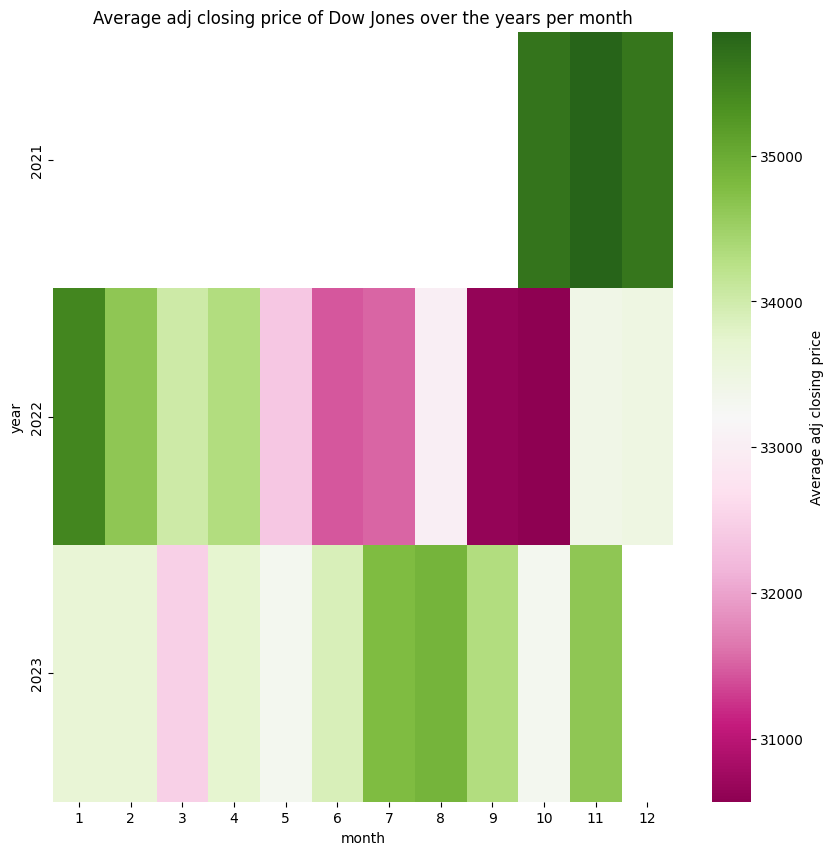

In [51]:
dow_year_month_adj_close_df = dowjones_df.pivot_table(index='year', columns='month', values='adjclose', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(dow_year_month_adj_close_df.loc[dow_year_month_adj_close_df.index > 1992], cmap="PiYG", cbar_kws={'label': 'Average adj closing price'})
plt.title("Average adj closing price of Dow Jones over the years per month")
plt.show()

Here are all the attributes of the stock index. There are no major differences between the various prices recorded.

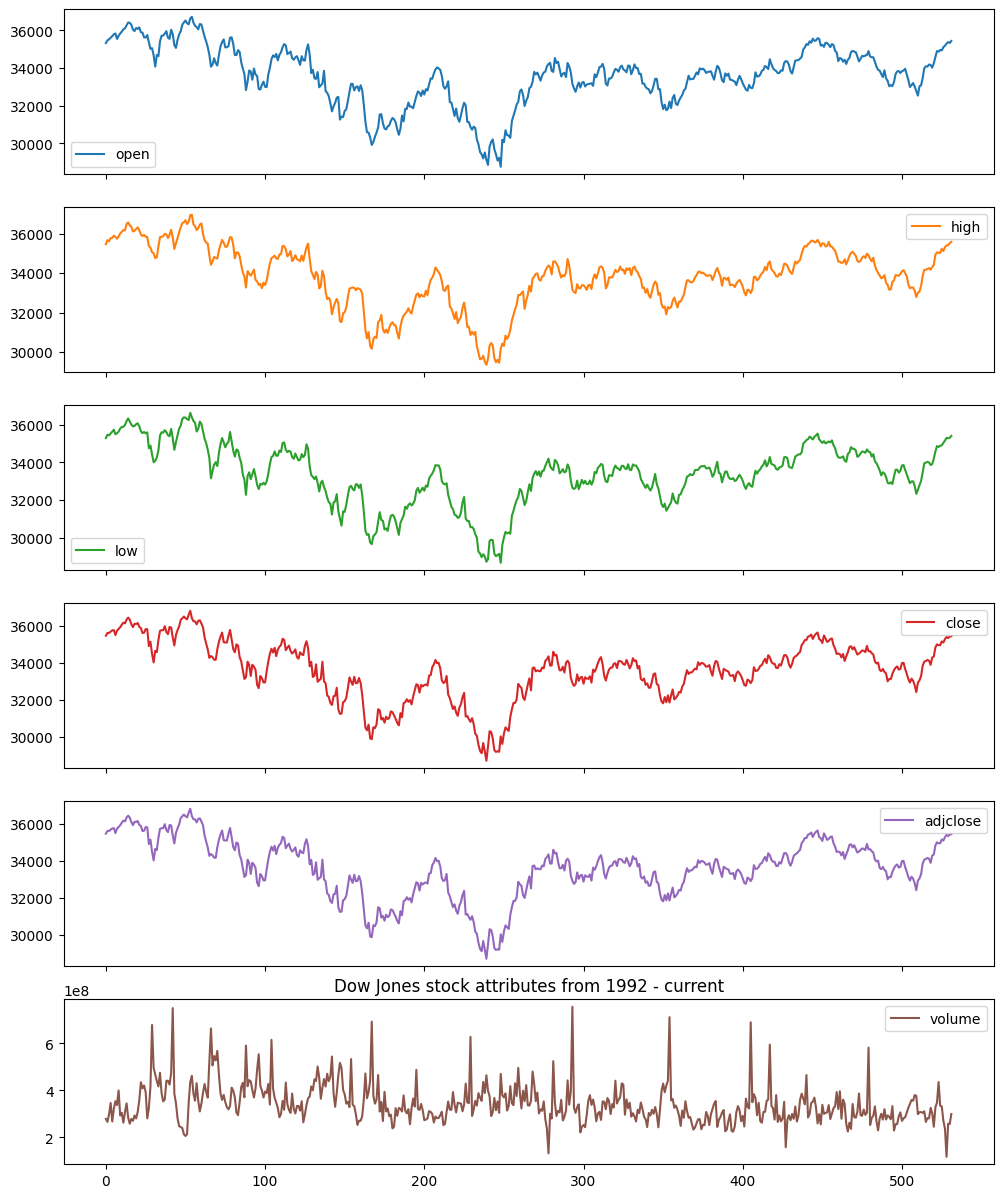

In [52]:
dowjones_df[["open", "high", "low", "close", "adjclose", "volume"]].plot(subplots=True, figsize=(12,15))
plt.title('Dow Jones stock attributes from 1992 - current')
plt.show()

Here's a plot which showcases the differences between the opening and closing prices each day. This plot shows that there are bigger differences between the two than we can see from looking at separate plots.

There is much more daily movement in the Dow Jones stock index compared to the S&P500!

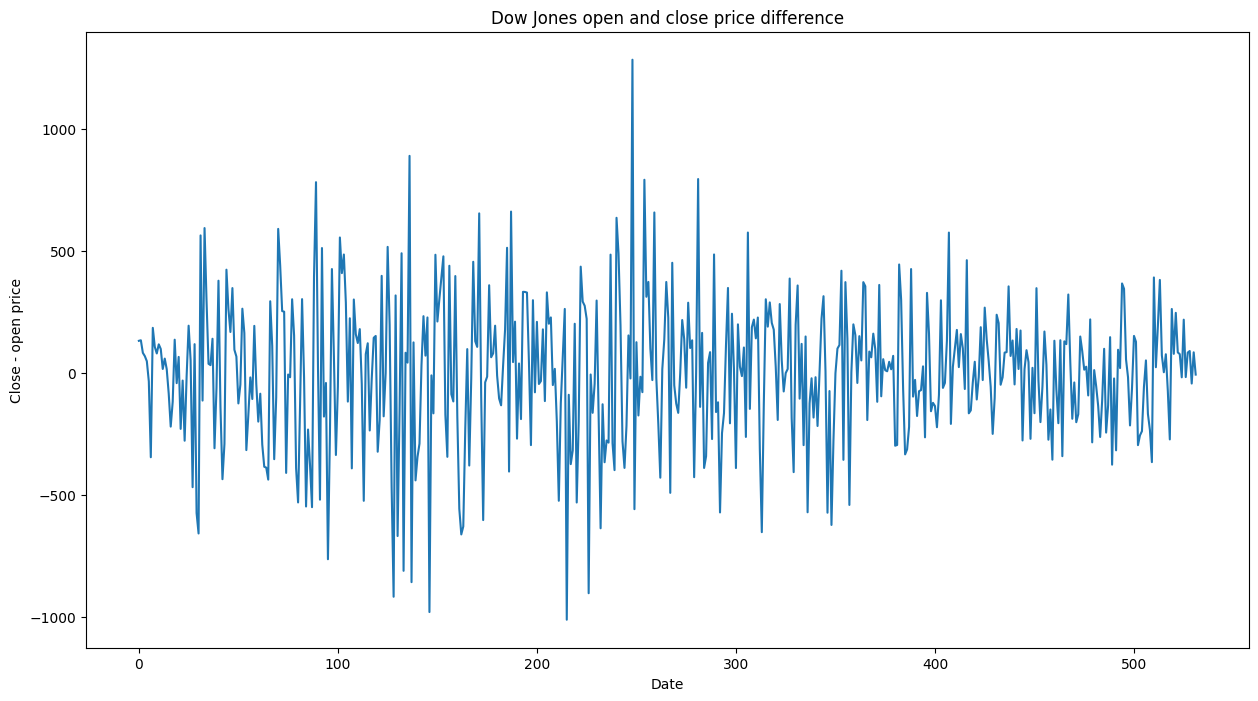

In [53]:
plt.figure(figsize=(15,8))
plt.plot(dowjones_df['openclose'])
plt.title('Dow Jones open and close price difference')
plt.xlabel("Date")
plt.ylabel("Close - open price")
plt.show()

We can also look at a few of the investment features. For the sake of keeping this project length to a minimum, we won't plot MCAD or RSI as this would take ample exaplanation in order to understand the plots.

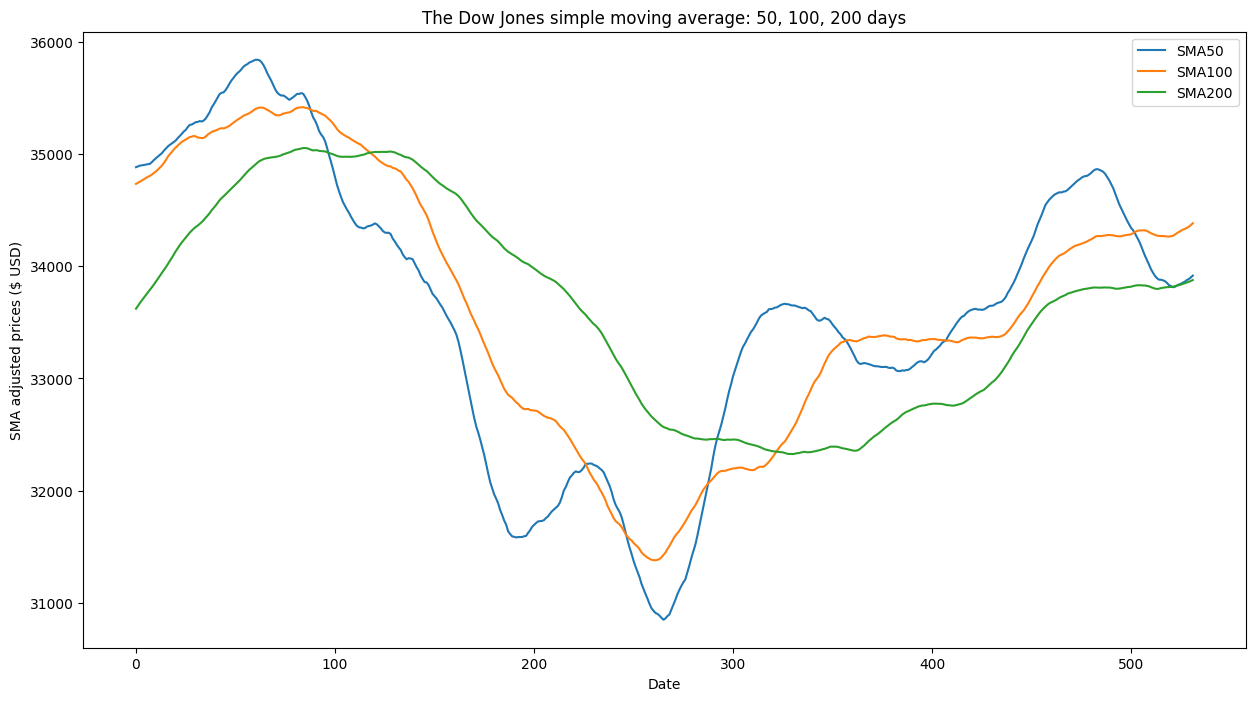

In [54]:
plt.figure(figsize=(15,8))
plt.plot(dowjones_df[['sma50', 'sma100', 'sma200']])
plt.title('The Dow Jones simple moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("SMA adjusted prices ($ USD)")
plt.legend(["SMA50", "SMA100", "SMA200"])
plt.show()

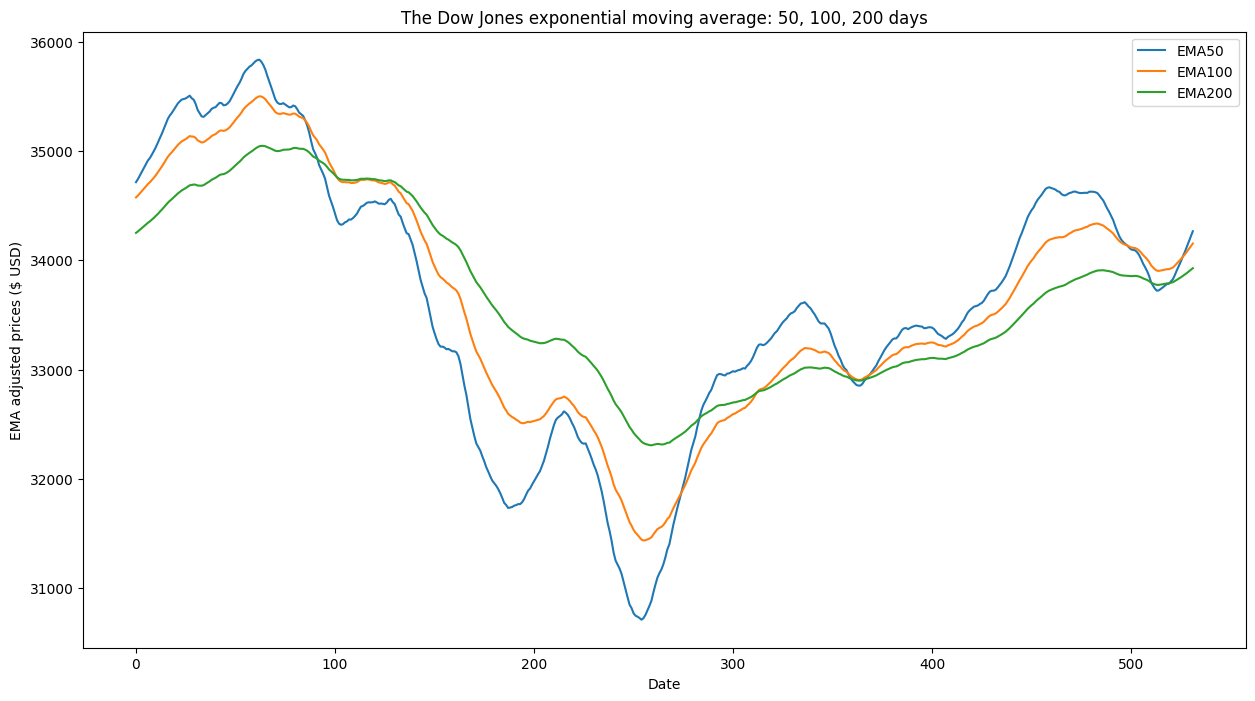

In [55]:
plt.figure(figsize=(15,8))
plt.plot(dowjones_df[['ema50', 'ema100', 'ema200']])
plt.title('The Dow Jones exponential moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("EMA adjusted prices ($ USD)")
plt.legend(["EMA50", "EMA100", "EMA200"])
plt.show()

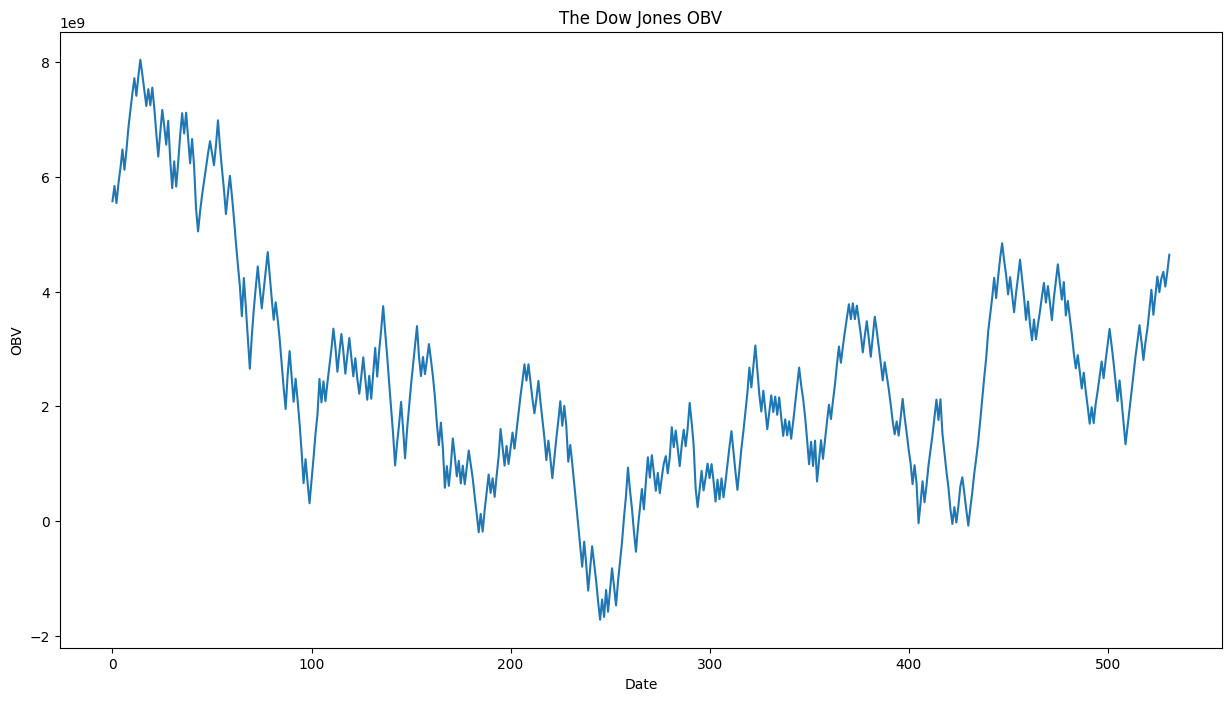

In [56]:
plt.figure(figsize=(15,8))
plt.plot(dowjones_df["obv"])
plt.title('The Dow Jones OBV')
plt.xlabel("Date")
plt.ylabel("OBV")
plt.show()

### NASDAQ

We'll start off by looking at some numbers like mean, min and max, and count in order to better understand the data.

In [57]:
nasdaq_df.describe()

open          high           low         close      adjclose  \
count    532.000000    532.000000    532.000000    532.000000    532.000000   
mean   12809.028983  12920.593662  12690.659802  12809.096382  12809.096382   
std     1492.353091   1484.290073   1488.271042   1486.350969   1486.350969   
min    10131.820312  10393.219727  10088.830078  10213.290039  10213.290039   
25%    11537.842773  11643.097412  11411.199951  11533.847168  11533.847168   
50%    12727.555176  12860.420410  12602.834961  12720.680176  12720.680176   
75%    13859.400146  13925.649902  13720.410156  13801.980225  13801.980225   
max    16120.919922  16212.230469  16017.230469  16057.440430  16057.440430   

             volume   dayofweek       month         year     quarter  ...  \
count  5.320000e+02  532.000000  532.000000   532.000000  532.000000  ...   
mean   4.935605e+09    2.031955    6.789474  2022.332707    2.595865  ...   
std    7.571738e+08    1.394404    3.475072     0.646752    1.140019  ...   
min    2.184080e+09    0.000000    1.000000  2021.000000    1.000000  ...   
25%    4.445492e+09    1.000000    4.000000  2022.000000    2.000000  ...   
50%    4.833110e+09    2.000000    7.000000  2022.000000    3.000000  ...   
75%    5.280628e+09    3.000000   10.000000  2023.000000    4.000000  ...   
max    9.468130e+09    4.000000   12.000000  2023.000000    4.000000  ...   

              ema50        ema100        ema200  MACD_12_26_9  MACDh_12_26_9  \
count    532.000000    532.000000    532.000000    532.000000     532.000000   
mean   12860.475638  12913.245060  13038.971968    -14.804656       2.380254   
std     1395.411385   1295.711987   1105.839351    204.404915      65.759518   
min    10825.585934  11103.181558  11651.056725   -531.992200    -159.520824   
25%    11691.672223  11686.641903  12019.381393   -159.570371     -45.570883   
50%    12660.627957  12728.604837  12905.051925      3.723255       2.120612   
75%    13725.729047  14002.760052  14259.977488    142.894707      51.122138   
max    15488.688761  15253.307207  14933.536796    371.797385     168.412364   

       MACDs_12_26_9      RSI_14  RSI_14_A_60  RSI_14_B_40           obv  
count     532.000000  532.000000   532.000000   532.000000  5.320000e+02  
mean      -17.184910   51.197852     0.242481     0.186090  8.322469e+10  
std       189.634937   11.541235     0.428987     0.389546  3.639345e+10  
min      -471.901662   23.011186     0.000000     0.000000  1.222731e+10  
25%      -143.064313   41.923603     0.000000     0.000000  5.434259e+10  
50%         0.346440   50.692090     0.000000     0.000000  7.736778e+10  
75%       127.770167   59.570127     0.000000     0.000000  1.070257e+11  
max       329.349365   78.231301     1.000000     1.000000  1.672230e+11  

[8 rows x 27 columns]

Here are the top 3 closing prices.

In [58]:
nasdaq_df.sort_values('adjclose' , ascending=False)[['adjclose']][:3]

adjclose
Date                    
2021-11-19  16057.440430
2021-11-18  15993.709961
2021-11-08  15982.360352

Now we'll look at the stock indexes performance over time.

In [59]:
# plt.figure(figsize=(15,8))
# fig = sns.lineplot(x="Date", y="adjclose", data=nasdaq_df)
# plt.xlabel("Date")
# plt.ylabel("Adjusted Close Price ($ USD)")
# plt.title("NASDAQ closing price over time")
# plt.show(fig)

In [60]:
nasdaq_df = nasdaq_df.reset_index()

Here's another way that we can view the same information. We can look at the average adjusted close price for each month over the years from 1991 onwards to see when the stock index was at it's highest price. As expected the price has become higher as time passes.

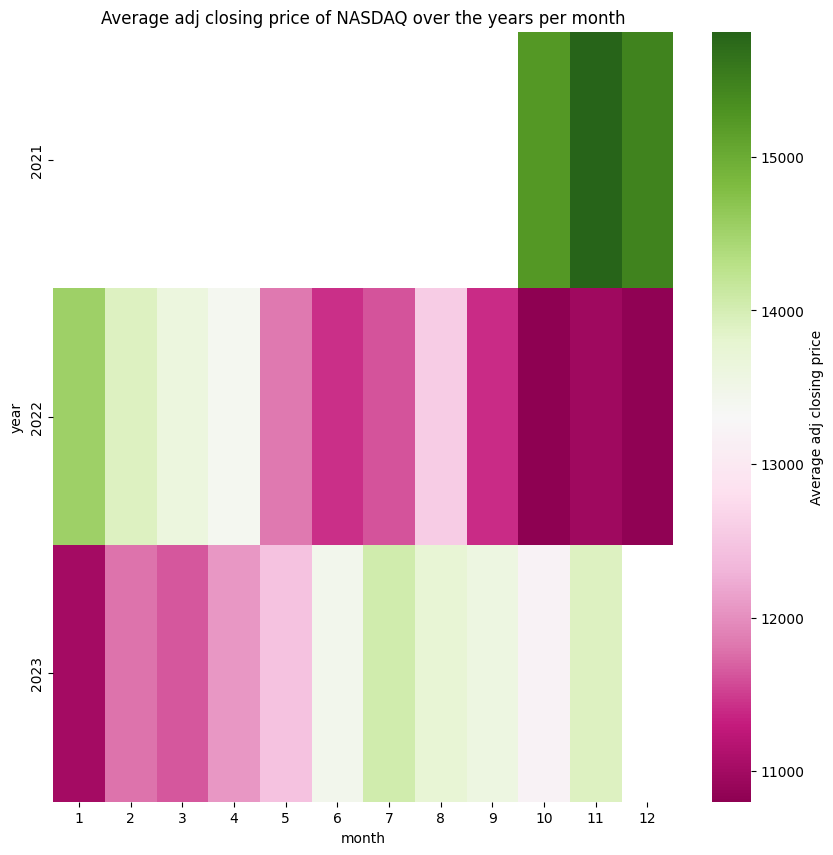

In [61]:
nasdaq_year_month_adj_close_df = nasdaq_df.pivot_table(index='year', columns='month', values='adjclose', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(nasdaq_year_month_adj_close_df.loc[nasdaq_year_month_adj_close_df.index > 1990], cmap="PiYG", cbar_kws={'label': 'Average adj closing price'})
plt.title("Average adj closing price of NASDAQ over the years per month")
plt.show()

Here are all the attributes of the stock index. There are no major differences between the various prices recorded.

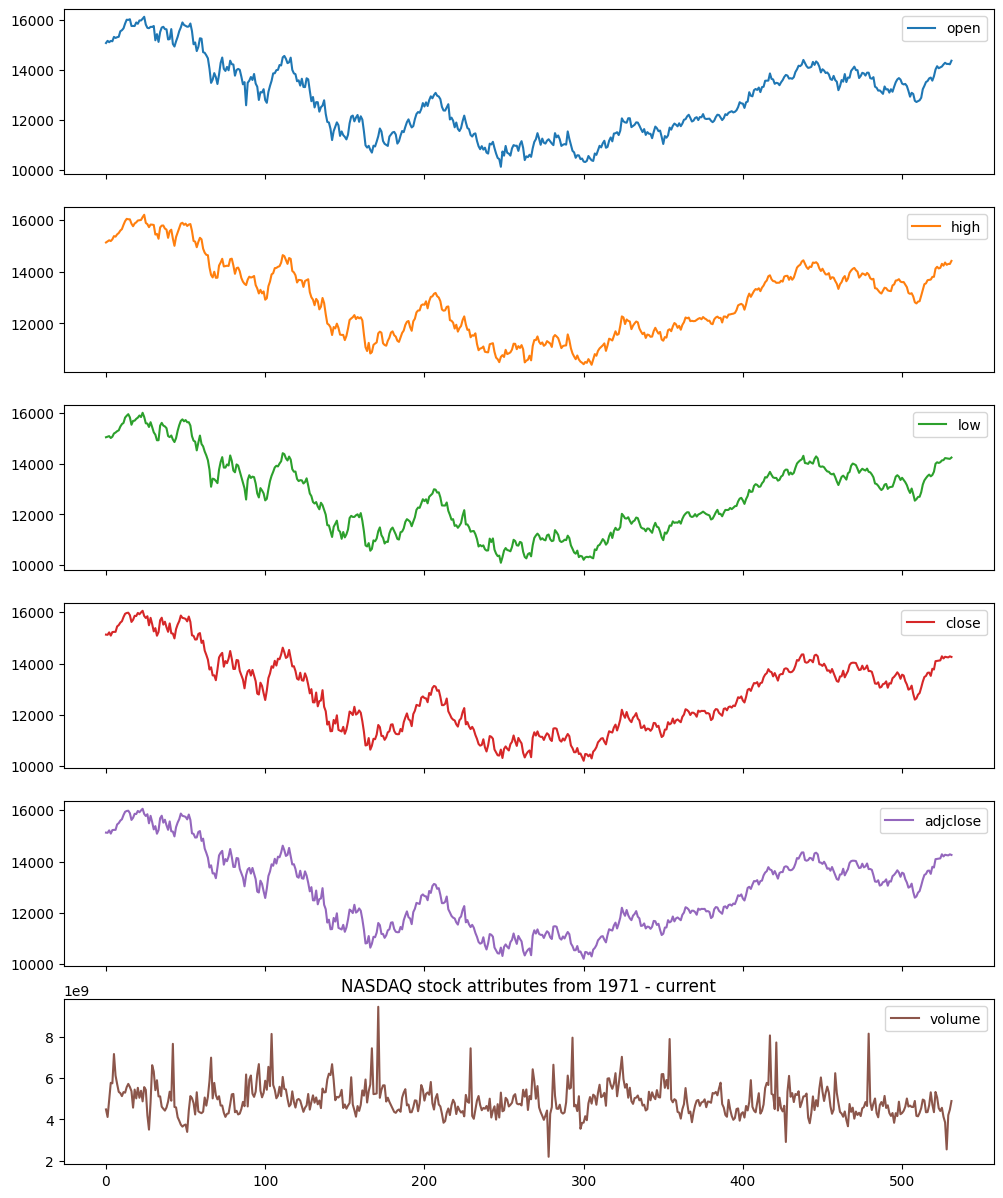

In [62]:
nasdaq_df[["open", "high", "low", "close", "adjclose", "volume"]].plot(subplots=True, figsize=(12,15))
plt.title('NASDAQ stock attributes from 1971 - current')
plt.show()

Here's a plot which showcases the differences between the opening and closing prices each day. This plot shows that there are bigger differences between the two than we can see from looking at separate plots.

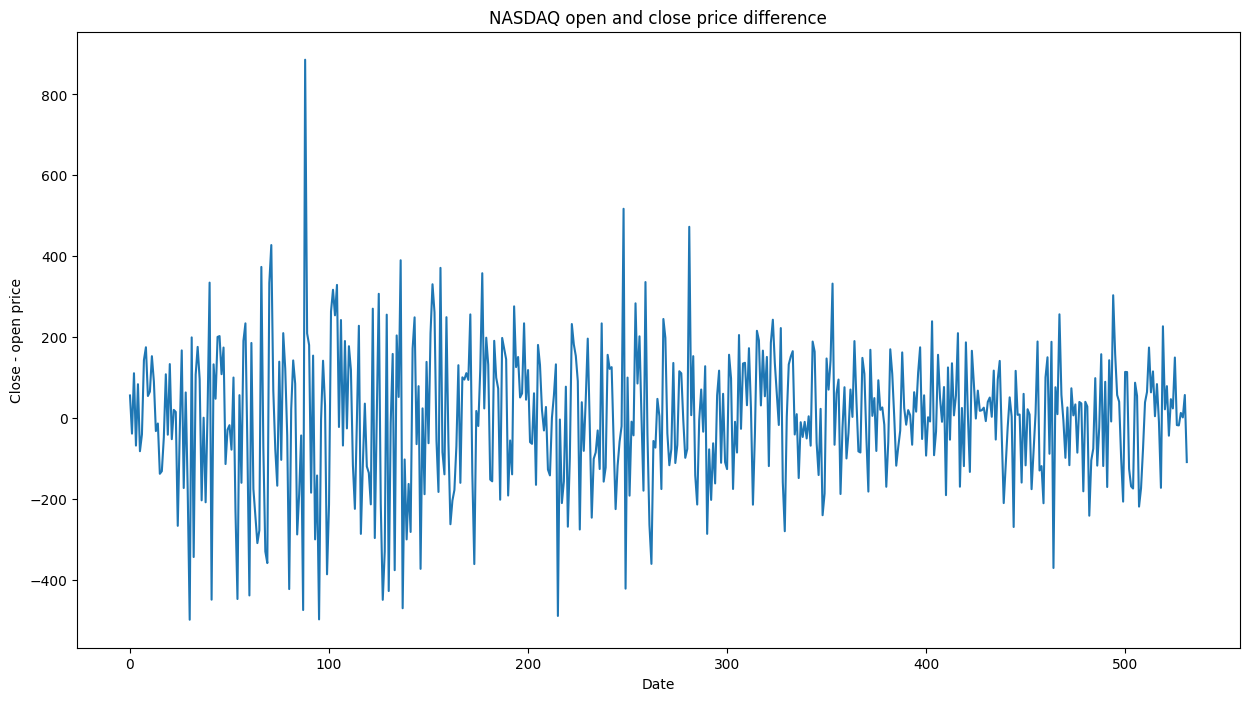

In [63]:
plt.figure(figsize=(15,8))
plt.plot(nasdaq_df['openclose'])
plt.title('NASDAQ open and close price difference')
plt.xlabel("Date")
plt.ylabel("Close - open price")
plt.show()

We can also look at a few of the investment features. For the sake of keeping this project length to a minimum, we won't plot MCAD or RSI as this would take ample exaplanation in order to understand the plots.

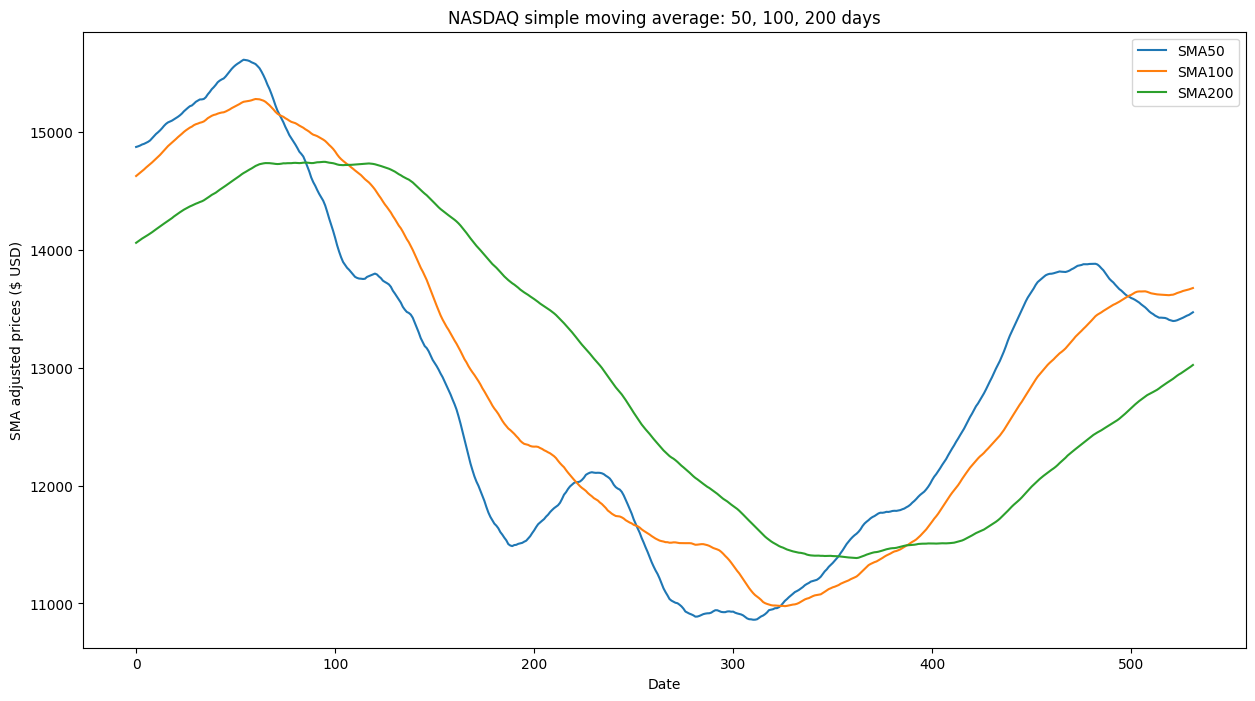

In [64]:
plt.figure(figsize=(15,8))
plt.plot(nasdaq_df[['sma50', 'sma100', 'sma200', ]])
plt.title('NASDAQ simple moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("SMA adjusted prices ($ USD)")
plt.legend(["SMA50", "SMA100", "SMA200"])
plt.show()

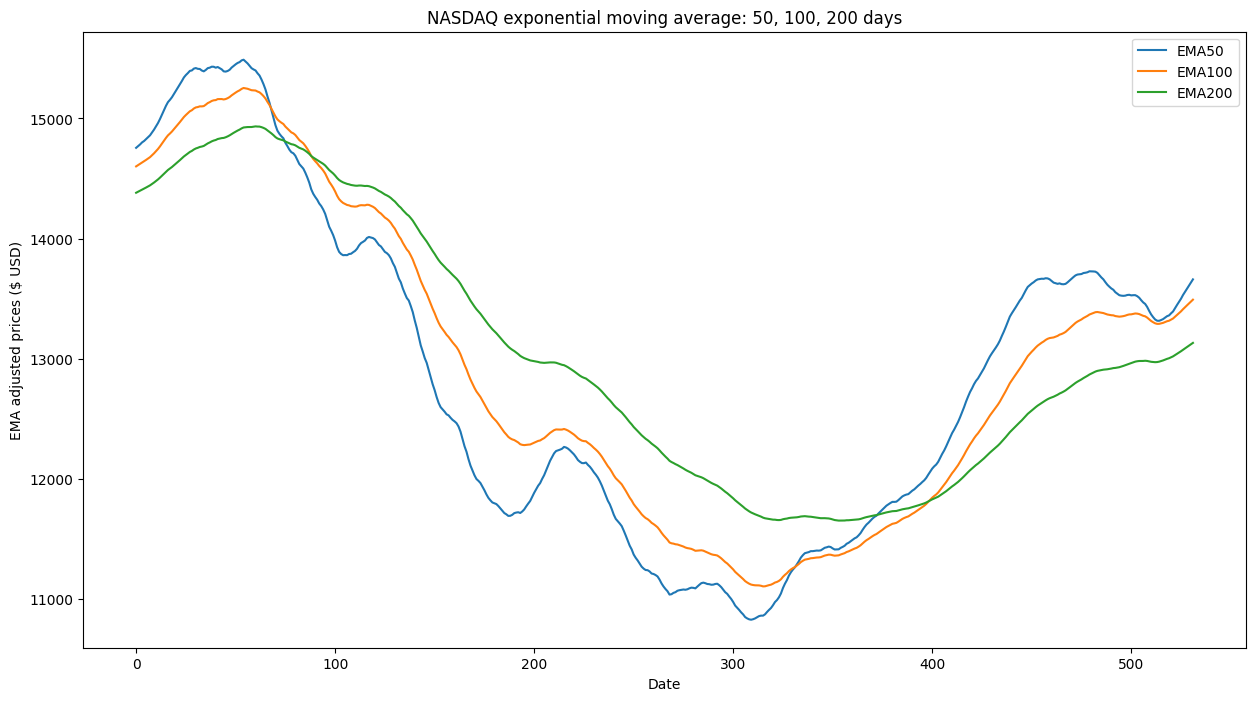

In [65]:
plt.figure(figsize=(15,8))
plt.plot(nasdaq_df[['ema50', 'ema100', 'ema200', ]])
plt.title('NASDAQ exponential moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("EMA adjusted prices ($ USD)")
plt.legend(["EMA50", "EMA100", "EMA200"])
plt.show()

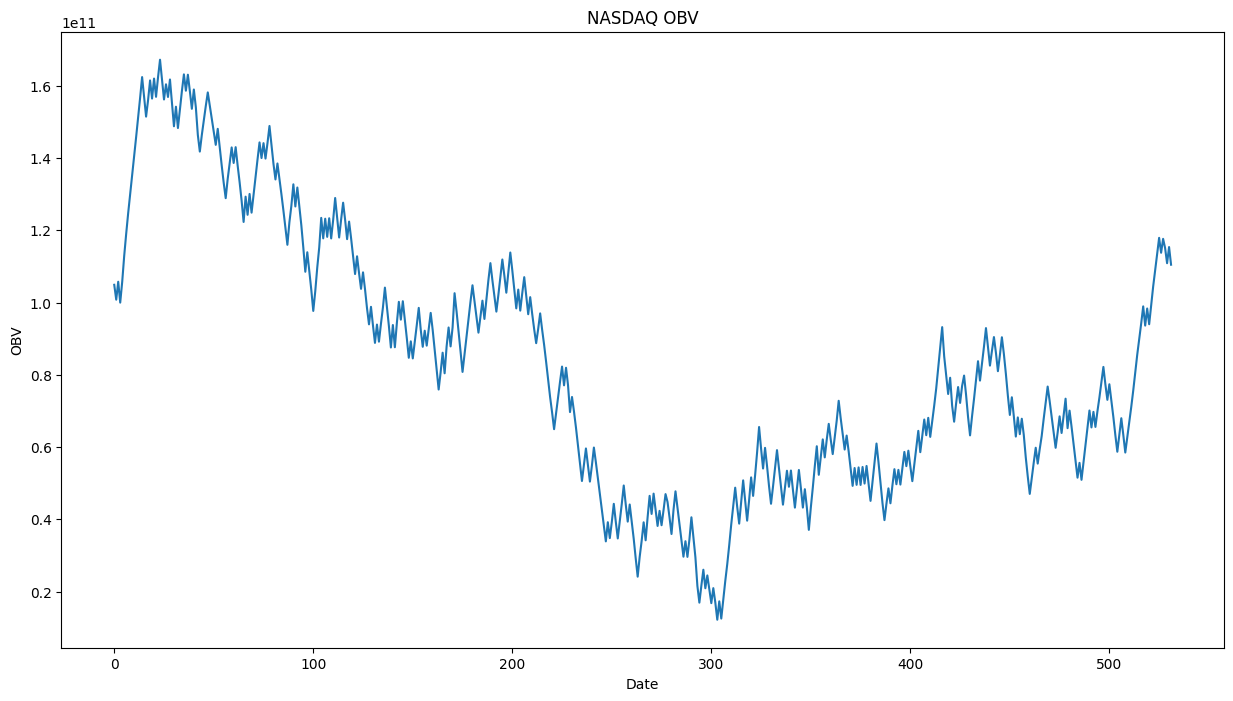

In [66]:
plt.figure(figsize=(15,8))
plt.plot(nasdaq_df["obv"])
plt.title('NASDAQ OBV')
plt.xlabel("Date")
plt.ylabel("OBV")
plt.show()

### Nikkei 225

We'll start off by looking at some numbers like mean, min and max, and count in order to better understand the data.

Here are the top 3 closing prices.

In [67]:
# nikkei_df.sort_values('adjclose' , ascending=False)[['adjclose']][:3]

Now we'll look at the stock indexes performance over time.

In [68]:
# plt.figure(figsize=(15,8))
# fig = sns.lineplot(x="Date", y="adjclose", data=nikkei_df)
# plt.xlabel("Date")
# plt.ylabel("Adjusted Close Price ($ USD)")
# plt.title("Nikkei 225 closing price over time")
# plt.show(fig)

Here's another way that we can view the same information. We can look at the average adjusted close price for each month over the years from 1991 onwards to see when the stock index was at it's highest price.

Interestingly, this is the only stock index that performed as well in the past as it has in current times.

In [69]:
# nikkei_year_month_adj_close_df = nikkei_df.pivot_table(index='year', columns='month', values='adjclose', aggfunc='mean')

# fig, ax = plt.subplots(figsize=(10,10))
# ax = sns.heatmap(nikkei_year_month_adj_close_df.loc[nikkei_year_month_adj_close_df.index > 1990], cmap="PiYG", cbar_kws={'label': 'Average adj closing price'})
# plt.title("Average adj closing price of Nikkei 225 over the years per month")
# plt.show()

Here are all the attributes of the stock index. There are no major differences between the various prices recorded.

In [70]:
# nikkei_df[["open", "high", "low", "close", "adjclose", "volume"]].plot(subplots=True, figsize=(12,15))
# plt.title('Nikkei 225 stock attributes from 1965 - current')
# plt.show()

Here's a plot which showcases the differences between the opening and closing prices each day. This plot shows that there are bigger differences between the two than we can see from looking at separate plots.

In [71]:
# plt.figure(figsize=(15,8))
# plt.plot(nikkei_df['openclose'])
# plt.title('Nikkei 225 open and close price difference')
# plt.xlabel("Date")
# plt.ylabel("Close - open price")
# plt.show();

We can also look at a few of the investment features. For the sake of keeping this project length to a minimum, we won't plot MCAD or RSI as this would take ample exaplanation in order to understand the plots.

In [72]:
# plt.figure(figsize=(15,8))
# plt.plot(nikkei_df[['sma50', 'sma100', 'sma200', ]])
# plt.title('Nikkei 225 simple moving average: 50, 100, 200 days')
# plt.xlabel("Date")
# plt.ylabel("SMA adjusted prices ($ USD)")
# plt.legend(["SMA50", "SMA100", "SMA200"])
# plt.show()

In [73]:
# plt.figure(figsize=(15,8))
# plt.plot(nikkei_df[['ema50', 'ema100', 'ema200', ]])
# plt.title('Nikkei exponential moving average: 50, 100, 200 days')
# plt.xlabel("Date")
# plt.ylabel("EMA adjusted prices ($ USD)")
# plt.legend(["EMA50", "EMA100", "EMA200"])
# plt.show()

In [74]:
# plt.figure(figsize=(15,8))
# plt.plot(nikkei_df["obv"])
# plt.title('Nikkei 225 OBV')
# plt.xlabel("Date")
# plt.ylabel("OBV")
# plt.show()

### Looking at all of the stock indexes

We'll now look at some visualisations of all of the data combined. To do so we'll create a merged data frame where each stock index can be identified by it's shorthand name.

In [75]:
sp500_added_ticker_df = sp500_df.copy()
sp500_added_ticker_df["index"] = "sp500"

dowjones_added_ticker_df = dowjones_df.copy()
dowjones_added_ticker_df["index"] = "dowjones"

nasdaq_added_ticker_df = nasdaq_df.copy()
nasdaq_added_ticker_df["index"] = "nasdaq"

# nikkei_added_ticker_df = nikkei_df.copy()
# nikkei_added_ticker_df["index"] = "nikkei225"

stock_index_list = [sp500_added_ticker_df, dowjones_added_ticker_df, nasdaq_added_ticker_df]
merged_df = pd.concat(stock_index_list)
merged_df

Date          open          high           low         close  \
0   2021-10-19   4497.339844   4520.399902   4496.410156   4519.629883   
1   2021-10-20   4524.419922   4540.870117   4524.399902   4536.189941   
2   2021-10-21   4532.240234   4551.439941   4526.890137   4549.779785   
3   2021-10-22   4546.120117   4559.669922   4524.000000   4544.899902   
4   2021-10-25   4553.689941   4572.620117   4537.359863   4566.479980   
..         ...           ...           ...           ...           ...   
527 2023-11-22  14283.820312  14359.610352  14226.629883  14265.860352   
528 2023-11-24  14238.040039  14270.280273  14214.129883  14250.849609   
529 2023-11-27  14239.309570  14305.709961  14205.240234  14241.019531   
530 2023-11-28  14224.629883  14303.660156  14195.719727  14281.759766   
531 2023-11-29  14367.110352  14423.219727  14247.889648  14258.490234   

         adjclose      volume  dayofweek  month  year  ...        ema100  \
0     4519.629883  3459130000          1     10  2021  ...   4360.201672   
1     4536.189941  3670760000          2     10  2021  ...   4363.416372   
2     4549.779785  3822330000          3     10  2021  ...   4366.898906   
3     4544.899902  3758220000          4     10  2021  ...   4370.583863   
4     4566.479980  3899400000          0     10  2021  ...   4374.095023   
..            ...         ...        ...    ...   ...  ...           ...   
527  14265.860352  3855240000          2     11  2023  ...  13426.590293   
528  14250.849609  2541840000          4     11  2023  ...  13443.209510   
529  14241.019531  4205880000          0     11  2023  ...  13459.202391   
530  14281.759766  4474400000          1     11  2023  ...  13474.683925   
531  14258.490234  4890220000          2     11  2023  ...  13490.665632   

           ema200  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9     RSI_14  \
0     4289.583558      9.452598      19.562854     -10.110256  62.988319   
1     4292.226724     17.532844      22.114480      -4.581636  64.473028   
2     4295.025484     24.747806      23.463554       1.284253  65.689404   
3     4297.943598     29.729250      22.755998       6.973252  64.831038   
4     4300.768140     35.014783      22.433225      12.581558  66.891413   
..            ...           ...            ...            ...        ...   
527  13084.670010    260.140125      80.110894     180.029231  69.295050   
528  13096.431253    263.720888      66.953325     196.767563  68.599978   
529  13107.925846    262.736797      52.775387     209.961409  68.118107   
530  13119.208031    262.221567      41.808126     220.413441  69.087266   
531  13130.783451    256.973358      29.247933     227.725424  67.819170   

     RSI_14_A_60  RSI_14_B_40           obv   index  
0              1            0  8.603813e+10   sp500  
1              1            0  8.970889e+10   sp500  
2              1            0  9.353122e+10   sp500  
3              1            0  8.977300e+10   sp500  
4              1            0  9.367240e+10   sp500  
..           ...          ...           ...     ...  
527            1            0  1.176499e+11  nasdaq  
528            1            0  1.151080e+11  nasdaq  
529            1            0  1.109022e+11  nasdaq  
530            1            0  1.153766e+11  nasdaq  
531            1            0  1.104863e+11  nasdaq  

[1596 rows x 29 columns]

In [76]:
index_list = ['sp500', 'dowjones', 'nasdaq']

def plot_index(index_list):
    plt.figure(figsize=(20,8))
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close Price ($ USD)")
    plt.title("All stock indexes closing prices over time")
    for index in index_list:
        plt.plot(merged_df.loc[merged_df['index'] == index].year, merged_df.loc[merged_df['index'] == index]['adjclose'], label=index);
    plt.legend()
    plt.show()

In this visual we can see each stock index on the same plot.

Let's look at individual plots of each stock index but side by side so we can see how the closing prices compare over time, as well as the differences between closing and opening prices.

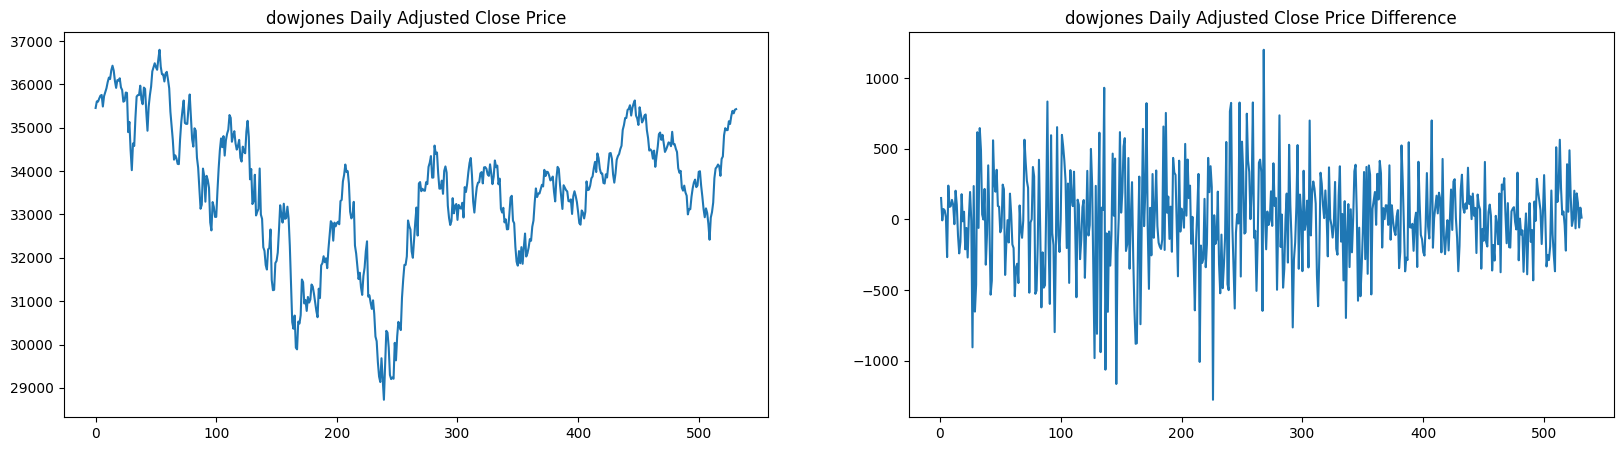

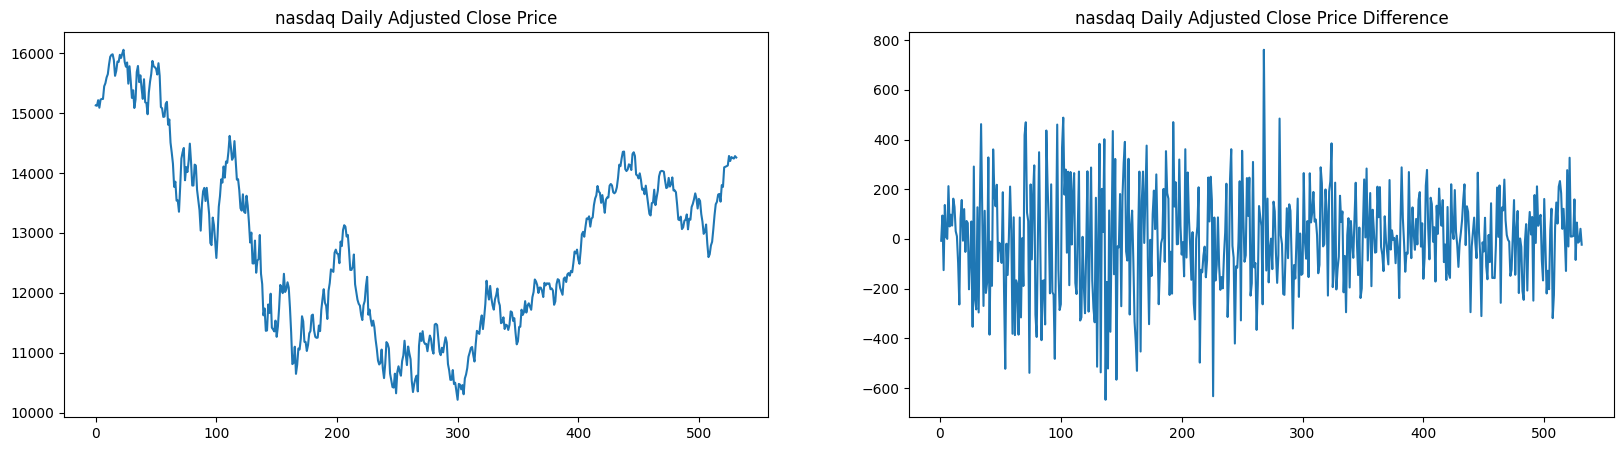

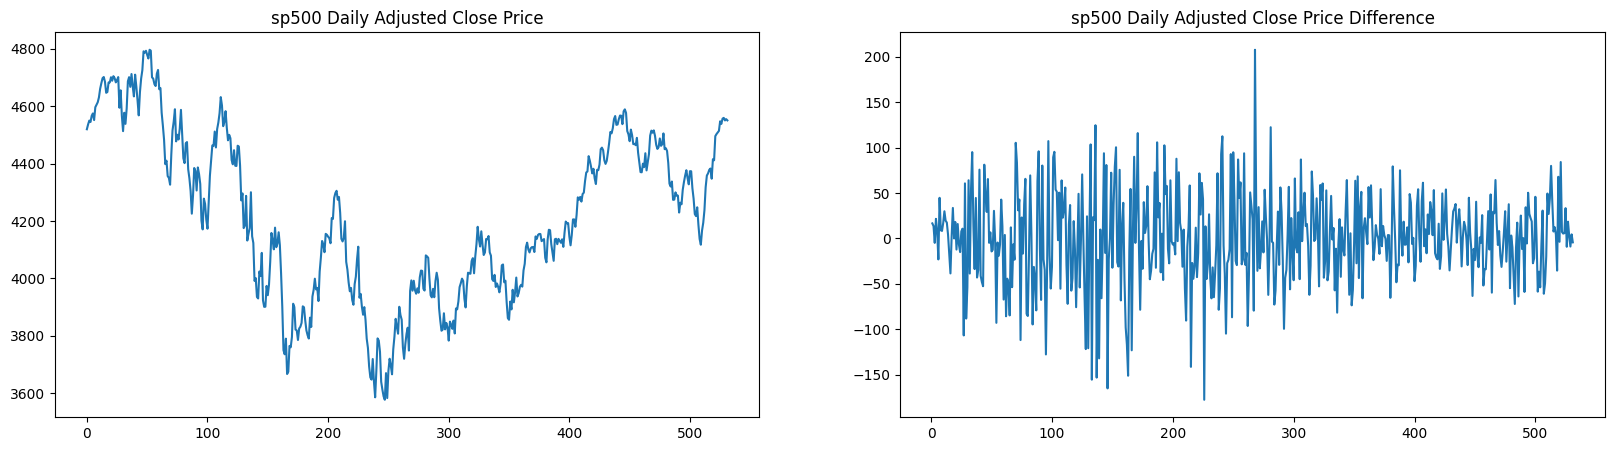

In [77]:
df_sort = merged_df.sort_values(['index','Date'])
df_sort

for i in df_sort['index'].unique() :

    fig , axs = plt.subplots(nrows=1 , ncols=2 , figsize=(20,5))

    axs[0].plot(df_sort[df_sort['index'] == i]['adjclose'])

    axs[1].plot(df_sort[df_sort['index'] == i]['adjclose'].diff())

    axs[0].set_title(f'{i} Daily Adjusted Close Price')
    axs[1].set_title(f'{i} Daily Adjusted Close Price Difference')

    plt.show()

Now let's consider average adjusted close prices over different time periods such as days of the week, months of the year, etc.

First we'll look at the average closing prices of all 4 stock indexes for each day of the week. Note that stock markets are only open Monday to Friday so the days of the week will be shown as: 0 = Monday, 1 = Tuesday, and so on.

It looks like the only visible trend is that Mondays are on average the day of the week with the lowest adjusted closing price.

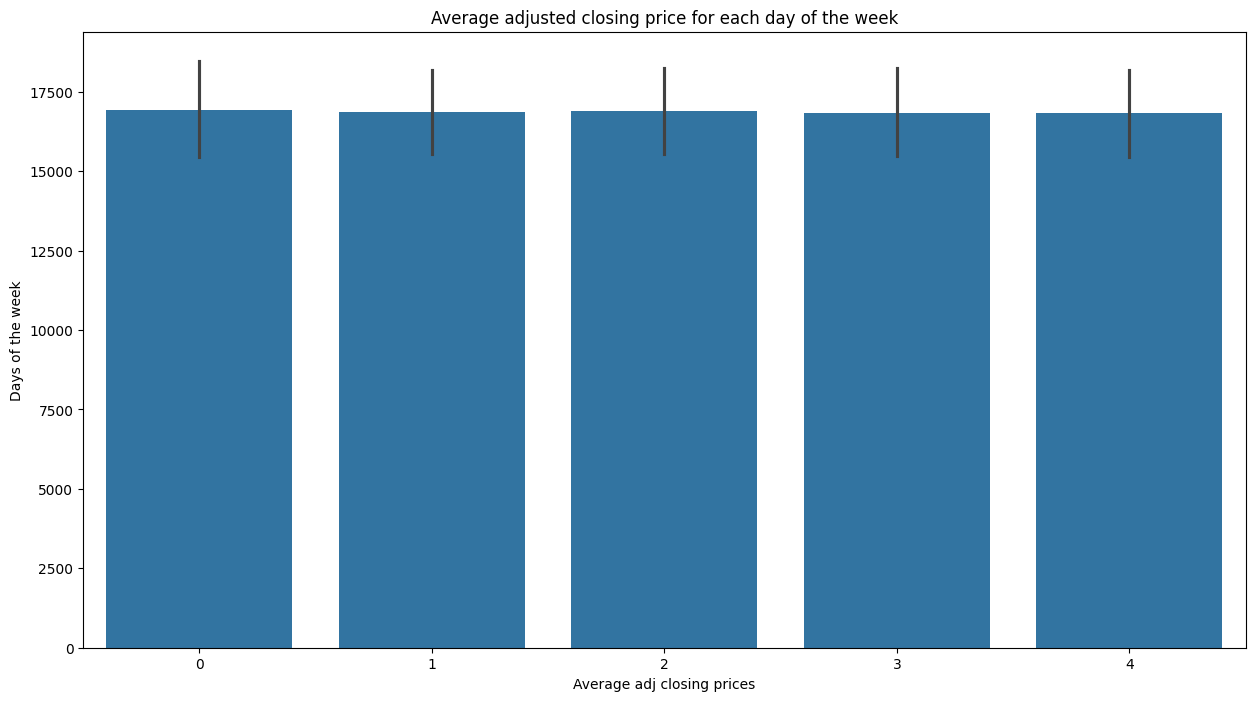

In [78]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=merged_df, x='dayofweek', y='adjclose')
plt.xlabel("Average adj closing prices")
plt.ylabel("Days of the week")
plt.title("Average adjusted closing price for each day of the week")
plt.show(fig)

Now we'll do the same but for each month of the year. It seems like the final, April is the lowest month while November is the highest.

Text(0, 0.5, 'Average adj closing price')

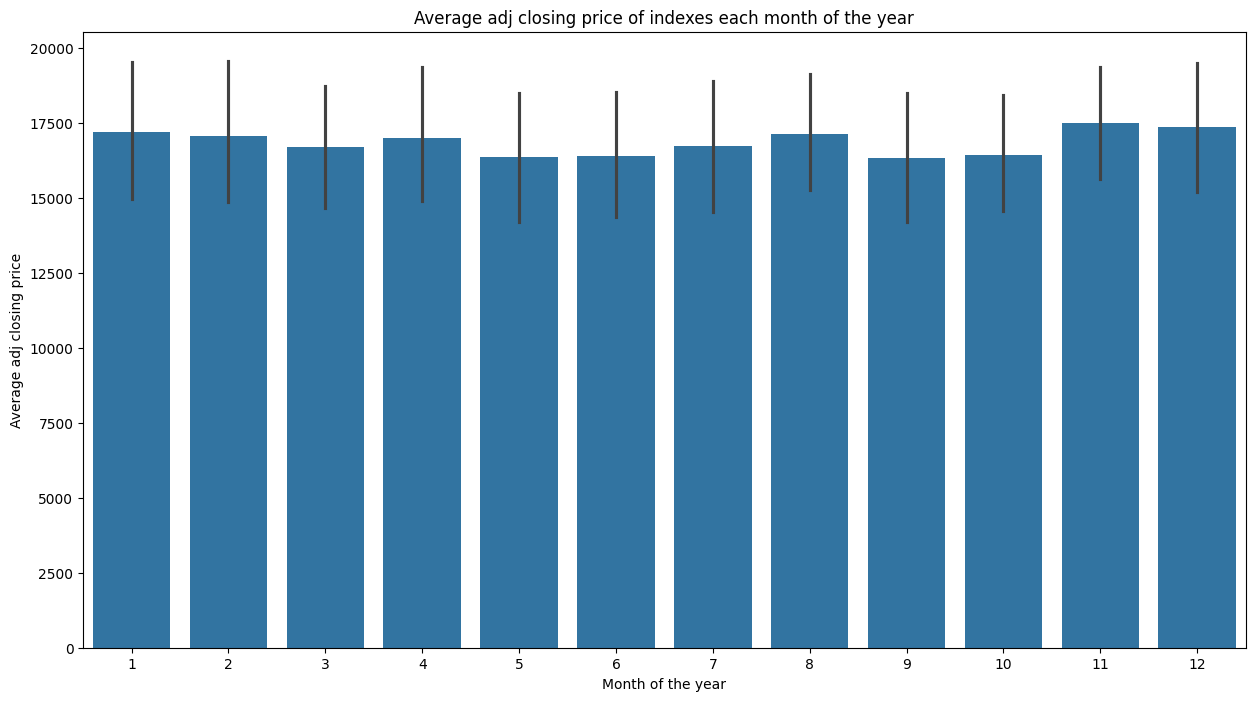

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(data=merged_df, x='month', y='adjclose')
plt.title('Average adj closing price of indexes each month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Average adj closing price')

Now we'll do the same but for each week of the year. It seems like the final, 53rd week of the year has the highest adjusted closing prices.

Text(0, 0.5, 'Average adj closing price')

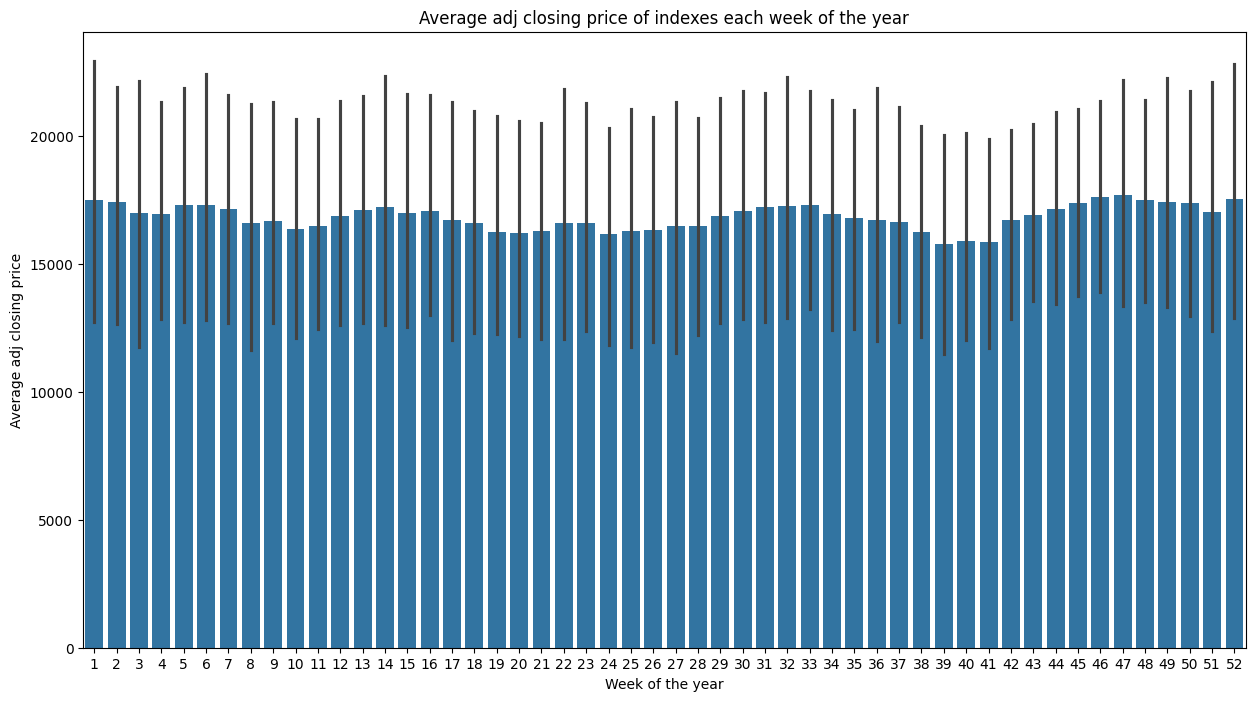

In [80]:
plt.figure(figsize=(15,8))
sns.barplot(data=merged_df, x='weekofyear', y='adjclose')
plt.title('Average adj closing price of indexes each week of the year')
plt.xlabel('Week of the year')
plt.ylabel('Average adj closing price')

And quarter. It seems 2nd quarter has the lowest close price and 4th quarter has the highest.

Text(0, 0.5, 'Average adj closing price')

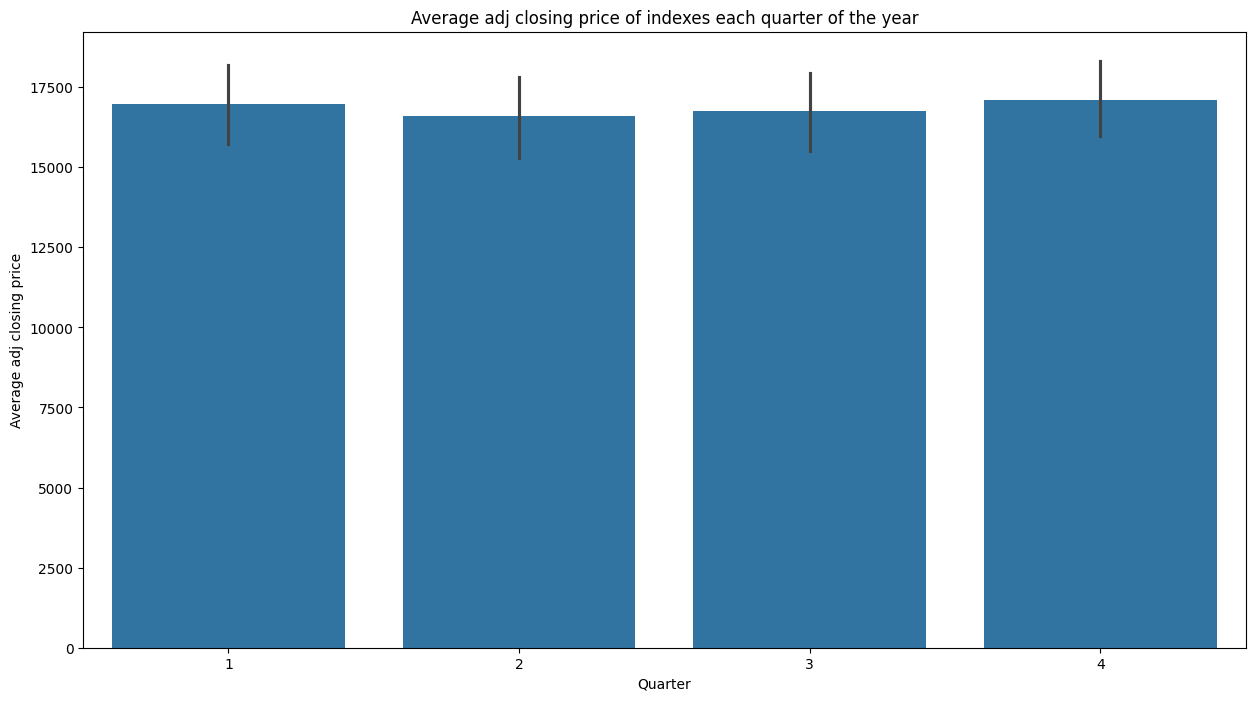

In [81]:
plt.figure(figsize=(15,8))
sns.barplot(data=merged_df, x='quarter', y='adjclose')
plt.title('Average adj closing price of indexes each quarter of the year')
plt.xlabel('Quarter')
plt.ylabel('Average adj closing price')

Now we'll look at the total amount of adjusted closing prices over time, from the same start and end date for a fair comparison, to see how the stock indexes compare to one another in price volume.

The Dow Jones has significantly more value.

In [82]:
sp500_df.reset_index()

index       Date         open         high          low        close  \
0        0 2021-10-19  4497.339844  4520.399902  4496.410156  4519.629883   
1        1 2021-10-20  4524.419922  4540.870117  4524.399902  4536.189941   
2        2 2021-10-21  4532.240234  4551.439941  4526.890137  4549.779785   
3        3 2021-10-22  4546.120117  4559.669922  4524.000000  4544.899902   
4        4 2021-10-25  4553.689941  4572.620117  4537.359863  4566.479980   
..     ...        ...          ...          ...          ...          ...   
527    527 2023-11-22  4553.040039  4568.430176  4545.049805  4556.620117   
528    528 2023-11-24  4555.839844  4560.310059  4552.799805  4559.339844   
529    529 2023-11-27  4554.859863  4560.520020  4546.319824  4550.430176   
530    530 2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137   
531    531 2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078   

        adjclose      volume  dayofweek  month  ...        ema50       ema100  \
0    4519.629883  3459130000          1     10  ...  4405.904615  4360.201672   
1    4536.189941  3670760000          2     10  ...  4410.365866  4363.416372   
2    4549.779785  3822330000          3     10  ...  4415.301670  4366.898906   
3    4544.899902  3758220000          4     10  ...  4420.576889  4370.583863   
4    4566.479980  3899400000          0     10  ...  4425.453694  4374.095023   
..           ...         ...        ...    ...  ...          ...          ...   
527  4556.620117  3042810000          2     11  ...  4372.352751  4353.603791   
528  4559.339844  1639500000          4     11  ...  4379.578922  4357.623919   
529  4550.430176  3403990000          0     11  ...  4386.628370  4361.618295   
530  4554.890137  3586240000          1     11  ...  4393.051970  4365.357146   
531  4550.580078  4418760000          2     11  ...  4399.398565  4369.110276   

          ema200  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9     RSI_14  \
0    4289.583558      9.452598      19.562854     -10.110256  62.988319   
1    4292.226724     17.532844      22.114480      -4.581636  64.473028   
2    4295.025484     24.747806      23.463554       1.284253  65.689404   
3    4297.943598     29.729250      22.755998       6.973252  64.831038   
4    4300.768140     35.014783      22.433225      12.581558  66.891413   
..           ...           ...            ...            ...        ...   
527  4288.412188     65.826325      22.285083      43.541242  71.337409   
528  4291.082764     68.011891      19.576519      48.435372  71.551763   
529  4293.753812     68.238422      15.842440      52.395982  69.712486   
530  4296.309532     67.994038      12.478445      55.515593  70.126455   
531  4298.884195     66.683886       8.934634      57.749251  69.142922   

     RSI_14_A_60  RSI_14_B_40           obv  
0              1            0  8.603813e+10  
1              1            0  8.970889e+10  
2              1            0  9.353122e+10  
3              1            0  8.977300e+10  
4              1            0  9.367240e+10  
..           ...          ...           ...  
527            1            0  7.859300e+09  
528            1            0  9.498800e+09  
529            1            0  6.094810e+09  
530            1            0  9.681050e+09  
531            1            0  5.262290e+09  

[532 rows x 29 columns]

In [83]:
cd ..

c:\Users\Salma


In [86]:

dowjones_df = pd.read_parquet('C:/Users/Salma/Stock_Predictions/MACRO_TABLES/RESET_INDEX4_EDA/MT_Dow_Jones.parquet')
# # # C:\Users\Salma\Stock_Predictions\MACRO_TABLES\RESET_INDEX4_EDA\MT_NASDAQ.parquet
sp500_df = pd.read_parquet('C:/Users/Salma/Stock_Predictions/MACRO_TABLES/RESET_INDEX4_EDA/MT_SP_500.parquet')
nasdaq_df = pd.read_parquet('C:/Users/Salma/Stock_Predictions/MACRO_TABLES/RESET_INDEX4_EDA/MT_NASDAQ.parquet')


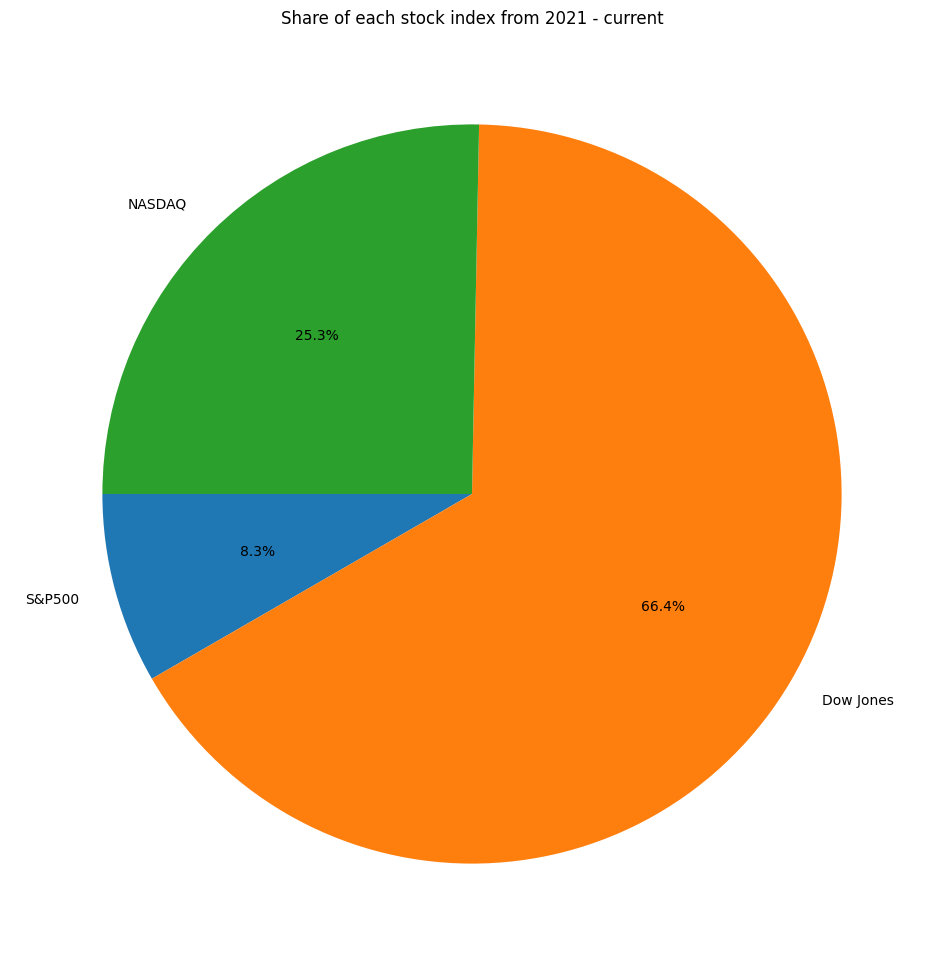

In [87]:
sp500_market = (sp500_df.reset_index()).loc[sp500_df['Date'] > "1992-01-03"]["adjclose"].sum()
sp500_market
# .index
dow_market = (dowjones_df.reset_index()).loc[dowjones_df['Date'] > "1992-01-03"]["adjclose"].sum()
dow_market

nasdaq_market = (nasdaq_df.reset_index()).loc[nasdaq_df['Date'] > "1992-01-03"]["adjclose"].sum()
sp500_market

# # nikkei_market = nikkei_df.loc[nikkei_df.index > "1992-01-03"]["adjclose"].sum()
# # nikkei_market

d = {'index_name': ['S&P500', 'Dow Jones', 'NASDAQ'], 'market_share': [sp500_market, dow_market, nasdaq_market]}


market_share_df = pd.DataFrame(data=d)

market_share_df

plt.figure(figsize=(12,12))
plt.title("Share of each stock index from 2021 - current")
plt.pie(market_share_df.market_share, labels=market_share_df.index_name, autopct='%1.1f%%', startangle=180);

## Preparing the data for all models: shift targets and identify inputs / target columns

We're now ready to start preparing our data for the models that we create.

First thing we're going to do is shift the adjusted close column one day backwards. When we predict stock index prices, we want to be looking ahead - in order to achieve this we're going to shift the column back by one day so that the target of a row is the following day.

We'll create a function that we can apply to each stock index.

In [88]:
def adj_close_shift(df):
    df2 = df.copy()
    df2['adjclose'] = df2['adjclose'].shift(-1)
    df2 = df2.dropna()
    return df2

In [89]:
sp500_df = adj_close_shift(sp500_df)
dowjones_df = adj_close_shift(dowjones_df)
nasdaq_df = adj_close_shift(nasdaq_df)
# nikkei_df = adj_close_shift(nikkei_df)

Now we'll identify the input and target columns.

We're not going to use any of the price columns (open, low, high, close) because these factors essentially tell us the adjusted closing price. Instead, we're going to rely on the other columns that refer to time and stock features to predict the values of the next day.

In [90]:
input_cols = ['volume', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear', 'openclose',
             'sma50', 'sma100', 'sma200', 'ema50', 'ema100', 'ema200', 'MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9', 'RSI_14', 'RSI_14_A_60',
              'RSI_14_B_40', 'obv']
target_col = 'adjclose'

## Linear Regression Model

Before we train 2 models that are a bit complex, we'll create a basic linear regression model as a base line. We know that our stock index prices are not linear, so we can assume this model won't be a great choice. With that being said, this will give us a low bar to be improved upon with our other two models.

### Preparing the data for modeling: train-test splits

We're going to split our data sets into train-test sets (we won't create a validation set as there are no hyperparameters to tune for a Linear Regression model.

I'll be splitting the data based on intervals of time since time is a very important factor in index stock price fluctuations. I'll be splitting each data set so that 90% of the data is for training and 10% is for testing.

In [91]:
def linear_train_test_split(df):

    input_cols = ['volume', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear', 'openclose',
             'sma50', 'sma100', 'sma200', 'ema50', 'ema100', 'ema200', 'MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9', 'RSI_14', 'RSI_14_A_60',
              'RSI_14_B_40', 'obv']
    target_col = 'adjclose'

    train_len = math.ceil(len(df)*0.9)

    train_df = df.copy()[:train_len]
    train = train_df[input_cols]
    train_targets = train_df[target_col]

    test_df = df[train_len:].copy()
    test = test_df[input_cols]
    test_targets = test_df[target_col]

    return train, train_targets, test, test_targets

In [92]:
X_sp500_linear, Y_sp500_linear, X_test_sp500_linear, Y_test_sp500_linear = linear_train_test_split(sp500_df)

X_dowjones_linear, Y_dowjones_linear, X_test_dowjones_linear, Y_test_dowjones_linear = linear_train_test_split(dowjones_df)

X_nasdaq_linear, Y_nasdaq_linear, X_test_nasdaq_linear, Y_test_nasdaq_linear = linear_train_test_split(nasdaq_df)

# X_nikkei_linear, Y_nikkei_linear, X_test_nikkei_linear, Y_test_nikkei_linear = linear_train_test_split(nikkei_df)

Here is the train-test split for the S&P 500.

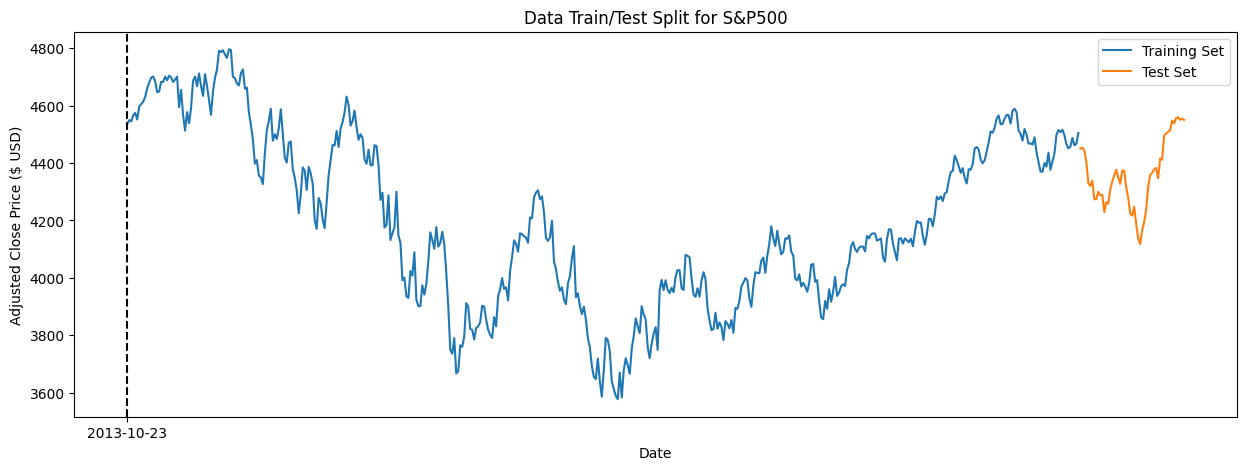

In [93]:
train_len = math.ceil(len(sp500_df)*0.9)

sp500_train = sp500_df[:train_len]
sp500_test = sp500_df[train_len:]

fig, ax = plt.subplots(figsize=(15, 5))
sp500_train["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Test Split for S&P500')
sp500_test["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
ax.axvline('2013-10-23', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Here is the train-test split for the Dow Jones.

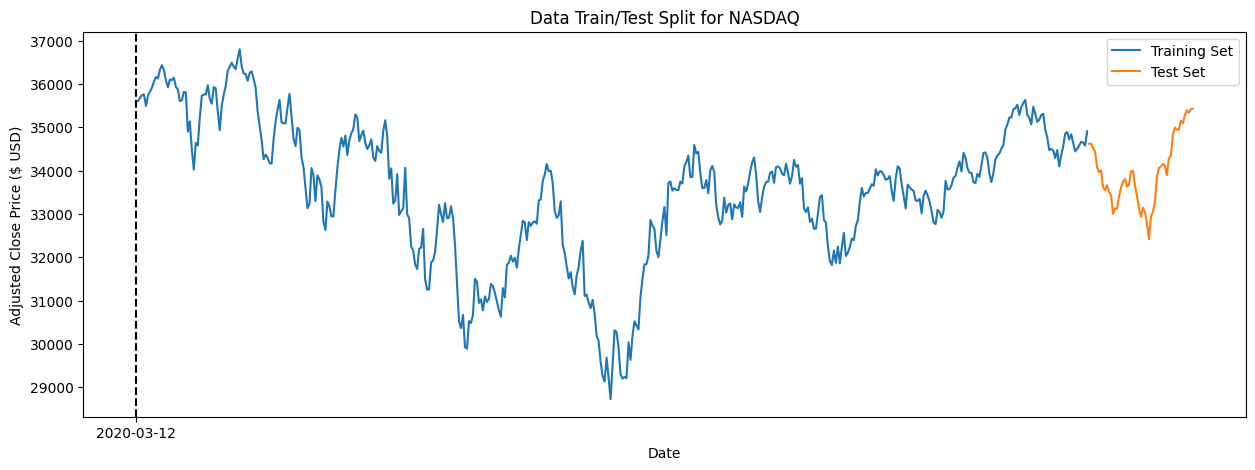

In [94]:
train_len = math.ceil(len(dowjones_df)*0.9)

dowjones_train = dowjones_df[:train_len]
dowjones_test = dowjones_df[train_len:]

fig, ax = plt.subplots(figsize=(15, 5))
dowjones_train["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Test Split for NASDAQ')
dowjones_test["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
ax.axvline('2020-03-12', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Here is the train-test split for the NASDAQ.

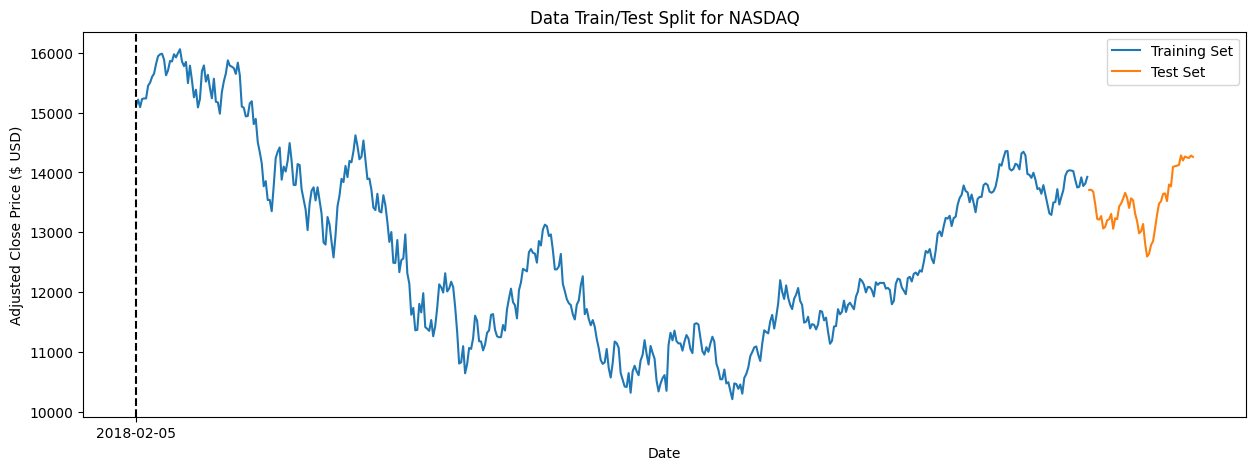

In [95]:
train_len = math.ceil(len(nasdaq_df)*0.9)

nasdaq_train = nasdaq_df[:train_len]
nasdaq_test = nasdaq_df[train_len:]

fig, ax = plt.subplots(figsize=(15, 5))
nasdaq_train["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Test Split for NASDAQ')
nasdaq_test["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
ax.axvline('2018-02-05', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Here is the train-test split for the Nikkei 225.

In [ ]:
# train_len = math.ceil(len(nikkei_df)*0.9)

# nikkei_train = nikkei_df[:train_len]
# nikkei_test = nikkei_df[train_len:]

# fig, ax = plt.subplots(figsize=(15, 5))
# nikkei_train["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Test Split for Nikkei 225')
# nikkei_test["adjclose"].plot(ax=ax, label='Test Set')
# plt.xlabel("Date")
# plt.ylabel("Adjusted Close Price ($ USD)")
# ax.axvline('2017-06-14', color='black', ls='--')
# ax.legend(['Training Set', 'Test Set'])
# plt.show()

### Preparing the data for modeling: scaling

Before we use models to predict future stock prices for each stock index, we'll use a scaler to normalise the data. Because stock prices do not necessarily have a maximum value, we'll use a Standard scaler as opposed to MinMaxScaler.

We won't scale our target variable as there are numerous ideas about what is best practise, and I've determined that for our linear and XGBoost model we won't scale the targets.

We'll scale each data set individually for ease later on.

In [96]:
scaler = StandardScaler().fit(X_sp500_linear)
scaled_linear = scaler.transform(X_sp500_linear)
X_sp500_linear = pd.DataFrame(scaled_linear, columns=X_sp500_linear.columns)

In [97]:
scaler = StandardScaler().fit(X_sp500_linear)
scaled_linear = scaler.fit_transform(X_test_sp500_linear)
X_test_sp500_linear = pd.DataFrame(scaled_linear, columns=X_sp500_linear.columns)

In [98]:
scaler = StandardScaler().fit(X_dowjones_linear)
scaled_linear = scaler.transform(X_dowjones_linear)
X_dowjones_linear = pd.DataFrame(scaled_linear, columns=X_dowjones_linear.columns)

In [99]:
scaler = StandardScaler().fit(X_dowjones_linear)
scaled_linear = scaler.fit_transform(X_test_dowjones_linear)
X_test_dowjones_linear = pd.DataFrame(scaled_linear, columns=X_dowjones_linear.columns)

In [100]:
scaler = StandardScaler().fit(X_nasdaq_linear)
scaled_linear = scaler.transform(X_nasdaq_linear)
X_nasdaq_linear = pd.DataFrame(scaled_linear, columns=X_nasdaq_linear.columns)

In [101]:
scaler = StandardScaler().fit(X_nasdaq_linear)
scaled_linear = scaler.fit_transform(X_test_nasdaq_linear)
X_test_nasdaq_linear = pd.DataFrame(scaled_linear, columns=X_nasdaq_linear.columns)

In [ ]:
# scaler = StandardScaler().fit(X_nikkei_linear)
# scaled_linear = scaler.transform(X_nikkei_linear)
# X_nikkei_linear = pd.DataFrame(scaled_linear, columns=X_nikkei_linear.columns)

In [ ]:
# scaler = StandardScaler().fit(X_nikkei_linear)
# scaled_linear = scaler.fit_transform(X_test_nikkei_linear)
# X_test_nikkei_linear = pd.DataFrame(scaled_linear, columns=X_nikkei_linear.columns)

### Modeling: Linear Regression

We'll start by defining our model, linreg.

In [102]:
linreg = LinearRegression()

We'll also define a function to calculate the root mean squared error of our various predictions.

In [103]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

We'll now create a function that can create, fit, and predict the train and test values for our stock indexes.

In [104]:
def linreg_model(train_df, train_targets, test_df, test_targets):
    model = linreg.fit(train_df, train_targets)

    train_preds = model.predict(train_df)
    train_rmse = rmse(train_preds, train_targets)

    test_preds = model.predict(test_df)
    test_rmse = rmse(test_preds, test_targets)

    return train_preds, train_rmse, test_preds, test_rmse

#### Predicting S&P500

We'll start by fitting our model and calculating the predictions, followed by RMSE for the train and test sets.

In [105]:
sp500_linear_preds, sp500_linear_rmse, test_sp500_linear_preds, sp500_linear_test_rmse = linreg_model(X_sp500_linear, Y_sp500_linear, X_test_sp500_linear, Y_test_sp500_linear)
print("Linear train RSME:{}, linear test RMSE:{}".format(sp500_linear_rmse, sp500_linear_test_rmse))

Linear train RSME:53.5006522189671, linear test RMSE:294.89486176912925


Wow, the test set RMSE is the biggest I've ever seen in ML...

Now we'll look at the weights assigned to each feature in our model to understand what our model values.

In [108]:
X_sp500_linear

volume  dayofweek     month      year   quarter  dayofyear  dayofmonth  \
0   -1.034162  -0.746605  1.039268 -1.966774  1.376103   1.066222    0.372397   
1   -0.792802  -0.027095  1.039268 -1.966774  1.376103   1.075695    0.485704   
2   -0.619940   0.692416  1.039268 -1.966774  1.376103   1.085168    0.599011   
3   -0.693056   1.411927  1.039268 -1.966774  1.376103   1.094641    0.712318   
4   -0.532043  -1.466116  1.039268 -1.966774  1.376103   1.123059    1.052239   
..        ...        ...       ...       ...       ...        ...         ...   
473 -0.686738   0.692416  0.749775  1.161739  0.481168   0.668366   -0.987289   
474 -1.262075   1.411927  0.749775  1.161739  0.481168   0.677839   -0.873982   
475 -1.135904  -1.466116  0.749775  1.161739  0.481168   0.706257   -0.534061   
476 -1.060838  -0.746605  0.749775  1.161739  0.481168   0.715730   -0.420754   
477 -0.953986  -0.027095  0.749775  1.161739  0.481168   0.725202   -0.307446   

     weekofyear  openclose     sma50  ...     ema50    ema100    ema200  \
0      1.067268   0.503873  0.904034  ...  0.805954  0.710548  0.461477   
1      1.067268   0.262677  0.910608  ...  0.823301  0.724847  0.476813   
2      1.067268   0.394957  0.918099  ...  0.842494  0.740338  0.493052   
3      1.067268  -0.035156  0.926186  ...  0.863007  0.756729  0.509984   
4      1.133773   0.286063  0.932519  ...  0.881971  0.772347  0.526372   
..          ...        ...       ...  ...       ...       ...       ...   
473    0.668243   0.373194  1.044610  ...  0.931347  0.677493  0.191929   
474    0.668243   0.134751  1.050089  ...  0.933327  0.686157  0.203953   
475    0.734747   0.141390  1.056162  ...  0.936199  0.695210  0.216223   
476    0.734747  -0.267866  1.063018  ...  0.943528  0.706722  0.230104   
477    0.734747   0.102644  1.063886  ...  0.946671  0.715756  0.242369   

     MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9    RSI_14  RSI_14_A_60  \
0        0.176929       1.147431      -0.238019  0.998997     1.662462   
1        0.341899       1.298163      -0.115699  1.132887     1.662462   
2        0.489204       1.377856       0.014082  1.242578     1.662462   
3        0.590907       1.336059       0.139950  1.165172     1.662462   
4        0.698819       1.316992       0.264033  1.350974     1.662462   
..            ...            ...            ...       ...          ...   
473      0.063292       0.295165      -0.041962 -0.324844    -0.601518   
474      0.042721       0.186876      -0.023696 -0.236399    -0.601518   
475      0.074745       0.221987      -0.002142  0.165817    -0.601518   
476      0.057172       0.135272       0.011292 -0.196471    -0.601518   
477      0.051592       0.093661       0.020829 -0.118739    -0.601518   

     RSI_14_B_40       obv  
0      -0.434804  1.159316  
1      -0.434804  1.229940  
2      -0.434804  1.303480  
3      -0.434804  1.231173  
4      -0.434804  1.306196  
..           ...       ...  
473    -0.434804 -0.959571  
474    -0.434804 -0.896864  
475    -0.434804 -0.832028  
476    -0.434804 -0.898130  
477    -0.434804 -0.830226  

[478 rows x 22 columns]

In [119]:
sp500_lin_model = LinearRegression().fit(X_sp500_linear, Y_sp500_linear)

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(sp500_lin_model.coef_, sp500_lin_model.intercept_)
})
weights_df.sort_values('weight', ascending=False).head(10)

feature       weight
22              1  4200.591699
12          ema50   683.471388
7      weekofyear   181.893588
5       dayofyear   181.612697
11         sma200   128.551382
10         sma100    72.648896
16  MACDh_12_26_9    46.900561
18         RSI_14    42.595069
15   MACD_12_26_9    27.074236
8       openclose    18.958556

EMA50 is highly important in calculating the future prices. The second value, 1, represents the gradient of our linear model.

In [123]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [124]:
# targets = np.array(sp500_df[train_len:].adjclose)
# predictions = np.array(test_sp500_linear_preds)
# # fig, ax = plt.subplots(figsize=(15, 5))

# import plotly.graph_objs as go
# import plotly.io as pio

# # Assuming 'targets' and 'predictions' are already defined correctly as arrays

# fig = go.Figure()

# fig.add_trace(go.Scatter(x=sp500_df[train_len:].index, y=targets, mode='lines', name='Actual', line=dict(color='blue')))
# fig.add_trace(go.Scatter(x=sp500_df[train_len:].index, y=predictions, mode='lines', name='Predictions', line=dict(color='orange')))

# fig.update_layout(
#     title='S&P500 Linear Predictions vs actual values',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Adjusted close price'),
#     legend=dict(x=0, y=1.0),
# )

# pio.show(fig)



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [115]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(sp500_df)*0.9)

# targets = sp500_df[train_len:].adjclose
# predictions = test_sp500_linear_preds

# plt.plot(sp500_df[train_len:].index, targets, alpha=0.9);
# plt.plot(sp500_df[train_len:].index, predictions,alpha=0.8);
# plt.title('S&P500 Linear Predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'Predictions']);

Our model predictions are much greater than the actual values. Let's see if we have any improvement for the following data sets.

#### Predicting the Dow Jones

We'll start by fitting our model and calculating the predictions, followed by RMSE for the train and test sets.

In [125]:
dowjones_linear_preds, dowjones_linear_rmse, test_dowjones_linear_preds, dowjones_linear_test_rmse = linreg_model(X_dowjones_linear, Y_dowjones_linear, X_test_dowjones_linear, Y_test_dowjones_linear)
print("Linear train RSME:{}, linear test RMSE:{}".format(dowjones_linear_rmse, dowjones_linear_test_rmse))

Linear train RSME:349.60480460933553, linear test RMSE:1568.8136220053257


Now we'll look at the weights assigned to each feature in our model to understand what our model values.

In [126]:
dowjones_lin_model = LinearRegression().fit(X_dowjones_linear, Y_dowjones_linear)

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(dowjones_lin_model.coef_, dowjones_lin_model.intercept_)
})
weights_df.sort_values('weight', ascending=False).head(10)

feature        weight
22              1  33545.205368
12          ema50   2551.660461
11         sma200   1127.915206
7      weekofyear   1079.857277
5       dayofyear   1079.703715
13         ema100   1008.706699
10         sma100    453.159573
18         RSI_14    406.168201
16  MACDh_12_26_9    283.871666
15   MACD_12_26_9    200.621934

For this model, it seems ema is the most important feature.

In [128]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(dowjones_df)*0.9)

# targets = dowjones_df[train_len:].adjclose
# predictions = test_dowjones_linear_preds

# plt.plot(dowjones_df[train_len:].index, targets, alpha=0.9);
# plt.plot(dowjones_df[train_len:].index, predictions,alpha=0.8);
# plt.title('The Dow Jones Linear Predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'Predictions']);

The linear regression model has done about as well as it did for the S&P500 set when predicting the Dow Jones test targets.

#### Predicting the NASDAQ

We'll start by fitting our model and calculating the predictions, followed by RMSE for the train and test sets.

In [129]:
nasdaq_linear_preds, nasdaq_linear_rmse, test_nasdaq_linear_preds, nasdaq_linear_test_rmse = linreg_model(X_nasdaq_linear, Y_nasdaq_linear, X_test_nasdaq_linear, Y_test_nasdaq_linear)
print("Linear train RSME:{}, linear test RMSE:{}".format(nasdaq_linear_rmse, nasdaq_linear_test_rmse))

Linear train RSME:213.8650961862375, linear test RMSE:1671.3582476125


Now we'll look at the weights assigned to each feature in our model to understand what our model values.

In [130]:
nasdaq_lin_model = LinearRegression().fit(X_nasdaq_linear, Y_nasdaq_linear)

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(nasdaq_lin_model.coef_, nasdaq_lin_model.intercept_)
})
weights_df.sort_values('weight', ascending=False).head(10)

feature        weight
22              1  12728.289880
12          ema50   4153.595032
10         sma100    414.359605
11         sma200    360.785936
16  MACDh_12_26_9    178.939914
18         RSI_14    152.827126
15   MACD_12_26_9     92.776221
8       openclose     61.850829
21            obv     53.072078
5       dayofyear     49.576537

Again, ema is the most important element of calculating the future prices.

In [132]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(nasdaq_df)*0.9)

# targets = nasdaq_df[train_len:].adjclose
# predictions = test_nasdaq_linear_preds

# plt.plot(nasdaq_df[train_len:].index, targets, alpha=0.9);
# plt.plot(nasdaq_df[train_len:].index, predictions,alpha=0.8);
# plt.title('NASDAQ Linear Predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'Predictions']);

Again, the linear regression model has done an excellent job in predicting the NASDAQ test targets.

#### Predicting the Nikkei 225

We'll start by fitting our model and calculating the predictions, followed by RMSE for the train and test sets.

In [ ]:
# nikkei_linear_preds, nikkei_linear_rmse, test_nikkei_linear_preds, nikkei_linear_test_rmse = linreg_model(X_nikkei_linear, Y_nikkei_linear, X_test_nikkei_linear, Y_test_nikkei_linear)
# print("Linear train RSME:{}, linear test RMSE:{}".format(nikkei_linear_rmse, nikkei_linear_test_rmse))

Linear train RSME:1.5909530910876677, linear test RMSE:97.08630370077385


Now we'll look at the weights assigned to each feature in our model to understand what our model values.

In [ ]:
# nikkei_lin_model = LinearRegression().fit(X_nikkei_linear, Y_nikkei_linear)

# weights_df = pd.DataFrame({
#     'feature': np.append(input_cols, 1),
#     'weight': np.append(nikkei_lin_model.coef_, nikkei_lin_model.intercept_)
# })
# weights_df.sort_values('weight', ascending=False).head(10)

feature      weight
12          ema50  177.124018
22              1   92.086438
11         sma200    8.432834
14         ema200    4.867255
2           month    2.276271
16  MACDh_12_26_9    2.059610
15   MACD_12_26_9    1.078155
8       openclose    0.728210
17  MACDs_12_26_9    0.523236
18         RSI_14    0.252304

For this model, the most important feature is ema.

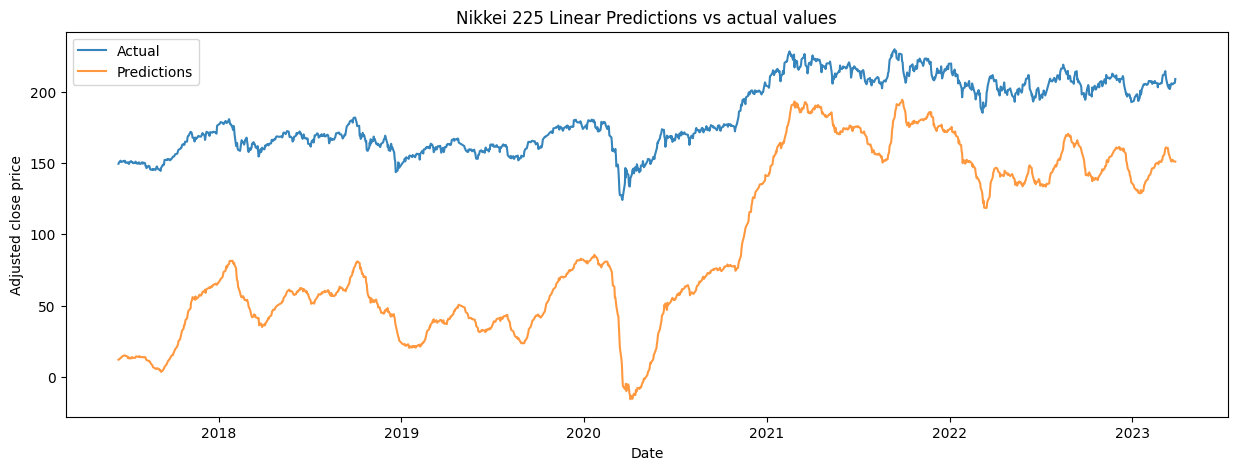

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(nikkei_df)*0.9)

# targets = nikkei_df[train_len:].adjclose
# predictions = test_nikkei_linear_preds

# plt.plot(nikkei_df[train_len:].index, targets, alpha=0.9);
# plt.plot(nikkei_df[train_len:].index, predictions,alpha=0.8);
# plt.title('Nikkei 225 Linear Predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'Predictions']);

The linear regression model has done a better job in predicting the Nikkei 225 test targets.

### Closing thoughts about Linear Regression modeling

The Linear Regression model did not do a great job in predicting the stock index prices - but we expected this to be the case. It seems that each model heavily relied on EMA50, followed by SMA200 and EMA200. Although the shape of our predictions is quite similar, the difference in amount was quite substantial with the predictions always being of lesser value.

This model is not a good model to use to predict future stock index prices but if it is being used, we can assume for these 4 stock indexes that the model will produce extremely moderate predictions.

## XGBoost Model

Now we're ready to try out the XGBoost model on our data.

### Preparing the data for modeling: train-test splits

We're going to split our data sets into train-validate-test sets.

I'll be splitting the data based on intervals of time since time is a very important factor in index stock price fluctuations. I'll be splitting each data set so that 80% of the data is for training, 10% is for validation, and 10% is for testing.

In [ ]:
# sp500_df

NameError: name 'sp500_df' is not defined

In [133]:
def xgboost_train_val_test_split(df):

    input_cols = ['volume', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear', 'openclose',
             'sma50', 'sma100', 'sma200', 'ema50', 'ema100', 'ema200', 'MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9', 'RSI_14', 'RSI_14_A_60',
              'RSI_14_B_40', 'obv']
    target_col = 'adjclose'

    train_len = math.ceil(len(df)*0.8)
    val_len = math.ceil(len(df)*0.9)

    train_df = df[:train_len].copy()
    train = train_df[input_cols]
    train_targets = df[target_col][:train_len]

    val_df = df[train_len:val_len].copy()
    val = val_df[input_cols]
    val_targets = df[target_col][train_len:val_len]

    test_df = df[val_len:].copy()
    test = test_df[input_cols]
    test_targets = df[target_col][val_len:]

    return train, train_targets, val, val_targets, test, test_targets

In [134]:
X_sp500_xgboost, Y_sp500_xgboost, X_val_sp500_xgboost, Y_val_sp500_xgboost, X_test_sp500_xgboost, Y_test_sp500_xgboost = xgboost_train_val_test_split(sp500_df)

X_dowjones_xgboost, Y_dowjones_xgboost, X_val_dowjones_xgboost, Y_val_dowjones_xgboost, X_test_dowjones_xgboost, Y_test_dowjones_xgboost = xgboost_train_val_test_split(dowjones_df)

X_nasdaq_xgboost, Y_nasdaq_xgboost, X_val_nasdaq_xgboost, Y_val_nasdaq_xgboost, X_test_nasdaq_xgboost, Y_test_nasdaq_xgboost = xgboost_train_val_test_split(nasdaq_df)

# X_nikkei_xgboost, Y_nikkei_xgboost, X_val_nikkei_xgboost, Y_val_nikkei_xgboost, X_test_nikkei_xgboost, Y_test_nikkei_xgboost = xgboost_train_val_test_split(nikkei_df)

Here is the train-validation-test split for the S&P 500.

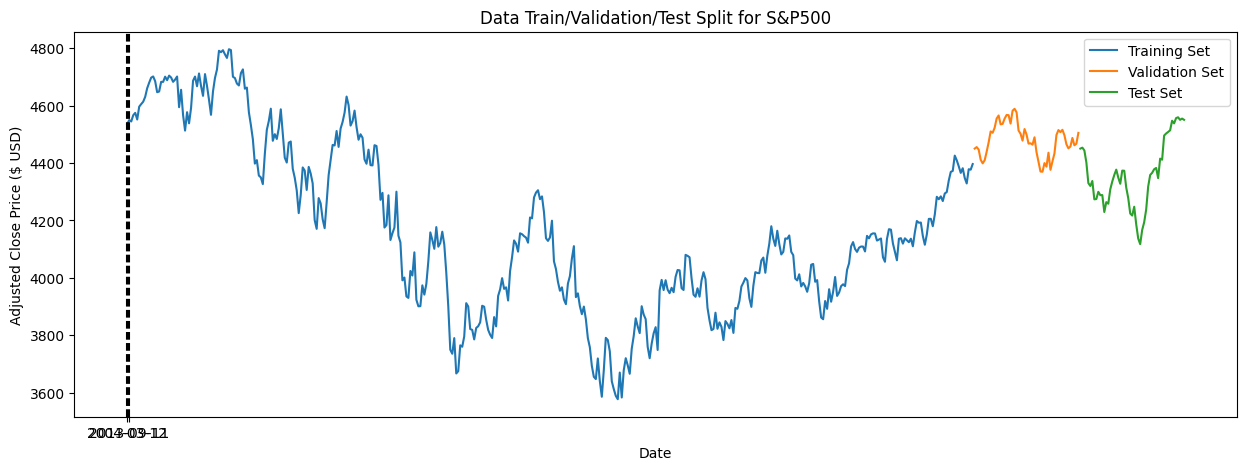

In [135]:
train_len = math.ceil(len(sp500_df)*0.8)
val_len = math.ceil(len(sp500_df)*0.9)

sp500_train_graph = sp500_df[:train_len]
sp500_val_graph = sp500_df[train_len:val_len]
sp500_test_graph = sp500_df[val_len:]

fig, ax = plt.subplots(figsize=(15, 5))
sp500_train_graph["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test Split for S&P500')
sp500_val_graph["adjclose"].plot(ax=ax, label='Validation Set')
sp500_test_graph["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
ax.axvline('2004-03-12', color='black', ls='--')
ax.axvline('2013-09-11', color='black', ls='--')
ax.legend(['Training Set', 'Validation Set', 'Test Set'])
plt.show()

Here is the train-val-test split for the Dow Jones.

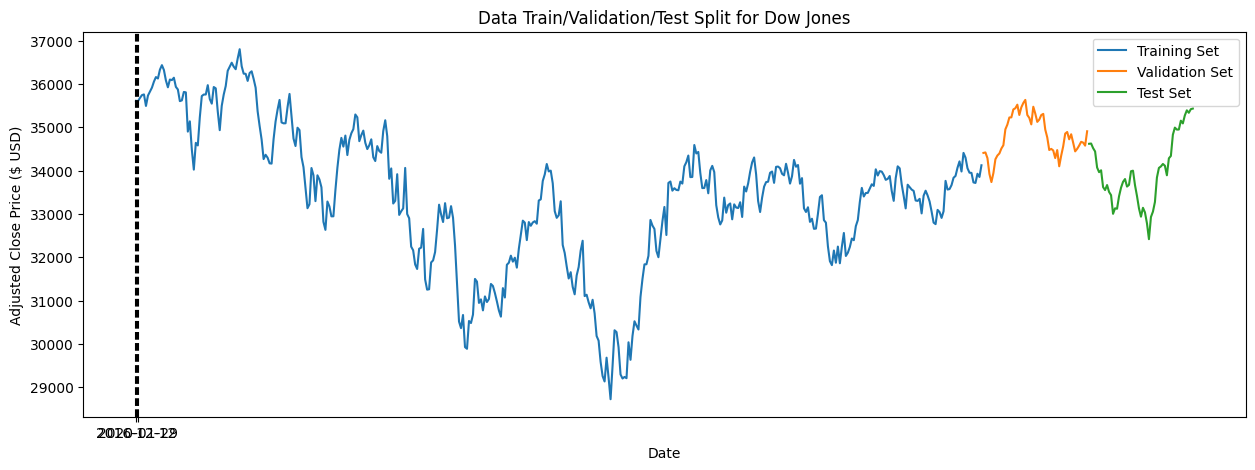

In [136]:
train_len = math.ceil(len(dowjones_df)*0.8)
val_len = math.ceil(len(dowjones_df)*0.9)

dowjones_train_graph = dowjones_df[:train_len]
dowjones_val_graph = dowjones_df[train_len:val_len]
dowjones_test_graph = dowjones_df[val_len:]

fig, ax = plt.subplots(figsize=(15, 5))
dowjones_train_graph["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test Split for Dow Jones')
dowjones_val_graph["adjclose"].plot(ax=ax, label='Validation Set')
dowjones_test_graph["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
ax.axvline('2016-12-12', color='black', ls='--')
ax.axvline('2020-01-29', color='black', ls='--')
ax.legend(['Training Set', 'Validation Set','Test Set'])
plt.show()

Here is the train-val-test split for the NASDAQ.

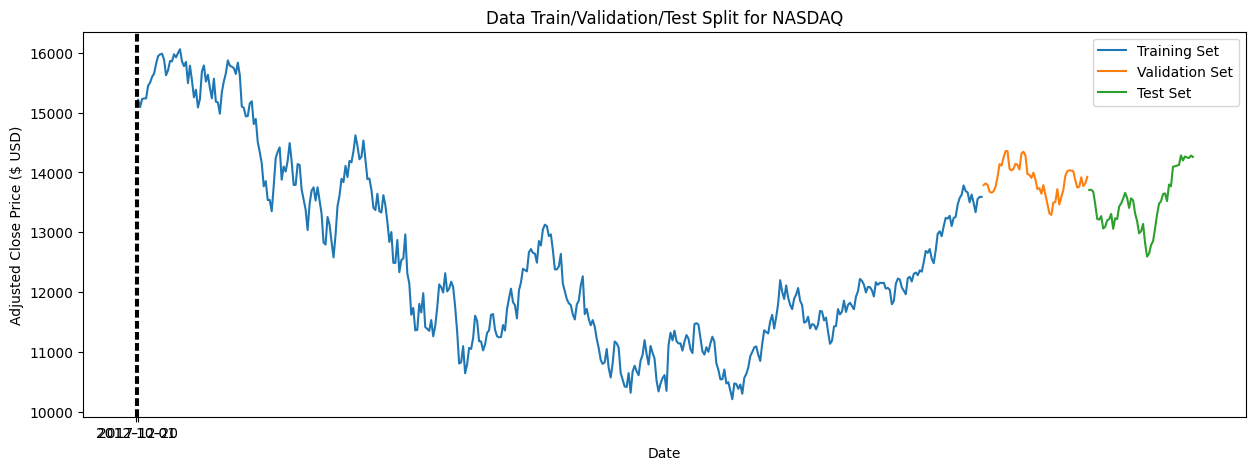

In [137]:
train_len = math.ceil(len(nasdaq_df)*0.8)
val_len = math.ceil(len(nasdaq_df)*0.9)

nasdaq_train_graph = nasdaq_df[:train_len]
nasdaq_val_graph = nasdaq_df[train_len:val_len]
nasdaq_test_graph = nasdaq_df[val_len:]

fig, ax = plt.subplots(figsize=(15, 5))
nasdaq_train_graph["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test Split for NASDAQ')
nasdaq_val_graph["adjclose"].plot(ax=ax, label='Validation Set')
nasdaq_test_graph["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
ax.axvline('2012-10-01', color='black', ls='--')
ax.axvline('2017-12-20', color='black', ls='--')
ax.legend(['Training Set', 'Validation Set','Test Set'])
plt.show()

Here is the train-val-test split for the Nikkei 225.

In [ ]:
# train_len = math.ceil(len(nikkei_df)*0.8)
# val_len = math.ceil(len(nikkei_df)*0.9)

# nikkei_train_graph = nikkei_df[:train_len]
# nikkei_val_graph = nikkei_df[train_len:val_len]
# nikkei_test_graph = nikkei_df[val_len:]

# fig, ax = plt.subplots(figsize=(15, 5))
# nikkei_train_graph["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test Split for Nikkei 225')
# nikkei_val_graph["adjclose"].plot(ax=ax, label='Validation Set')
# nikkei_test_graph["adjclose"].plot(ax=ax, label='Test Set')
# plt.xlabel("Date")
# plt.ylabel("Adjusted Close Price ($ USD)")
# ax.axvline('2011-07-01', color='black', ls='--')
# ax.axvline('2017-05-01', color='black', ls='--')
# ax.legend(['Training Set', 'Validation Set','Test Set'])
# plt.show()

### Preparing the data for modeling: scaling

We're ready to scale our data. We'll scale each data set individually for ease later on. We're only going to scale the inputs and leave the outputs as they are.

In [138]:
scaler = StandardScaler().fit(X_sp500_xgboost)
scaled_xgboost = scaler.transform(X_sp500_xgboost)
X_sp500_xgboost = pd.DataFrame(scaled_xgboost, columns=X_sp500_xgboost.columns)

In [139]:
scaler = StandardScaler().fit(X_sp500_xgboost)
scaled_xgboost = scaler.fit_transform(X_val_sp500_xgboost)
X_val_sp500_xgboost = pd.DataFrame(scaled_xgboost, columns=X_sp500_xgboost.columns)

In [140]:
scaler = StandardScaler().fit(X_sp500_xgboost)
scaled_xgboost = scaler.fit_transform(X_test_sp500_xgboost)
X_test_sp500_xgboost = pd.DataFrame(scaled_xgboost, columns=X_sp500_xgboost.columns)

In [141]:
scaler = StandardScaler().fit(X_dowjones_xgboost)
scaled_xgboost = scaler.transform(X_dowjones_xgboost)
X_dowjones_xgboost = pd.DataFrame(scaled_xgboost, columns=X_dowjones_xgboost.columns)

In [142]:
scaler = StandardScaler().fit(X_dowjones_xgboost)
scaled_xgboost = scaler.fit_transform(X_val_dowjones_xgboost)
X_val_dowjones_xgboost = pd.DataFrame(scaled_xgboost, columns=X_dowjones_xgboost.columns)

In [143]:
scaler = StandardScaler().fit(X_dowjones_xgboost)
scaled_xgboost = scaler.fit_transform(X_test_dowjones_xgboost)
X_test_dowjones_xgboost = pd.DataFrame(scaled_xgboost, columns=X_dowjones_xgboost.columns)

In [144]:
scaler = StandardScaler().fit(X_nasdaq_xgboost)
scaled_xgboost = scaler.transform(X_nasdaq_xgboost)
X_nasdaq_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nasdaq_xgboost.columns)

In [145]:
scaler = StandardScaler().fit(X_nasdaq_xgboost)
scaled_xgboost = scaler.fit_transform(X_val_nasdaq_xgboost)
X_val_nasdaq_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nasdaq_xgboost.columns)

In [146]:
scaler = StandardScaler().fit(X_nasdaq_xgboost)
scaled_xgboost = scaler.fit_transform(X_test_nasdaq_xgboost)
X_test_nasdaq_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nasdaq_xgboost.columns)

In [ ]:
# scaler = StandardScaler().fit(X_nikkei_xgboost)
# scaled_xgboost = scaler.transform(X_nikkei_xgboost)
# X_nikkei_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nikkei_xgboost.columns)

In [ ]:
# scaler = StandardScaler().fit(X_nikkei_xgboost)
# scaled_xgboost = scaler.fit_transform(X_val_nikkei_xgboost)
# X_val_nikkei_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nikkei_xgboost.columns)

In [ ]:
# scaler = StandardScaler().fit(X_nikkei_xgboost)
# scaled_xgboost = scaler.fit_transform(X_test_nikkei_xgboost)
# X_test_nikkei_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nikkei_xgboost.columns)

### Modeling: XGBoost

We'll start by defining our model, xgboost.

In [147]:
xgboost = XGBRegressor(random_state=42)

We'll now create a baseline XGBoost model function that can create, fit, and predict the train and test values for our stock indexes.

In [148]:
import numpy as np

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [149]:
def xgboost_model(train_df, train_targets, val_df, val_targets, test_df, test_targets):
    model = xgboost.fit(train_df, train_targets)

    train_preds = model.predict(train_df)
    train_rmse = rmse(train_preds, train_targets)

    val_preds = model.predict(val_df)
    val_rmse = rmse(val_preds, val_targets)

    test_preds = model.predict(test_df)
    test_rmse = rmse(test_preds, test_targets)

    return train_preds, train_rmse, val_preds, val_rmse, test_preds, test_rmse

#### Predicting the S&P500

We'll start by fitting our baseline model and calculating the predictions, followed by RMSE for the train, validate, and test sets.

In [150]:
sp500_xgboost_preds, sp500_xgboost_rmse, val_sp500_xgboost_preds, sp500_xgboost_val_rmse, test_sp500_xgboost_preds, sp500_xgboost_test_rmse = xgboost_model(X_sp500_xgboost, Y_sp500_xgboost, X_val_sp500_xgboost, Y_val_sp500_xgboost, X_test_sp500_xgboost, Y_test_sp500_xgboost)
print("XGBoost train RSME:{}, XGBoost validation RSME:{}, XGBoost test RMSE:{}".format(sp500_xgboost_rmse, sp500_xgboost_val_rmse, sp500_xgboost_test_rmse))

XGBoost train RSME:0.473087001089474, XGBoost validation RSME:375.89636317193776, XGBoost test RMSE:317.5440571977165


Now we're going to tune hyperparameters in order to improve our model.

I have done testing and determined the best hyperparameters for each xgboost model for each stock index. Each model was fit to the training data, followed by testing parameters on the validation data. I will not show you all the tests, but rather, the best models.

Here is the function used to test hyperparameters:

In [151]:
def test_params(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('XGBoost Train RMSE: {}, XGBoost Validation RMSE: {}'.format(train_rmse, val_rmse))

Here is the best model for the S&P 500:

In [152]:
sp500_xgboost_model = test_params(X_sp500_xgboost, Y_sp500_xgboost, X_val_sp500_xgboost, Y_val_sp500_xgboost,
                                  colsample_bytree=0.97, max_delta_step=380, min_child_weight=1, gamma=5, n_jobs=-1,
                                  learning_rate=0.1, n_estimators=300, max_depth=4)

XGBoost Train RMSE: 6.432533478207925, XGBoost Validation RMSE: 355.32805319346375


Now we'll use this model to calculate our test predictions and RMSE.

In [153]:
xgboost_sp500_model = XGBRegressor(random_state=42, colsample_bytree=0.97, max_delta_step=380, min_child_weight=1, gamma=5, n_jobs=-1,
                                  learning_rate=0.1, n_estimators=300, max_depth=4)

xgboost_sp500_model.fit(X_sp500_xgboost, Y_sp500_xgboost)

xgboost_sp500_test_preds = xgboost_sp500_model.predict(X_test_sp500_xgboost)
xgboost_sp500_test_rmse = rmse(xgboost_sp500_test_preds, Y_test_sp500_xgboost)

In [154]:
print("XGBoost Test RMSE: {}".format(xgboost_sp500_test_rmse))

XGBoost Test RMSE: 321.39331644605096


Much to my surprise, the XGBoost model with hyperparameters is not an improvement from the linear model.

Now we'll plot the predictions for the test set versus the actual values.

In [156]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(sp500_df)*0.9)

# targets = sp500_df[train_len:].adjclose
# predictions = xgboost_sp500_test_preds
# lin_predictions = test_sp500_linear_preds

# plt.plot(sp500_df[train_len:].index, targets, alpha=0.9);
# plt.plot(sp500_df[train_len:].index, predictions,alpha=0.8);
# plt.plot(sp500_df[train_len:].index, lin_predictions,alpha=0.8);
# plt.title('S&P500 XGBoost predictions/ Linear Predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'XGBoost Predictions', 'Linear Predictions']);

#### Predicting the Dow Jones

We'll start by fitting our baseline model and calculating the predictions, followed by RMSE for the train, validate, and test sets.

In [157]:
dowjones_xgboost_preds, dowjones_xgboost_rmse, val_dowjones_xgboost_preds, dowjones_xgboost_val_rmse, test_dowjones_xgboost_preds, dowjones_xgboost_test_rmse = xgboost_model(X_dowjones_xgboost, Y_dowjones_xgboost, X_val_dowjones_xgboost, Y_val_dowjones_xgboost, X_test_dowjones_xgboost, Y_test_dowjones_xgboost)
print("XGBoost train RSME:{}, XGBoost validation RSME:{}, XGBoost test RMSE:{}".format(dowjones_xgboost_rmse, dowjones_xgboost_val_rmse, dowjones_xgboost_test_rmse))

XGBoost train RSME:1.9607825827347838, XGBoost validation RSME:1432.0761485377086, XGBoost test RMSE:1461.4007606734203


Now we're going to tune hyperparameters in order to improve our model.

Here is the best model for the Dow Jones:

In [158]:
dowjones_xgboost_model = test_params(X_dowjones_xgboost, Y_dowjones_xgboost, X_val_dowjones_xgboost, Y_val_dowjones_xgboost,
                                 n_jobs=-1, n_estimators=70, min_child_weight=10,
                                 colsample_bytree=0.01)

XGBoost Train RMSE: 177.69379394959557, XGBoost Validation RMSE: 1760.103749323587


Now we'll use this model to calculate our test predictions and RMSE.

In [159]:
xgboost_dowjones_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=70, min_child_weight=10,colsample_bytree=0.01)

xgboost_dowjones_model.fit(X_dowjones_xgboost, Y_dowjones_xgboost)

xgboost_dowjones_test_preds = xgboost_dowjones_model.predict(X_test_dowjones_xgboost)
xgboost_dowjones_test_rmse = rmse(xgboost_dowjones_test_preds, Y_test_dowjones_xgboost)

In [160]:
print("XGBoost Test RMSE: {}".format(xgboost_dowjones_test_rmse))

XGBoost Test RMSE: 1484.0759169713974


Much to my surprise, the XGBoost model with hyperparameters is not an improvement from the linear model.

Now we'll plot the predictions for the test set versus the actual values.

In [161]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(dowjones_df)*0.9)

# targets = dowjones_df[train_len:].adjclose
# predictions = xgboost_dowjones_test_preds
# lin_predictions = test_dowjones_linear_preds

# plt.plot(dowjones_df[train_len:].index, targets, alpha=0.9);
# plt.plot(dowjones_df[train_len:].index, predictions,alpha=0.8);
# plt.plot(dowjones_df[train_len:].index, lin_predictions,alpha=0.8);
# plt.title('Dow Jones XGBoost predictions/ Linear predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'XGBoost Predictions', 'Linear Predictions']);

Although there is a huge difference in values, the shape of the predictions is quite indicative of the actual values.

#### Predicting the NASDAQ

We'll start by fitting our baseline model and calculating the predictions, followed by RMSE for the train, validate, and test sets.

In [162]:
nasdaq_xgboost_preds, nasdaq_xgboost_rmse, val_nasdaq_xgboost_preds, nasdaq_xgboost_val_rmse, test_nasdaq_xgboost_preds, nasdaq_xgboost_test_rmse = xgboost_model(X_nasdaq_xgboost, Y_nasdaq_xgboost, X_val_nasdaq_xgboost, Y_val_nasdaq_xgboost, X_test_nasdaq_xgboost, Y_test_nasdaq_xgboost)
print("XGBoost train RSME:{}, XGBoost validation RSME:{}, XGBoost test RMSE:{}".format(nasdaq_xgboost_rmse, nasdaq_xgboost_val_rmse, nasdaq_xgboost_test_rmse))

XGBoost train RSME:1.6072206183533562, XGBoost validation RSME:1434.896450189369, XGBoost test RMSE:1680.0065649883434


In [163]:
nasdaq_linear_test_rmse

1671.3582476125

Now we're going to tune hyperparameters in order to improve our model.

Here is the best model for the NASDAQ:

In [164]:
nasdaq_xgboost_model = test_params(X_nasdaq_xgboost, Y_nasdaq_xgboost, X_val_nasdaq_xgboost, Y_val_nasdaq_xgboost,
                                 n_jobs=-1, learning_rate=0.99, max_depth=10, colsample_bytree=0.3)

XGBoost Train RMSE: 0.0004183626253684082, XGBoost Validation RMSE: 1678.8184725879685


Now we'll use this model to calculate our test predictions and RMSE.

In [165]:
xgboost_nasdaq_model = XGBRegressor(random_state=42, n_jobs=-1, learning_rate=0.99, max_depth=10, colsample_bytree=0.3)

xgboost_nasdaq_model.fit(X_nasdaq_xgboost, Y_nasdaq_xgboost)

xgboost_nasdaq_test_preds = xgboost_nasdaq_model.predict(X_test_nasdaq_xgboost)
xgboost_nasdaq_test_rmse = rmse(xgboost_nasdaq_test_preds, Y_test_nasdaq_xgboost)

In [166]:
print("XGBoost Test RMSE: {}".format(xgboost_nasdaq_test_rmse))

XGBoost Test RMSE: 1895.6321559884534


Again, the XGBoost model with hyperparameters is not an improvement from the linear model.

Now we'll plot the predictions for the test set versus the actual values.

In [167]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(nasdaq_df)*0.9)

# targets = nasdaq_df[train_len:].adjclose
# predictions = xgboost_nasdaq_test_preds
# lin_predictions = test_nasdaq_linear_preds

# plt.plot(nasdaq_df[train_len:].index, targets, alpha=0.9);
# plt.plot(nasdaq_df[train_len:].index, predictions,alpha=0.8);
# plt.plot(nasdaq_df[train_len:].index, lin_predictions,alpha=0.8);
# plt.title('NASDAQ XGBoost predictions/ Linear predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'XGBoost Predictions', 'Linear Predictions']);

#### Predicting the Nikkei 225

We'll start by fitting our baseline model and calculating the predictions, followed by RMSE for the train, validate, and test sets.

In [ ]:
# nikkei_xgboost_preds, nikkei_xgboost_rmse, val_nikkei_xgboost_preds, nikkei_xgboost_val_rmse, test_nikkei_xgboost_preds, nikkei_xgboost_test_rmse = xgboost_model(X_nikkei_xgboost, Y_nikkei_xgboost, X_val_nikkei_xgboost, Y_val_nikkei_xgboost, X_test_nikkei_xgboost, Y_test_nikkei_xgboost)
# print("XGBoost train RSME:{}, XGBoost validation RSME:{}, XGBoost test RMSE:{}".format(nikkei_xgboost_rmse, nikkei_xgboost_val_rmse, nikkei_xgboost_test_rmse))

XGBoost train RSME:0.7826372941253731, XGBoost validation RSME:34.4807896622812, XGBoost test RMSE:98.65245888785692


In [ ]:
# nikkei_linear_test_rmse

97.08630370077385

Now we're going to tune hyperparameters in order to improve our model.

Here is the best model for the Nikkei 225:

In [ ]:
# nikkei_xgboost_model = test_params(X_nikkei_xgboost, Y_nikkei_xgboost, X_val_nikkei_xgboost, Y_val_nikkei_xgboost,
#                                    n_jobs=-1, learning_rate=0.99)

XGBoost Train RMSE: 0.4818863571049012, XGBoost Validation RMSE: 33.633445490365716


Now we'll use this model to calculate our test predictions and RMSE.

In [ ]:
# xgboost_nikkei_model = XGBRegressor(random_state=42, n_jobs=-1, learning_rate=0.99)

# xgboost_nikkei_model.fit(X_nikkei_xgboost, Y_nikkei_xgboost)

# xgboost_nikkei_test_preds = xgboost_nikkei_model.predict(X_test_nikkei_xgboost)
# xgboost_nikkei_test_rmse = rmse(xgboost_nikkei_test_preds, Y_test_nikkei_xgboost)

In [ ]:
# print("XGBoost Test RMSE: {}".format(xgboost_nikkei_test_rmse))

XGBoost Test RMSE: 96.77167871740191


Our XGBoost model with hyperparameters is a slight improvement from the linear model. It would be worthwhile to use the Linear model for a difference so small as it takes less processing power to use.

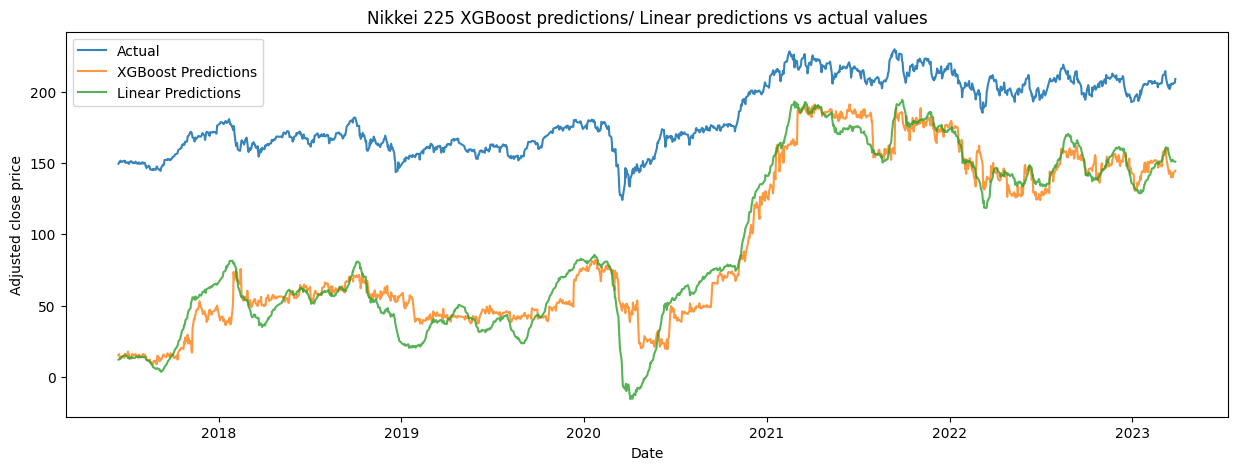

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# train_len = math.ceil(len(nikkei_df)*0.9)

# targets = nikkei_df[train_len:].adjclose
# predictions = xgboost_nikkei_test_preds
# lin_predictions = test_nikkei_linear_preds

# plt.plot(nikkei_df[train_len:].index, targets, alpha=0.9);
# plt.plot(nikkei_df[train_len:].index, predictions,alpha=0.8);
# plt.plot(nikkei_df[train_len:].index, lin_predictions,alpha=0.8);

# plt.title('Nikkei 225 XGBoost predictions/ Linear predictions vs actual values')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'XGBoost Predictions', 'Linear Predicitons']);


### Closing thoughts about XGBoost Regression modeling

Our linear models have outperformed XGBoost for 3/4 data sets. I find this really surprising as I assumed that XGBoost would outperform Linear Regression with flying colours. It also goes to show that because each stock index has a different history of prices, the models interact with the data sets in very different ways. It's an important reminder that every stock index is unique and should not be treated the same when it comes to predictive modeling.

Let's see if LSTM is a better model than Linear Regression.

## LSTM

Now we're ready to try our final model type, Long Short Term Memory, or LSTM.

LSTM is a recurrent neural network model, RNN. It is commonly used to predict future stock prices so I can't wait to see how it compares to Linear Regression and XGBoost.

I have not previously worked with RNN models so I will be learning about how to use the model as the project goes on. I will try and explain each step thoroughly in the event that you also have not worked with RNNs.

We'll start by importing a few libraries.

In [168]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM, Dense
from keras.models import Sequential

LSTM models only require the target column to make predictions. So the inputs and targets are created from just the column, adjclose.

We'll start out by defining sets of our data that only contain the target column, adjclose.

In [169]:
sp500_LSTM = sp500_df[["adjclose"]]
dowjones_LSTM = dowjones_df[["adjclose"]]
nasdaq_LSTM = nasdaq_df[["adjclose"]]
# nikkei_LSTM = nikkei_df[["adjclose"]]

### Preparing the data for modeling: scaling

Now we can scale our data sets. We'll use the StandardScaler().

In [170]:
scaler = StandardScaler().fit(sp500_LSTM)
transform_df = scaler.fit_transform(sp500_LSTM)
sp500_LSTM_scaled = pd.DataFrame(transform_df, columns=sp500_LSTM.columns)

In [171]:
scaler = StandardScaler().fit(dowjones_LSTM)
transform_df = scaler.fit_transform(dowjones_LSTM)
dowjones_LSTM_scaled = pd.DataFrame(transform_df, columns=dowjones_LSTM.columns)

In [172]:
scaler = StandardScaler().fit(nasdaq_LSTM)
transform_df = scaler.fit_transform(nasdaq_LSTM)
nasdaq_LSTM_scaled = pd.DataFrame(transform_df, columns=nasdaq_LSTM.columns)

In [ ]:
# scaler = StandardScaler().fit(nikkei_LSTM)
# transform_df = scaler.fit_transform(nikkei_LSTM)
# nikkei_LSTM_scaled = pd.DataFrame(transform_df, columns=nikkei_LSTM.columns)

### Preparing the data for modeling: train-test splits

Now we're going to break up the scaled data into train and test sets. We don't need a validation set because we won't be tuning any hyperparameters for this model.

In [173]:
train_len = math.ceil(len(sp500_LSTM_scaled)*0.9)

X_sp500_LSTM_df = sp500_LSTM_scaled[:train_len].values.reshape(-1,1)

X_test_sp500_LSTM_df = sp500_LSTM_scaled[train_len:].values.reshape(-1,1)

In [174]:
train_len = math.ceil(len(dowjones_LSTM_scaled)*0.9)

X_dowjones_LSTM_df = dowjones_LSTM_scaled[:train_len].values.reshape(-1,1)

X_test_dowjones_LSTM_df = dowjones_LSTM_scaled[train_len:].values.reshape(-1,1)

In [175]:
train_len = math.ceil(len(nasdaq_LSTM_scaled)*0.9)

X_nasdaq_LSTM_df = nasdaq_LSTM_scaled[:train_len].values.reshape(-1,1)

X_test_nasdaq_LSTM_df = nasdaq_LSTM_scaled[train_len:].values.reshape(-1,1)

In [ ]:
# train_len = math.ceil(len(nikkei_LSTM_scaled)*0.9)

# X_nikkei_LSTM_df = nikkei_LSTM_scaled[:train_len].values.reshape(-1,1)

# X_test_nikkei_LSTM_df = nikkei_LSTM_scaled[train_len:].values.reshape(-1,1)

### Modeling: LSTM

#### Predicting the S&P500

Now that we have split the scaled data into train and test sets, we're going to further split both sets into input and target sets. The way that we will do this for the LSTM model is by letting our input set be a range of days, say 50 days of data, followed by letting our target set be the 51st day of data. This pattern will continue until all of the data has been accounted for.

What this splitting implies is that we will aim to predict the 51st day of a stock index price based on the previous 50 days of data.

In [176]:
X_sp500_LSTM, Y_sp500_LSTM = [], []
window = 50

for i in range(window, len(X_sp500_LSTM_df)):
  X_sp500_LSTM.append(X_sp500_LSTM_df[i-window:i, 0])
  Y_sp500_LSTM.append(X_sp500_LSTM_df[i, 0])

We'll also turn our input and target sets into numpy arrays, followed by reshaping the input set to be the size: (length of the input set, window = 50 days, 1 = 1 feature, namely the adjusted close price). This 3D array can be passed into the LSTM model down the track.

In [177]:
X_sp500_LSTM = np.array(X_sp500_LSTM)
Y_sp500_LSTM = np.array(Y_sp500_LSTM)

X_sp500_LSTM = np.reshape(X_sp500_LSTM, (len(X_sp500_LSTM), 50, 1))

Now we'll repeat the process for the test set.

In [178]:
X_test_sp500_LSTM, Y_test_sp500_LSTM = [], []
window = 50

for i in range(window, len(X_test_sp500_LSTM_df)):
  X_test_sp500_LSTM.append(X_test_sp500_LSTM_df[i-window:i, 0])
  Y_test_sp500_LSTM.append(X_test_sp500_LSTM_df[i, 0])

In [179]:
X_test_sp500_LSTM = np.array(X_test_sp500_LSTM)
Y_test_sp500_LSTM = np.array(Y_test_sp500_LSTM)

X_test_sp500_LSTM = np.reshape(X_test_sp500_LSTM, (len(X_test_sp500_LSTM), 50, 1))

Now it's time to create and fit our LSTM model.

In [180]:
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(30))
model.add(Dense(1))

In [181]:
model.compile(optimizer='adam', loss='mean_squared_error')

Now we're ready to fit our model. I will only use 4 epochs due to processing power. This would ideally be 50+.

In [189]:
model.fit(X_sp500_LSTM, Y_sp500_LSTM, batch_size=1 , epochs=54)

Epoch 1/54


428/428 [==============================] - 8s 19ms/step - loss: 0.0456
Epoch 2/54
428/428 [==============================] - 8s 19ms/step - loss: 0.0408
Epoch 3/54
428/428 [==============================] - 8s 19ms/step - loss: 0.0395
Epoch 4/54
428/428 [==============================] - 8s 18ms/step - loss: 0.0377
Epoch 5/54
428/428 [==============================] - 8s 18ms/step - loss: 0.0378
Epoch 6/54
428/428 [==============================] - 8s 19ms/step - loss: 0.0370
Epoch 7/54
428/428 [==============================] - 8s 18ms/step - loss: 0.0354
Epoch 8/54
428/428 [==============================] - 8s 19ms/step - loss: 0.0365
Epoch 9/54
428/428 [==============================] - 8s 19ms/step - loss: 0.0380
Epoch 10/54
428/428 [==============================] - 9s 21ms/step - loss: 0.0369
Epoch 11/54
428/428 [==============================] - 9s 22ms/step - loss: 0.0365
Epoch 12/54
428/428 [==============================] - 9s 20ms/step - loss: 0.0356
Epoch 13/54
428/428 [===

Finally we'll calculate the test predictions and the test RMSE to see how our model did.

In [190]:
sp500_LSTM_test_preds = model.predict(X_test_sp500_LSTM)
sp500_LSTM_test_RMSE = rmse(sp500_LSTM_test_preds, Y_test_sp500_LSTM)
sp500_LSTM_test_RMSE

1/1 [==============================] - 0s 111ms/step


0.13810467089084794

Our test RMSE is incredibly low compared to our other models. We don't even need to compare to the Linear Regression or XGBoost models as this value is so low. Let's visualise the predictions.

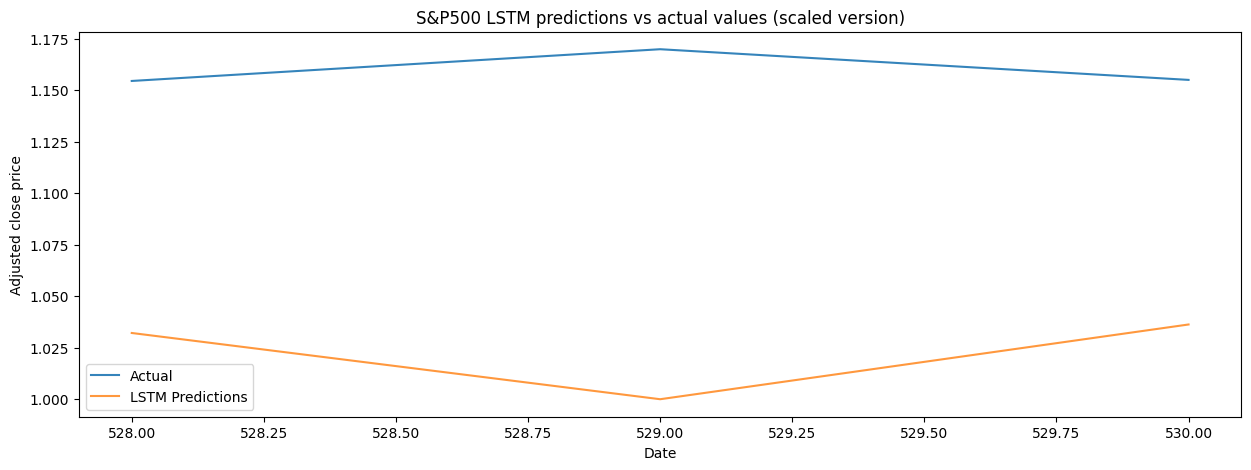

In [193]:
fig, ax = plt.subplots(figsize=(15, 5))
test_len = math.ceil(len(sp500_df)*0.9) + 50

targets = Y_test_sp500_LSTM
predictions = sp500_LSTM_test_preds

# plt.plot(sp500_df[test_len:].index, targets, alpha=0.9);
# plt.plot(sp500_df[test_len:].index, predictions,alpha=0.8);

import matplotlib.pyplot as plt

# Assuming 'targets' and 'predictions' are Pandas Series
targets_np = sp500_df[test_len:].index.to_numpy()
predictions_np = sp500_df[test_len:].index.to_numpy()

plt.plot(targets_np, targets, alpha=0.9)
plt.plot(predictions_np, predictions, alpha=0.8)





plt.title('S&P500 LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions']);
plt.show()

This is by far the best model! It does drop off around 2021 but is able to recover a bit in mid 2022.

#### Predicting the Dow Jones

The following code is an exact replica of what was just done for the S&P500. For that reason I will not annotate this section and would recommend jumping to the end unless you'd like to view the RMSE for the LSTM model on the Dow Jones data.

In [ ]:
X_dowjones_LSTM, Y_dowjones_LSTM = [], []
window = 50

for i in range(window, len(X_dowjones_LSTM_df)):
  X_dowjones_LSTM.append(X_dowjones_LSTM_df[i-window:i, 0])
  Y_dowjones_LSTM.append(X_dowjones_LSTM_df[i, 0])

In [ ]:
X_dowjones_LSTM = np.array(X_dowjones_LSTM)
Y_dowjones_LSTM = np.array(Y_dowjones_LSTM)

X_dowjones_LSTM = np.reshape(X_dowjones_LSTM, (len(X_dowjones_LSTM), 50, 1))

In [ ]:
X_test_dowjones_LSTM, Y_test_dowjones_LSTM = [], []
window = 50

for i in range(window, len(X_test_dowjones_LSTM_df)):
  X_test_dowjones_LSTM.append(X_test_dowjones_LSTM_df[i-window:i, 0])
  Y_test_dowjones_LSTM.append(X_test_dowjones_LSTM_df[i, 0])

In [ ]:
X_test_dowjones_LSTM = np.array(X_test_dowjones_LSTM)
Y_test_dowjones_LSTM = np.array(Y_test_dowjones_LSTM)

X_test_dowjones_LSTM = np.reshape(X_test_dowjones_LSTM, (len(X_test_dowjones_LSTM), 50, 1))

In [ ]:
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(30))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_dowjones_LSTM, Y_dowjones_LSTM, batch_size=1 , epochs=4)

Epoch 1/4
6851/6851 [==============================] - 341s 49ms/step - loss: 0.0027
Epoch 2/4
6851/6851 [==============================] - 293s 43ms/step - loss: 0.0010
Epoch 3/4
6851/6851 [==============================] - 290s 42ms/step - loss: 7.9825e-04
Epoch 4/4
6851/6851 [==============================] - 257s 38ms/step - loss: 7.8983e-04


Finally we'll calculate the test predictions and the test RMSE to see how our model did.

In [ ]:
dowjones_LSTM_test_preds = model.predict(X_test_dowjones_LSTM)
dowjones_LSTM_test_RMSE = rmse(dowjones_LSTM_test_preds, Y_test_dowjones_LSTM)
dowjones_LSTM_test_RMSE

23/23 [==============================] - 2s 26ms/step


0.10282963817823225

Again, an incredible result!

Let's visualise the results.

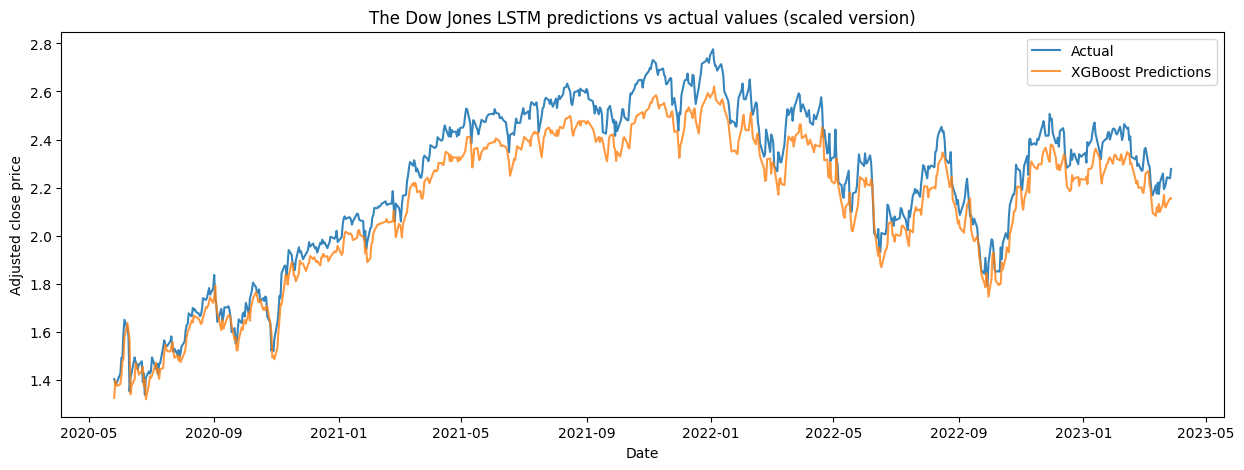

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
test_len = math.ceil(len(dowjones_df)*0.9) + 50

targets = Y_test_dowjones_LSTM
predictions = dowjones_LSTM_test_preds

plt.plot(dowjones_df[test_len:].index, targets, alpha=0.9);
plt.plot(dowjones_df[test_len:].index, predictions,alpha=0.8);

plt.title('The Dow Jones LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions']);

This model is so incredibly accurate. I'm blown away by the power of LSTM.

#### Predicting the NASDAQ

In [194]:
X_nasdaq_LSTM, Y_nasdaq_LSTM = [], []
window = 50

for i in range(window, len(X_nasdaq_LSTM_df)):
  X_nasdaq_LSTM.append(X_nasdaq_LSTM_df[i-window:i, 0])
  Y_nasdaq_LSTM.append(X_nasdaq_LSTM_df[i, 0])

In [195]:
X_nasdaq_LSTM = np.array(X_nasdaq_LSTM)
Y_nasdaq_LSTM = np.array(Y_nasdaq_LSTM)

X_nasdaq_LSTM = np.reshape(X_nasdaq_LSTM, (len(X_nasdaq_LSTM), 50, 1))

In [196]:
X_test_nasdaq_LSTM, Y_test_nasdaq_LSTM = [], []
window = 50

for i in range(window, len(X_test_nasdaq_LSTM_df)):
  X_test_nasdaq_LSTM.append(X_test_nasdaq_LSTM_df[i-window:i, 0])
  Y_test_nasdaq_LSTM.append(X_test_nasdaq_LSTM_df[i, 0])

In [197]:
X_test_nasdaq_LSTM = np.array(X_test_nasdaq_LSTM)
Y_test_nasdaq_LSTM = np.array(Y_test_nasdaq_LSTM)

X_test_nasdaq_LSTM = np.reshape(X_test_nasdaq_LSTM, (len(X_test_nasdaq_LSTM), 50, 1))

In [198]:
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(30))
model.add(Dense(1))

In [199]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [200]:
model.fit(X_nasdaq_LSTM, Y_nasdaq_LSTM, batch_size=1 , epochs=90)

Epoch 1/90
428/428 [==============================] - 17s 27ms/step - loss: 0.0869
Epoch 2/90
428/428 [==============================] - 10s 23ms/step - loss: 0.0482
Epoch 3/90
428/428 [==============================] - 8s 20ms/step - loss: 0.0414
Epoch 4/90
428/428 [==============================] - 9s 22ms/step - loss: 0.0340
Epoch 5/90
428/428 [==============================] - 10s 23ms/step - loss: 0.0294
Epoch 6/90
428/428 [==============================] - 11s 27ms/step - loss: 0.0272
Epoch 7/90
428/428 [==============================] - 13s 30ms/step - loss: 0.0239
Epoch 8/90
428/428 [==============================] - 11s 27ms/step - loss: 0.0246
Epoch 9/90
428/428 [==============================] - 11s 26ms/step - loss: 0.0231
Epoch 10/90
428/428 [==============================] - 11s 26ms/step - loss: 0.0238
Epoch 11/90
428/428 [==============================] - 12s 27ms/step - loss: 0.0227
Epoch 12/90
428/428 [==============================] - 11s 26ms/step - loss: 0.0218
Epo

Finally we'll calculate the test predictions and the test RMSE to see how our model did.

In [201]:
nasdaq_LSTM_test_preds = model.predict(X_test_nasdaq_LSTM)
nasdaq_LSTM_test_RMSE = rmse(nasdaq_LSTM_test_preds, Y_test_nasdaq_LSTM)
nasdaq_LSTM_test_RMSE

1/1 [==============================] - 1s 697ms/step


0.09033434790008069

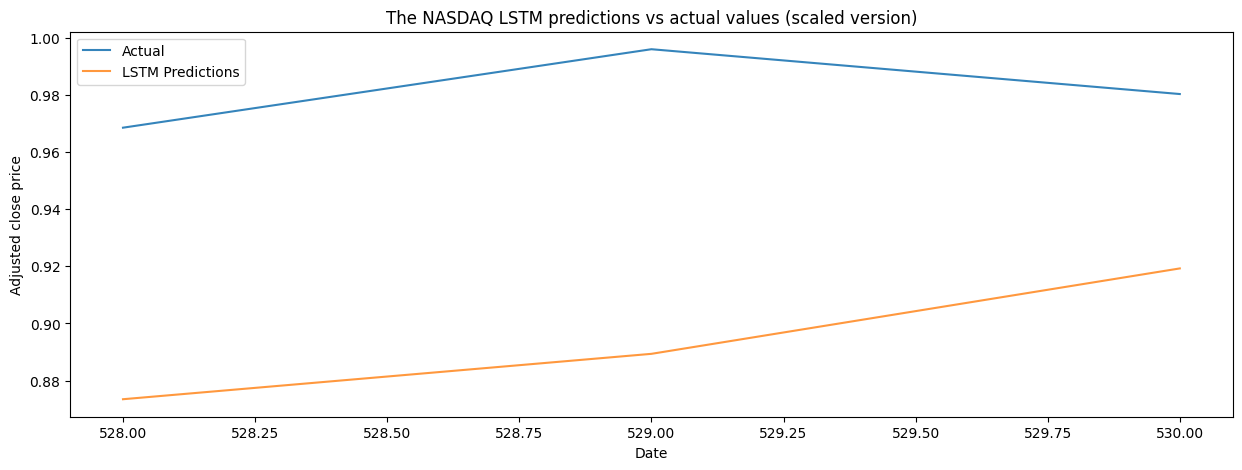

In [203]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

# Assuming nasdaq_df, Y_test_nasdaq_LSTM, and nasdaq_LSTM_test_preds are already defined

test_len = math.ceil(len(nasdaq_df) * 0.9) + 50

targets = Y_test_nasdaq_LSTM
predictions = nasdaq_LSTM_test_preds

# Convert the index to a NumPy array or list
dates = nasdaq_df[test_len:].index.to_numpy()

plt.plot(dates, targets, alpha=0.9)
plt.plot(dates, predictions, alpha=0.8)

plt.title('The NASDAQ LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions'])

plt.show()


Once again, great results. This is the best so far!

Let's visualise the results.

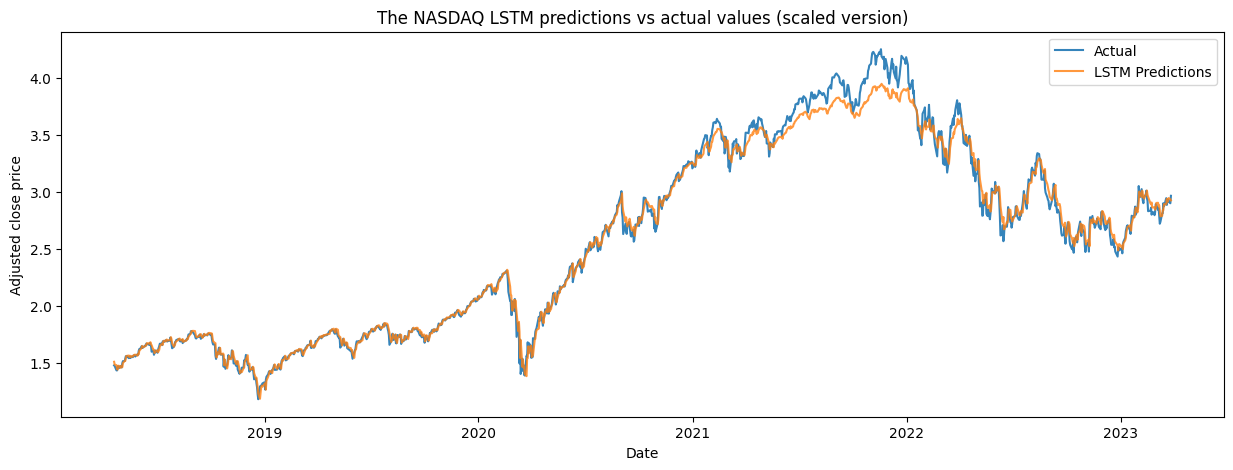

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
test_len = math.ceil(len(nasdaq_df)*0.9) + 50

targets = Y_test_nasdaq_LSTM
predictions = nasdaq_LSTM_test_preds

plt.plot(nasdaq_df[test_len:].index, targets, alpha=0.9);
plt.plot(nasdaq_df[test_len:].index, predictions,alpha=0.8);

plt.title('The NASDAQ LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions']);

#### Predicting the Nikkei 225

In [ ]:
# X_nikkei_LSTM, Y_nikkei_LSTM = [], []
# window = 50

# for i in range(window, len(X_nikkei_LSTM_df)):
#   X_nikkei_LSTM.append(X_nikkei_LSTM_df[i-window:i, 0])
#   Y_nikkei_LSTM.append(X_nikkei_LSTM_df[i, 0])

In [ ]:
# X_nikkei_LSTM = np.array(X_nikkei_LSTM)
# Y_nikkei_LSTM = np.array(Y_nikkei_LSTM)

# X_nikkei_LSTM = np.reshape(X_nikkei_LSTM, (len(X_nikkei_LSTM), 50, 1))

In [ ]:
# X_test_nikkei_LSTM, Y_test_nikkei_LSTM = [], []
# window = 50

# for i in range(window, len(X_test_nikkei_LSTM_df)):
#   X_test_nikkei_LSTM.append(X_test_nikkei_LSTM_df[i-window:i, 0])
#   Y_test_nikkei_LSTM.append(X_test_nikkei_LSTM_df[i, 0])

In [ ]:
# X_test_nikkei_LSTM = np.array(X_test_nikkei_LSTM)
# Y_test_nikkei_LSTM = np.array(Y_test_nikkei_LSTM)

# X_test_nikkei_LSTM = np.reshape(X_test_nikkei_LSTM, (len(X_test_nikkei_LSTM), 50, 1))

In [ ]:
# model = Sequential()
# model.add(LSTM(60,return_sequences=True, input_shape=(50, 1)))
# model.add(LSTM(30))
# model.add(Dense(1))

In [ ]:
# model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# model.fit(X_nikkei_LSTM, Y_nikkei_LSTM, batch_size=1 , epochs=4)

Epoch 1/4
12658/12658 [==============================] - 493s 39ms/step - loss: 0.0038
Epoch 2/4
12658/12658 [==============================] - 497s 39ms/step - loss: 0.0015
Epoch 3/4
12658/12658 [==============================] - 498s 39ms/step - loss: 0.0012
Epoch 4/4
12658/12658 [==============================] - 566s 45ms/step - loss: 0.0011


Finally we'll calculate the test predictions and the test RMSE to see how our model did.

In [ ]:
# nikkei_LSTM_test_preds = model.predict(X_test_nikkei_LSTM)
# nikkei_LSTM_test_RMSE = rmse(nikkei_LSTM_test_preds, Y_test_nikkei_LSTM)
# nikkei_LSTM_test_RMSE

43/43 [==============================] - 4s 40ms/step


0.04035431825172254

Let's visualise the results.

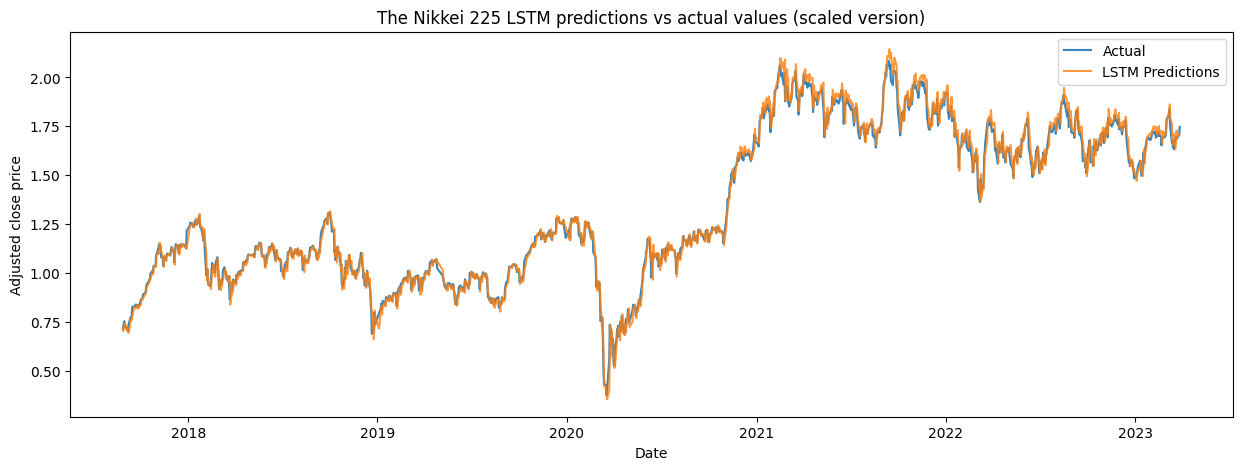

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# test_len = math.ceil(len(nikkei_df)*0.9) + 50

# targets = Y_test_nikkei_LSTM
# predictions = nikkei_LSTM_test_preds

# plt.plot(nikkei_df[test_len:].index, targets, alpha=0.9);
# plt.plot(nikkei_df[test_len:].index, predictions,alpha=0.8);

# plt.title('The Nikkei 225 LSTM predictions vs actual values (scaled version)')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'LSTM Predictions']);

### Closing thoughts about LSTM modeling

It was so interesting and exciting to work with a RNN model for the first time. Although the learning curve was steep, I enjoyed each step of the way immensely.

The LSTM model does such an incredible job predicting future stock prices I'm just in awe. The results of LSTM and the Linear and XGBoost Regression models are incomparable.

I'm excited to continue learning about LSTM models and understand more about how they can be used to predict future stock prices.

## Predicting future values

We're now going to put one of our models to the test. We'll use the Nikkei 225 model in order to predict tomorrows price.

In order to do this we'll create a data frame of 51 prior days of just the adj price column. We'll then adjust the price column forward by a day and drop the 1st row (to mimic what we've done throughout the project).

We'll then use model.predict in order to predict what the price will be for the 51st day.

We'll start by importing the data.

In [ ]:
# nikkei_future_df = yf.download('^N225', start="2023-01-18", end="2023-04-03")
# nikkei_future_df = nikkei_future_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)

# nikkei_future_df = adj_close_shift(nikkei_future_df)

# nikkei_futur_adjclose_df = nikkei_future_df["adjclose"]

# future_df = pd.DataFrame(nikkei_futur_adjclose_df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# future_df

adjclose
Date                    
2023-01-18  26405.230469
2023-01-19  26553.529297
2023-01-20  26906.039062
2023-01-23  27299.189453
2023-01-24  27395.009766
2023-01-25  27362.750000
2023-01-26  27382.560547
2023-01-27  27433.400391
2023-01-30  27327.109375
2023-01-31  27346.880859
2023-02-01  27402.050781
2023-02-02  27509.460938
2023-02-03  27693.650391
2023-02-06  27685.470703
2023-02-07  27606.460938
2023-02-08  27584.349609
2023-02-09  27670.980469
2023-02-10  27427.320312
2023-02-13  27602.769531
2023-02-14  27501.859375
2023-02-15  27696.439453
2023-02-16  27513.130859
2023-02-17  27531.939453
2023-02-20  27473.099609
2023-02-21  27104.320312
2023-02-22  27453.480469
2023-02-24  27423.960938
2023-02-27  27445.560547
2023-02-28  27516.529297
2023-03-01  27498.869141
2023-03-02  27927.470703
2023-03-03  28237.779297
2023-03-06  28309.160156
2023-03-07  28444.189453
2023-03-08  28623.150391
2023-03-09  28143.970703
2023-03-10  27832.960938
2023-03-13  27222.039062
2023-03-14  27229.480469
2023-03-15  27010.609375
2023-03-16  27333.789062
2023-03-17  26945.669922
2023-03-20  27466.609375
2023-03-22  27419.609375
2023-03-23  27385.250000
2023-03-24  27476.869141
2023-03-27  27518.250000
2023-03-28  27883.779297
2023-03-29  27782.929688
2023-03-30  28041.480469

In [ ]:
# scaler = StandardScaler().fit(nikkei_LSTM)
# transform_df = scaler.fit_transform(future_df)
# future_scaled = pd.DataFrame(transform_df, columns=nikkei_LSTM.columns)

In [ ]:
# future_scaled.head(10)

adjclose
0 -2.743803
1 -2.378717
2 -1.510898
3 -0.543029
4 -0.307136
5 -0.386554
6 -0.337784
7 -0.212625
8 -0.474295
9 -0.425621

In [ ]:
# future_preds = model.predict(future_scaled)
# future_preds

2/2 [==============================] - 0s 12ms/step


array([[-1.2757347 ],
       [-1.245385  ],
       [-1.0850059 ],
       [-0.56165713],
       [-0.34341273],
       [-0.42128992],
       [-0.37398764],
       [-0.24509883],
       [-0.50215024],
       [-0.45797008],
       [-0.3258335 ],
       [-0.03361024],
       [ 0.5431375 ],
       [ 0.5164688 ],
       [ 0.26215854],
       [ 0.19271195],
       [ 0.4693255 ],
       [-0.26106662],
       [ 0.2504973 ],
       [-0.0556635 ],
       [ 0.55223805],
       [-0.02289626],
       [ 0.03267227],
       [-0.13732722],
       [-0.8870704 ],
       [-0.19133484],
       [-0.26982597],
       [-0.21272665],
       [-0.01293667],
       [-0.06428642],
       [ 1.2886616 ],
       [ 2.102314  ],
       [ 2.2545419 ],
       [ 2.5105283 ],
       [ 2.794359  ],
       [ 1.8827845 ],
       [ 0.9952884 ],
       [-0.7087391 ],
       [-0.6956421 ],
       [-0.99443763],
       [-0.48741335],
       [-1.0538787 ],
       [-0.15535119],
       [-0.28110495],
       [-0.36743766],
       [-0

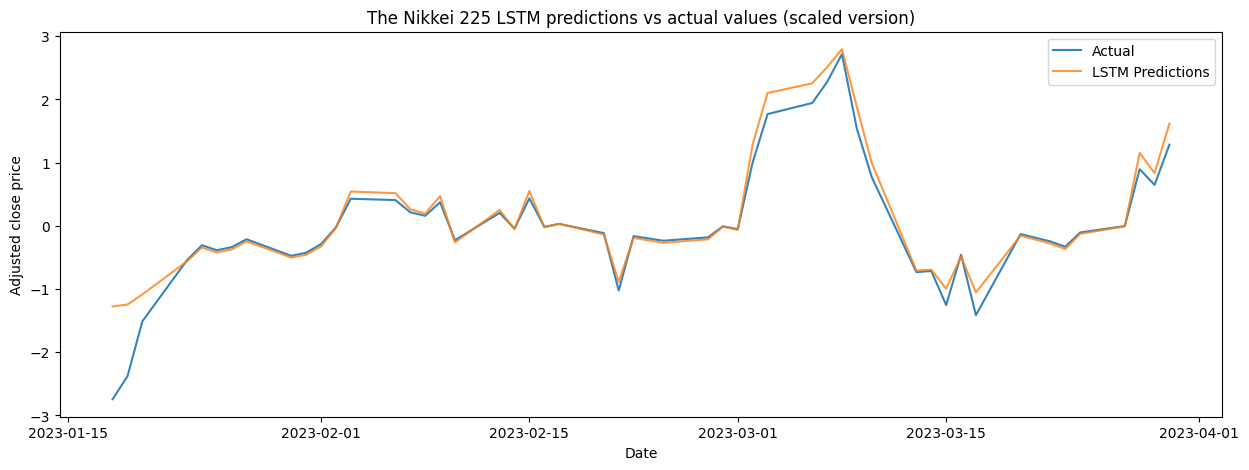

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))

# targets = future_scaled
# predictions = future_preds

# plt.plot(future_df.index, targets, alpha=0.9);
# plt.plot(future_df.index, predictions,alpha=0.8);

# plt.title('The Nikkei 225 LSTM predictions vs actual values (scaled version)')
# plt.xlabel('Date');
# plt.ylabel('Adjusted close price')
# plt.legend(['Actual', 'LSTM Predictions']);

## Conclusions and project summary

In this project, we applied 3 different machine learning models, Linear Regression, XGBoost Regression, and LSTM to 4 different stock index data sets. The goal was to predict future stock prices, specifically the adjusted close price for the next day.

I think that we were mildly successful in these predictions. The simplest model, Linear Regression, may have been off in terms of the values, but the shape of the data was nearly replicated.

The XGBoost model did a far worse job than I anticipated, worse than the Linear Regression model. When a model takes more CPU to run and is worse off, that's when you know it's not the model to be used. I would be interested in having another go with the XGBoost model to see if scaling the targets and/or using a different scaling technique would have a postive impact on the model performance.

The LSTM model is a highly used model in the stock analysis world and we can see why! With incredibly low RSME scores and in the visualisations it's clear that this model did an incredible job of predicting future stock values. It's important to note that the method of using 50 days of previous data to predict the 52nd day is an advantage compared to the other models.

All in all, I was really interested in seeing how well we could predict future stock prices. It is as difficult as I expected. I would change a few elements of this project that I will discuss more in the next section, Future Work.

## Future work

I have so many ideas about future work and iterations for this project, I actually can't wait to get back into it!

#### 1. Plot the non-scaled versions of the LSTM model predictions versus actual values

This is something I spent many days trying to sort out. I've come very close many times to plotting these graphs, but never got it exactly right. For the sake of moving on to other tasks and projects, I'm letting this go for now but will be following up with many Youtube videos and books to figure out exactly how to approach this.

#### 2. Amount of data used

The first thing I would do differently would be to shorten the time span used. For the purpose of this project, I needed to work with 50,000+ rows of data. I should have considered this when choosing a project subject, but alas, I gave it a red hot go. By shortening the time span covered, I believe the models would be much more accurate.

For the most part, these 4 stock indexes have changed in price drastically since their creation. If we were to only look at the S&P500 for the last 5 years, our models would have a much greater understanding of current prices.

This would also impact the data seen in the test, validation, train sets and again I think this would be a positive change for our models capabilities.

#### 3. Incorporate sentiment analysis

I think what makes predicting future stock index prices so difficult is that the stock market is controlled by human beings - we are responsible for the ups and downs of prices based on selling and buying stocks. Due to this correlation, our data would benefit from having some form of daily sentiment analysis.

My first thought would be to pull financial/ world news headlines from each day and perform a sentiment analysis on them to determine if the mood of the day is good or bad. I think that we would be able to see a relationship between price fluctuations and daily sentiment and therefore, our models would be improved.

#### 4. Engineer more investment specific features from existing features

I think it would be interesting to look at the investment specific features such as MACD and RSI in more detail, followed by derviving more features from them. For instance, the relationship between the MACD features can indicate good and bad times to buy/ sell stocks. It would be interesting to create a categorical, Y/N column that indicates whether it's a good or bad time. I think this would further improve the models capabilities.

#### 5. Incorporate more investment specific features

I think it would be interesting and perhaps beneficial to study further investment specific features and engineer them to be in the data set.

#### 6. Study the way that the stock indexes are developed and how that might impact our model choice

Each stock index follows a set of stocks based on a certain measurement. For instance, the S&P500 is a free-float weighted/capitalization-weighted index. I'm curious if the way a stock index is composed would lead us to choose a specific type of model.

These are just a few of the ideas I have for future iterations of this project. I'm keen to use this project as a springboard for further stock price analysis in the future.



## Sources

* Killian, Anzél. “10 Trading Indicators Every Trader Should Know.” IG, https://www.ig.com/au/trading-strategies/10-trading-indicators-every-trader-should-know-190604
* Mitchell, Cory. “Trend Trading: The 4 Most Common Indicators.” Investopedia, Investopedia, 8 July 2022, https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp
* Mtszkw. “XGBoost for Stock Trend & Prices Prediction.” Kaggle, 30 Nov. 2020, https://www.kaggle.com/code/mtszkw/xgboost-for-stock-trend-prices-prediction
* Potters, Charles. “7 Technical Indicators to Build a Trading Toolkit.”  Investopedia, Investopedia, 1 Apr. 2023, https://www.investopedia.com/top-7-technical-analysis-tools-4773275
* West, Zαck. “Calculating the MACD in Python for Algorithmic Trading.” Αlphαrithms, 16 June 2022, https://www.alpharithms.com/calculate-macd-python-272222/
* West, Zαck. “Calculating the RSI in Python: 3 Ways to Predict Market Status &Price Movement.” Αlphαrithms, 16 June 2022, https://www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
* West, Zαck. “Predicting Stock Prices with Linear Regression in Python.” Αlphαrithms, 19 June 2022, https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/  

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
